In [8]:
'''
=== === ===
Classification
=== === ===
'''

'''
    Data Cleaning and Preprocessing
'''

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [9]:
# Importing the dataset
dataset = pd.read_csv('forestfires.csv')
dataset[:5]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [10]:
#Getting Independent and Dependent Features
X = dataset.iloc[:, 0:12].values # independent: upperbound is excluded 
y = dataset.iloc[:, 12].values # dependent variable

In [11]:
# Encoding categorical data for independent variables 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 2] = labelencoder_X_1.fit_transform(X[:, 2]) #For month
labelencoder_X_2 = LabelEncoder()
X[:, 3] = labelencoder_X_2.fit_transform(X[:, 3]) #For weekday

onehotencoder = OneHotEncoder(categorical_features = [2])#dummy variable for month
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:] #avoid dummy variable trap 
onehotencoder = OneHotEncoder(categorical_features = [13])#dummy variable for week
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:] #avoid dummy variable trap 
X[:1]

array([[ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  7. ,  5. , 86.2, 26.2, 94.3,
         5.1,  8.2, 51. ,  6.7,  0. ]])

In [12]:
'''
#Convert to Acres then Classify Size
Class 1.A - one acre or less;
Class 2.B - more than one acre, but less than 10 acres;
Class 3.C - 10 acres or more, but less than 100 acres;
Class 4.D - 100 acres or more, but less than 300 acres;
Class 5.E - 300 acres or more, but less than 1,000 acres;
Class 6.F - 1,000 acres or more, but less than 5,000 acres;
'''
y = dataset.iloc[:, 12].values
for i in range(0, len(y)):
    y[i] = (y[i]*2.47)
    if y[i] < 1.0:
        y[i] = 1
    elif y[i] < 10.0:
        y[i] = 2
    elif y[i] < 100.0:
        y[i] = 3
    elif y[i] < 300.0:
        y[i] = 4
    elif y[i] < 1000.0:
        y[i] = 5
    elif y[i] < 5000.0:
        y[i] = 6
    else:
        y[i] = 7

y_Corrected = y.astype(int) 
y_Corrected[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [13]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_Corrected, test_size = 0.2)

# Feature Scaling to optimize 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
'''
    Creating the ANN
'''

# Importing the Keras libraries and packages to use Tensor Flow Backend
import keras
from keras.models import Sequential #For Initializing ANN
from keras.layers import Dense #For Layers of ANN
from keras.layers import Dropout #For Layers of ANN

# Initialising the ANN with sequence of layers (Could use a Graph)
classifier = Sequential()

# Adding the input layer and the first hidden layer
# optimal nodes in hidden layer is art (Tip: choose as avg of input+output)
classifier.add(Dense(units = 17, kernel_initializer = 'uniform', activation = 'relu', input_dim = 27))

# Adding the hidden layers
classifier.add(Dense(units = 17, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 17, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
# Probability for the outcome 
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'softmax'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 5, epochs = 100)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
413/413 [==============================] - 1s 2ms/step - loss: -14.2825 - acc: 0.4891
Epoch 2/100
413/413 [==============================] - 0s 364us/step - loss: -14.2825 - acc: 0.4891
Epoch 3/100
413/413 [==============================] - 0s 360us/step - loss: -14.2825 - acc: 0.4891
Epoch 4/100
413/413 [==============================] - 0s 377us/step - loss: -14.2825 - acc: 0.4891
Epoch 5/100
413/413 [==============================] - 0s 521us/step - loss: -14.2825 - acc: 0.4891
Epoch 6/100
413/413 [==============================] - 0s 372us/step - loss: -14.2825 - acc: 0.4891
Epoch 7/100
413/413 [==============================] - 0s 461us/step - loss: -14.2825 - acc: 0.4891
Epoch 8/100
413/413 [==============================] - 0s 472us/step - loss: -14.2825 - acc: 0.4891
Epoch 9/100
413/413 [==============================] - 0s 433us/step - loss: -14.2

413/413 [==============================] - 0s 487us/step - loss: -14.2825 - acc: 0.4891
Epoch 77/100
413/413 [==============================] - 0s 366us/step - loss: -14.2825 - acc: 0.4891
Epoch 78/100
413/413 [==============================] - 0s 351us/step - loss: -14.2825 - acc: 0.4891
Epoch 79/100
413/413 [==============================] - 0s 379us/step - loss: -14.2825 - acc: 0.4891
Epoch 80/100
413/413 [==============================] - 0s 366us/step - loss: -14.2825 - acc: 0.4891
Epoch 81/100
413/413 [==============================] - 0s 361us/step - loss: -14.2825 - acc: 0.4891
Epoch 82/100
413/413 [==============================] - 0s 397us/step - loss: -14.2825 - acc: 0.4891
Epoch 83/100
413/413 [==============================] - 0s 473us/step - loss: -14.2825 - acc: 0.4891
Epoch 84/100
413/413 [==============================] - 0s 399us/step - loss: -14.2825 - acc: 0.4891
Epoch 85/100
413/413 [==============================] - 0s 359us/step - loss: -14.2825 - acc: 0.4891
Epo

Accuracy: 49.04%


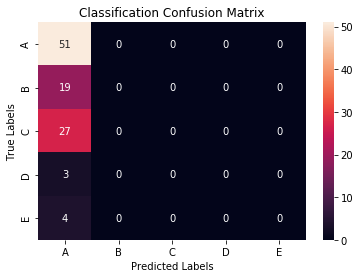

In [15]:
'''
    Making predictions and evaluating the model
'''
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt   

cm = confusion_matrix(y_test, y_pred)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax);
ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels'); 
ax.set_title('Classification Confusion Matrix'); 
ax.xaxis.set_ticklabels(['A','B','C','D','E','F']); ax.yaxis.set_ticklabels(['A','B','C','D','E','F']);

correct = 0
total = 0
for i in range(0, len(cm)):
    for j in range(0, len(cm)):
        if(i==j):
            correct = correct + cm[i][j]
        total = total + cm[i][j]
        
Accuracy = correct/total
print('Accuracy: %.2f%%' % (Accuracy*100))

In [16]:
'''
    Evaluation
'''

from keras.wrappers.scikit_learn import KerasClassifier
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from keras.models import Sequential #For Initializing ANN
from keras.layers import Dense #For Layers of ANN

def build_classifier():
    classifier = Sequential() 
    classifier.add(Dense(units = 17, kernel_initializer = 'uniform', activation = 'relu', input_dim = 27))
    classifier.add(Dense(units = 17, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 17, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'softmax'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

classifier = KerasClassifier(build_fn = build_classifier, batch_size = 5, epochs = 100)

accuracies_class = cross_val_score(estimator = classifier, X = X_train, y=y_train, cv = 10, n_jobs = -1)
mean_class = accuracies_class.mean()
variance_class = accuracies_class.std()

print('Mean: %s' % mean_class)
print('Variance: %s' % variance_class)

Mean: 0.2009291560150051
Variance: 0.07621074766399823


In [225]:
'''
=== === ===
Regression
=== === ===
'''

'''
    Data Cleaning and Preprocessing
'''

# Importing the dataset
dataset = pd.read_csv('forestfires.csv')

#Getting Independent and Dependent(regression and categorical) Features
X = dataset.iloc[:, 0:12].values # independent: upperbound is excluded 
y = dataset.iloc[:, 12].values # dependent variable

# Encoding categorical data for independent variables 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 2] = labelencoder_X_1.fit_transform(X[:, 2]) #For month
labelencoder_X_2 = LabelEncoder()
X[:, 3] = labelencoder_X_2.fit_transform(X[:, 3]) #For weekday

onehotencoder = OneHotEncoder(categorical_features = [2])#dummy variable for month
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:] #avoid dummy variable trap 
onehotencoder = OneHotEncoder(categorical_features = [13])#dummy variable for week
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:] #avoid dummy variable trap 

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Feature Scaling to optimize 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [226]:
'''
    Creating the ANN
'''

# Importing the Keras libraries and packages to use Tensor Flow Backend
from keras.models import Sequential #For Initializing ANN
from keras.layers import Dense #For Layers of ANN
from keras.layers import Dropout #For Layers of ANN

# Initialising the ANN with sequence of layers (Could use a Graph)
regressor = Sequential()

# Adding the input layer and the first hidden layer
# optimal nodes in hidden layer is art (Tip: choose as avg of input+output)
regressor.add(Dense(units = 14, kernel_initializer = 'uniform', activation = 'relu', input_dim = 27))

# Adding the hidden layers
regressor.add(Dense(units = 14, kernel_initializer = 'uniform', activation = 'relu'))
regressor.add(Dense(units = 14, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
# Probability for the outcome 
regressor.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'linear'))

# Compiling the ANN
regressor.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])

# Fitting the ANN to the Training set
regressor.fit(X_train, y_train, batch_size = 5, epochs = 100)

Epoch 1/100
413/413 [==============================] - 10s 24ms/step - loss: 5022.2241 - mean_squared_error: 5022.2241 - mean_absolute_error: 13.8827
Epoch 2/100
413/413 [==============================] - 1s 1ms/step - loss: 5002.2895 - mean_squared_error: 5002.2895 - mean_absolute_error: 13.8796
Epoch 3/100
413/413 [==============================] - 1s 2ms/step - loss: 4925.6789 - mean_squared_error: 4925.6789 - mean_absolute_error: 14.3232
Epoch 4/100
413/413 [==============================] - 1s 2ms/step - loss: 4830.0766 - mean_squared_error: 4830.0766 - mean_absolute_error: 16.3949
Epoch 5/100
413/413 [==============================] - 1s 1ms/step - loss: 4768.1054 - mean_squared_error: 4768.1054 - mean_absolute_error: 17.5856
Epoch 6/100
413/413 [==============================] - 1s 2ms/step - loss: 4729.3690 - mean_squared_error: 4729.3690 - mean_absolute_error: 18.8218
Epoch 7/100
413/413 [==============================] - 1s 1ms/step - loss: 4714.0919 - mean_squared_error: 471

413/413 [==============================] - 0s 1ms/step - loss: 4453.5182 - mean_squared_error: 4453.5182 - mean_absolute_error: 20.6743
Epoch 57/100
413/413 [==============================] - 1s 1ms/step - loss: 4452.8551 - mean_squared_error: 4452.8551 - mean_absolute_error: 20.9603
Epoch 58/100
413/413 [==============================] - 0s 1ms/step - loss: 4439.1502 - mean_squared_error: 4439.1502 - mean_absolute_error: 20.4949
Epoch 59/100
413/413 [==============================] - 1s 1ms/step - loss: 4442.5364 - mean_squared_error: 4442.5364 - mean_absolute_error: 20.5681
Epoch 60/100
413/413 [==============================] - 1s 1ms/step - loss: 4435.5914 - mean_squared_error: 4435.5914 - mean_absolute_error: 20.1310
Epoch 61/100
413/413 [==============================] - 1s 1ms/step - loss: 4429.7088 - mean_squared_error: 4429.7088 - mean_absolute_error: 20.1333
Epoch 62/100
413/413 [==============================] - 1s 1ms/step - loss: 4438.5850 - mean_squared_error: 4438.5850 -

Predicted: [[-0.20464231]
 [ 0.79766357]
 [ 3.05812   ]
 [ 4.362626  ]
 [ 3.3514383 ]]
Real: [278.53   1.9    9.27   6.1   13.05]


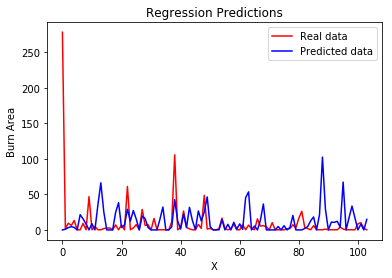

In [227]:
'''
    Making predictions and evaluating the model
'''
# Predicting the Test set results
y_pred = regressor.predict(X_test)

print('Predicted: %s' % y_pred[:5, ])
print('Real: %s' % y_test[:5, ])

plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Regression Predictions')
plt.legend()
plt.xlabel('X')
plt.ylabel('Burn Area'); 
plt.show()

In [228]:
'''
    Evaluation
'''

def build_regressor():
    regressor = Sequential() 
    regressor.add(Dense(units = 14, kernel_initializer = 'uniform', activation = 'relu', input_dim = 27))
    regressor.add(Dense(units = 14, kernel_initializer = 'uniform', activation = 'relu'))
    regressor.add(Dense(units = 14, kernel_initializer = 'uniform', activation = 'relu'))
    regressor.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'linear'))
    regressor.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])
    return regressor

regressor = KerasRegressor(build_fn = build_regressor, batch_size = 5, epochs = 100)

accuracies_reg = cross_val_score(estimator = regressor, X = X_train, y=y_train, scoring='r2',cv = 10, n_jobs = 1)
mean_reg = accuracies_reg.mean()
variance_reg = accuracies_reg.std()

print('Mean: %s' % mean_class)
print('Variance: %s' % variance_class)

Epoch 1/100
371/371 [==============================] - 7s 19ms/step - loss: 5452.2647 - mean_squared_error: 5452.2647 - mean_absolute_error: 14.4680
Epoch 2/100
371/371 [==============================] - 0s 1ms/step - loss: 5450.1269 - mean_squared_error: 5450.1269 - mean_absolute_error: 14.4618
Epoch 3/100
371/371 [==============================] - 0s 1ms/step - loss: 5435.8741 - mean_squared_error: 5435.8741 - mean_absolute_error: 14.4221
Epoch 4/100
371/371 [==============================] - 0s 1ms/step - loss: 5384.9464 - mean_squared_error: 5384.9464 - mean_absolute_error: 14.5475
Epoch 5/100
371/371 [==============================] - 0s 1ms/step - loss: 5265.7471 - mean_squared_error: 5265.7471 - mean_absolute_error: 15.2374
Epoch 6/100
371/371 [==============================] - 1s 2ms/step - loss: 5171.6876 - mean_squared_error: 5171.6876 - mean_absolute_error: 16.9854
Epoch 7/100
371/371 [==============================] - 1s 2ms/step - loss: 5117.0744 - mean_squared_error: 5117

371/371 [==============================] - 1s 1ms/step - loss: 4798.9674 - mean_squared_error: 4798.9674 - mean_absolute_error: 22.7960
Epoch 57/100
371/371 [==============================] - 0s 1ms/step - loss: 4802.2401 - mean_squared_error: 4802.2401 - mean_absolute_error: 22.8085
Epoch 58/100
371/371 [==============================] - 1s 2ms/step - loss: 4798.1950 - mean_squared_error: 4798.1950 - mean_absolute_error: 22.0378
Epoch 59/100
371/371 [==============================] - 1s 1ms/step - loss: 4791.1380 - mean_squared_error: 4791.1380 - mean_absolute_error: 21.7608
Epoch 60/100
371/371 [==============================] - 0s 1ms/step - loss: 4789.6907 - mean_squared_error: 4789.6907 - mean_absolute_error: 22.1036
Epoch 61/100
371/371 [==============================] - 0s 1ms/step - loss: 4789.4740 - mean_squared_error: 4789.4740 - mean_absolute_error: 21.5997
Epoch 62/100
371/371 [==============================] - 1s 1ms/step - loss: 4793.0101 - mean_squared_error: 4793.0101 -

371/371 [==============================] - 0s 1ms/step - loss: 2000.7831 - mean_squared_error: 2000.7831 - mean_absolute_error: 16.4670
Epoch 67/100
371/371 [==============================] - 0s 1ms/step - loss: 1997.2183 - mean_squared_error: 1997.2183 - mean_absolute_error: 16.3432
Epoch 68/100
371/371 [==============================] - 0s 1ms/step - loss: 1994.6856 - mean_squared_error: 1994.6856 - mean_absolute_error: 16.6659
Epoch 69/100
371/371 [==============================] - 0s 1ms/step - loss: 1994.3828 - mean_squared_error: 1994.3828 - mean_absolute_error: 15.8056
Epoch 70/100
371/371 [==============================] - 0s 1ms/step - loss: 1997.2346 - mean_squared_error: 1997.2346 - mean_absolute_error: 16.4440
Epoch 71/100
371/371 [==============================] - 0s 1ms/step - loss: 1990.3082 - mean_squared_error: 1990.3082 - mean_absolute_error: 16.0332
Epoch 72/100
371/371 [==============================] - 0s 1ms/step - loss: 1989.8711 - mean_squared_error: 1989.8711 -

371/371 [==============================] - 0s 1ms/step - loss: 4675.1816 - mean_squared_error: 4675.1816 - mean_absolute_error: 20.8462
Epoch 77/100
371/371 [==============================] - 0s 1ms/step - loss: 4682.5318 - mean_squared_error: 4682.5318 - mean_absolute_error: 21.2485
Epoch 78/100
371/371 [==============================] - 0s 1ms/step - loss: 4681.3001 - mean_squared_error: 4681.3001 - mean_absolute_error: 21.4891
Epoch 79/100
371/371 [==============================] - 1s 2ms/step - loss: 4669.7700 - mean_squared_error: 4669.7700 - mean_absolute_error: 20.4216
Epoch 80/100
371/371 [==============================] - 0s 1ms/step - loss: 4662.2888 - mean_squared_error: 4662.2888 - mean_absolute_error: 20.5068
Epoch 81/100
371/371 [==============================] - 1s 1ms/step - loss: 4661.8244 - mean_squared_error: 4661.8244 - mean_absolute_error: 20.5485
Epoch 82/100
371/371 [==============================] - 1s 2ms/step - loss: 4658.2553 - mean_squared_error: 4658.2553 -

372/372 [==============================] - 0s 1ms/step - loss: 4713.6168 - mean_squared_error: 4713.6168 - mean_absolute_error: 20.7411
Epoch 87/100
372/372 [==============================] - 0s 1ms/step - loss: 4715.9365 - mean_squared_error: 4715.9365 - mean_absolute_error: 21.7535
Epoch 88/100
372/372 [==============================] - 0s 1ms/step - loss: 4694.5729 - mean_squared_error: 4694.5729 - mean_absolute_error: 21.6337
Epoch 89/100
372/372 [==============================] - 0s 1ms/step - loss: 4698.0401 - mean_squared_error: 4698.0401 - mean_absolute_error: 21.1795
Epoch 90/100
372/372 [==============================] - 0s 1ms/step - loss: 4691.0416 - mean_squared_error: 4691.0416 - mean_absolute_error: 21.2419
Epoch 91/100
372/372 [==============================] - 0s 1ms/step - loss: 4684.8236 - mean_squared_error: 4684.8236 - mean_absolute_error: 21.2967
Epoch 92/100
372/372 [==============================] - 0s 1ms/step - loss: 4679.4516 - mean_squared_error: 4679.4516 -

372/372 [==============================] - 0s 1ms/step - loss: 4813.0976 - mean_squared_error: 4813.0976 - mean_absolute_error: 21.7063
Epoch 97/100
372/372 [==============================] - 0s 1ms/step - loss: 4815.7980 - mean_squared_error: 4815.7980 - mean_absolute_error: 22.1309
Epoch 98/100
372/372 [==============================] - 0s 1ms/step - loss: 4813.0588 - mean_squared_error: 4813.0588 - mean_absolute_error: 21.5482
Epoch 99/100
372/372 [==============================] - 1s 1ms/step - loss: 4809.9142 - mean_squared_error: 4809.9142 - mean_absolute_error: 21.7396
Epoch 100/100
372/372 [==============================] - 0s 1ms/step - loss: 4807.5586 - mean_squared_error: 4807.5586 - mean_absolute_error: 21.6274
Epoch 1/100
372/372 [==============================] - 8s 21ms/step - loss: 5570.2018 - mean_squared_error: 5570.2018 - mean_absolute_error: 15.1356
Epoch 2/100
372/372 [==============================] - 0s 1ms/step - loss: 5563.2166 - mean_squared_error: 5563.2166 -

372/372 [==============================] - 1s 2ms/step - loss: 3823.7116 - mean_squared_error: 3823.7116 - mean_absolute_error: 13.0471
Epoch 6/100
372/372 [==============================] - 0s 1ms/step - loss: 3772.1646 - mean_squared_error: 3772.1646 - mean_absolute_error: 13.8293
Epoch 7/100
372/372 [==============================] - 0s 1ms/step - loss: 3740.2664 - mean_squared_error: 3740.2664 - mean_absolute_error: 15.0961
Epoch 8/100
372/372 [==============================] - 1s 2ms/step - loss: 3713.4044 - mean_squared_error: 3713.4044 - mean_absolute_error: 15.6805
Epoch 9/100
372/372 [==============================] - 1s 2ms/step - loss: 3695.6091 - mean_squared_error: 3695.6091 - mean_absolute_error: 16.5338
Epoch 10/100
372/372 [==============================] - 1s 1ms/step - loss: 3683.6277 - mean_squared_error: 3683.6277 - mean_absolute_error: 16.8599
Epoch 11/100
372/372 [==============================] - 1s 1ms/step - loss: 3678.9098 - mean_squared_error: 3678.9098 - mea

372/372 [==============================] - 0s 1ms/step - loss: 5027.1691 - mean_squared_error: 5027.1691 - mean_absolute_error: 20.5044
Epoch 16/100
372/372 [==============================] - 0s 1ms/step - loss: 5033.5738 - mean_squared_error: 5033.5738 - mean_absolute_error: 20.5227
Epoch 17/100
372/372 [==============================] - 1s 1ms/step - loss: 5016.0769 - mean_squared_error: 5016.0769 - mean_absolute_error: 19.9991
Epoch 18/100
372/372 [==============================] - 1s 1ms/step - loss: 5012.4365 - mean_squared_error: 5012.4365 - mean_absolute_error: 20.7486
Epoch 19/100
372/372 [==============================] - 1s 2ms/step - loss: 5004.4097 - mean_squared_error: 5004.4097 - mean_absolute_error: 19.9402
Epoch 20/100
372/372 [==============================] - 1s 1ms/step - loss: 4999.6119 - mean_squared_error: 4999.6119 - mean_absolute_error: 20.9193
Epoch 21/100
372/372 [==============================] - 0s 1ms/step - loss: 4989.1791 - mean_squared_error: 4989.1791 -

372/372 [==============================] - 0s 1ms/step - loss: 4830.3736 - mean_squared_error: 4830.3736 - mean_absolute_error: 20.3892
Epoch 71/100
372/372 [==============================] - 0s 1ms/step - loss: 4827.7659 - mean_squared_error: 4827.7659 - mean_absolute_error: 20.4727
Epoch 72/100
372/372 [==============================] - 0s 1ms/step - loss: 4823.5647 - mean_squared_error: 4823.5647 - mean_absolute_error: 20.7646
Epoch 73/100
372/372 [==============================] - 0s 1ms/step - loss: 4831.1787 - mean_squared_error: 4831.1787 - mean_absolute_error: 20.8590
Epoch 74/100
372/372 [==============================] - 0s 1ms/step - loss: 4813.9135 - mean_squared_error: 4813.9135 - mean_absolute_error: 20.9990
Epoch 75/100
372/372 [==============================] - 0s 1ms/step - loss: 4814.7205 - mean_squared_error: 4814.7205 - mean_absolute_error: 21.1184
Epoch 76/100
372/372 [==============================] - 0s 1ms/step - loss: 4809.1363 - mean_squared_error: 4809.1363 -

372/372 [==============================] - 0s 1ms/step - loss: 4783.2511 - mean_squared_error: 4783.2511 - mean_absolute_error: 21.3800
Epoch 80/100
372/372 [==============================] - 1s 2ms/step - loss: 4775.0859 - mean_squared_error: 4775.0859 - mean_absolute_error: 21.1082
Epoch 81/100
372/372 [==============================] - 0s 1ms/step - loss: 4771.2158 - mean_squared_error: 4771.2158 - mean_absolute_error: 21.4288
Epoch 82/100
372/372 [==============================] - 0s 1ms/step - loss: 4795.2646 - mean_squared_error: 4795.2646 - mean_absolute_error: 21.1346
Epoch 83/100
372/372 [==============================] - 1s 2ms/step - loss: 4769.7607 - mean_squared_error: 4769.7607 - mean_absolute_error: 21.1904
Epoch 84/100
372/372 [==============================] - 1s 1ms/step - loss: 4758.9232 - mean_squared_error: 4758.9232 - mean_absolute_error: 21.8099
Epoch 85/100
372/372 [==============================] - 1s 2ms/step - loss: 4770.3394 - mean_squared_error: 4770.3394 -

372/372 [==============================] - 0s 1ms/step - loss: 4736.7925 - mean_squared_error: 4736.7925 - mean_absolute_error: 21.7011
Epoch 90/100
372/372 [==============================] - 0s 1ms/step - loss: 4718.6231 - mean_squared_error: 4718.6231 - mean_absolute_error: 21.1247
Epoch 91/100
372/372 [==============================] - 0s 1ms/step - loss: 4714.6441 - mean_squared_error: 4714.6441 - mean_absolute_error: 20.8423
Epoch 92/100
372/372 [==============================] - 1s 2ms/step - loss: 4715.4584 - mean_squared_error: 4715.4584 - mean_absolute_error: 21.2910
Epoch 93/100
372/372 [==============================] - 1s 1ms/step - loss: 4715.3326 - mean_squared_error: 4715.3326 - mean_absolute_error: 21.5589
Epoch 94/100
372/372 [==============================] - 1s 1ms/step - loss: 4718.2466 - mean_squared_error: 4718.2466 - mean_absolute_error: 21.2670
Epoch 95/100
372/372 [==============================] - 0s 1ms/step - loss: 4700.2383 - mean_squared_error: 4700.2383 -

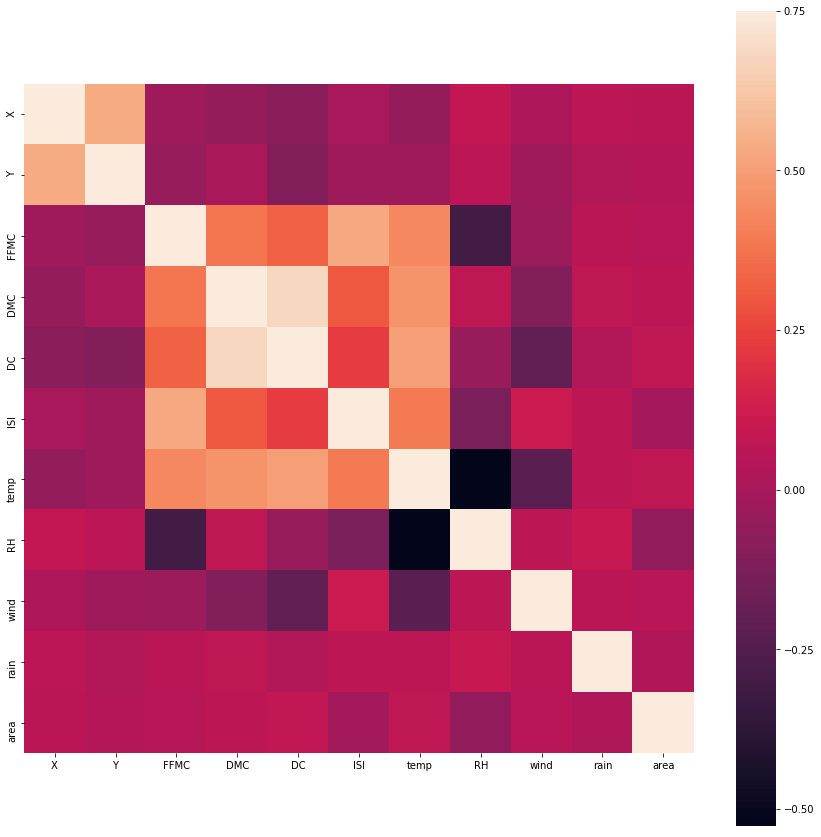

In [17]:
#Dimensionality Reduction 

#Plot correlation matrix
corr = dataset.corr()
fig = plt.figure(figsize = (15,15))
sns.heatmap(corr, vmax = .75, square = True)
plt.show()

In [18]:
#Get Dataset
dataset = pd.read_csv('forestfires.csv')
X = dataset.iloc[:, 0:12].values # independent: upperbound is excluded 
y = dataset.iloc[:, 12].values # dependent variable

# Encoding categorical data for independent variables 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 2] = labelencoder_X_1.fit_transform(X[:, 2]) #For month
labelencoder_X_2 = LabelEncoder()
X[:, 3] = labelencoder_X_2.fit_transform(X[:, 3]) #For weekday
onehotencoder = OneHotEncoder(categorical_features = [2])#dummy variable for month
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:] #avoid dummy variable trap 
onehotencoder = OneHotEncoder(categorical_features = [13])#dummy variable for week
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:] #avoid dummy variable trap 

#Evaluate statistical significance of each feature using Backward Elimination
import statsmodels.formula.api as sm
X = np.append(arr = np.ones((517, 1)).astype(int), values = X, axis = 1)

X_opt = X[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 
              15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.8689
Date:                Sun, 07 Apr 2019   Prob (F-statistic):              0.658
Time:                        18:30:52   Log-Likelihood:                -2868.3
No. Observations:                 517   AIC:                             5793.
Df Residuals:                     489   BIC:                             5912.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -15.1640     76.561     -0.198      0.843    -165.593     135.265
x1             5.9693     10.482      0.570      0.569     -14.625      26.564
x2            19.4099     10.062      1.929      0.054      -0.361      39.180
x3             5.1446      9.789      0.526      0.599     -14.089      24.378
x4             9.6719     11.107      0.871      0.384     -12.151      31.495
x5             7.7928     10.883      0.716      0.474     -13.590      29.176
x6             5.4791     11.405      0.480      0.631     -16.930      27.888
x7            46.8820     38.088      1.231      0.219     -27.954     121.718
x8            47.3782     36.948      1.282      0.200     -25.219     119.975
x9             5.5898     25.948      0.215      0.830     -45.394      56.573
x10           14.7691     56.406      0.262      0.794     -96.059     125.597
x11           28.8789     33.052      0.874      0.383     -36.063      93.821
x12            6.7155     30.338      0.221      0.825     -52.893      66.324
x13           -4.2226     23.414     -0.180      0.857     -50.228      41.783
x14           12.7965     50.916      0.251      0.802     -87.244     112.837
x15           -4.4101     68.378     -0.064      0.949    -138.760     129.940
x16           68.9754     45.420      1.519      0.130     -20.267     158.218
x17           73.7319     42.677      1.728      0.085     -10.120     157.584
x18            2.2558      1.498      1.506      0.133      -0.687       5.199
x19           -0.1477      2.819     -0.052      0.958      -5.686       5.391
x20           -0.0953      0.770     -0.124      0.902      -1.608       1.417
x21            0.2011      0.087      2.316      0.021       0.030       0.372
x22           -0.1288      0.059     -2.194      0.029      -0.244      -0.013
x23           -0.5442      0.831     -0.655      0.513      -2.177       1.089
x24            1.2962      1.031      1.257      0.209      -0.729       3.322
x25           -0.1348      0.288     -0.467      0.641      -0.702       0.432
x26            1.9743      1.778      1.110      0.267      -1.520       5.468
x27           -2.8154      9.926     -0.284      0.777     -22.319      16.688
==============================================================================
Omnibus:                      963.695   Durbin-Watson:                   1.664
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           729309.038
Skew:                          12.274   Prob(JB):                         0.00
Kurtosis:                     185.354   Cond. No.                     2.12e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+04. This might i

In [242]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Get Dataset
dataset = pd.read_csv('forestfires.csv')
X = dataset.iloc[:, 0:12].values # independent: upperbound is excluded 
y = dataset.iloc[:, 12].values # dependent variable

# Encoding categorical data for independent variables 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 2] = labelencoder_X_1.fit_transform(X[:, 2]) #For month
labelencoder_X_2 = LabelEncoder()
X[:, 3] = labelencoder_X_2.fit_transform(X[:, 3]) #For weekday

onehotencoder = OneHotEncoder(categorical_features = [2])#dummy variable for month
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:] #avoid dummy variable trap 
onehotencoder = OneHotEncoder(categorical_features = [13])#dummy variable for week
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:] #avoid dummy variable trap 

In [243]:
#Script for Backward Elimination
def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    return x

In [244]:
#Significance Level = 10%
SL = 0.15
X = np.append(arr = np.ones((517, 1)).astype(int), values = X, axis = 1)

X_opt = X[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 
              15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]]

X_Modeled = backwardElimination(X_opt, SL)
regressor_OLS = sm.OLS(endog = y, exog = X_Modeled).fit()
regressor_OLS.summary()
#class, Dummy Variable, X, Temp

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     3.687
Date:                Sun, 07 Apr 2019   Prob (F-statistic):             0.0120
Time:                        20:43:19   Log-Likelihood:                -2874.9
No. Observations:                 517   AIC:                             5758.
Df Residuals:                     513   BIC:                             5775.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -18.3695     11.274     -1.629      0.104     -40.518       3.779
x1            14.2762      7.538      1.894      0.059      -0.533      29.085
x2             1.8268      1.204      1.518      0.130      -0.538       4.192
x3             1.0783      0.480      2.247      0.025       0.136       2.021
==============================================================================
Omnibus:                      970.869   Durbin-Watson:                   1.641
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           754850.116
Skew:                          12.466   Prob(JB):                         0.00
Kurtosis:                     188.526   Cond. No.                         82.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [245]:
X_Modeled

array([[ 1. ,  0. ,  7. ,  8.2],
       [ 1. ,  0. ,  7. , 18. ],
       [ 1. ,  1. ,  7. , 14.6],
       ...,
       [ 1. ,  0. ,  7. , 21.2],
       [ 1. ,  1. ,  1. , 25.6],
       [ 1. ,  0. ,  6. , 11.8]])

In [246]:
'''
Improving and Parameter Tuning 
'''

'''CLASSIFICATION'''
#Modified Fire Classification to 2 categories to improve model
for i in range(0, len(y)):
    y[i] = (y[i]*2.47)
    if y[i] < 10.0:
        y[i] = 0
    else:
        y[i] = 1
y_Corrected = y.astype(int) 

y_Corrected = y.astype(int) 

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_Modeled, y_Corrected, test_size = 0.2)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Tuning For Epochs, Batch Size, Optimizer
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu', input_dim = 4))
    classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'softmax'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [247]:
y_Corrected

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,

In [56]:
#Run Parameter Tuning (This will take some time)
from sklearn.model_selection import GridSearchCV
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [25, 100],
              'epochs': [100, 500],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

print('Best Parameters: %s' % best_parameters)
print('Best Accuracy: %s' % best_accuracy)

Epoch 1/100
371/371 [==============================] - 1s 2ms/step - loss: 11.0866 - acc: 0.3046
Epoch 2/100
371/371 [==============================] - 0s 97us/step - loss: 11.0866 - acc: 0.3046
Epoch 3/100
371/371 [==============================] - 0s 102us/step - loss: 11.0866 - acc: 0.3046
Epoch 4/100
371/371 [==============================] - 0s 94us/step - loss: 11.0866 - acc: 0.3046
Epoch 5/100
371/371 [==============================] - 0s 98us/step - loss: 11.0866 - acc: 0.3046
Epoch 6/100
371/371 [==============================] - 0s 90us/step - loss: 11.0866 - acc: 0.3046
Epoch 7/100
371/371 [==============================] - 0s 93us/step - loss: 11.0866 - acc: 0.3046
Epoch 8/100
371/371 [==============================] - 0s 97us/step - loss: 11.0866 - acc: 0.3046
Epoch 9/100
371/371 [==============================] - 0s 95us/step - loss: 11.0866 - acc: 0.3046
Epoch 10/100
371/371 [==============================] - 0s 112us/step - loss: 11.0866 - acc: 0.3046
Epoch 11/100
371/3

371/371 [==============================] - 0s 94us/step - loss: 11.0866 - acc: 0.3046
Epoch 84/100
371/371 [==============================] - 0s 85us/step - loss: 11.0866 - acc: 0.3046
Epoch 85/100
371/371 [==============================] - 0s 96us/step - loss: 11.0866 - acc: 0.3046
Epoch 86/100
371/371 [==============================] - 0s 91us/step - loss: 11.0866 - acc: 0.3046
Epoch 87/100
371/371 [==============================] - 0s 94us/step - loss: 11.0866 - acc: 0.3046
Epoch 88/100
371/371 [==============================] - 0s 91us/step - loss: 11.0866 - acc: 0.3046
Epoch 89/100
371/371 [==============================] - 0s 97us/step - loss: 11.0866 - acc: 0.3046
Epoch 90/100
371/371 [==============================] - 0s 100us/step - loss: 11.0866 - acc: 0.3046
Epoch 91/100
371/371 [==============================] - 0s 95us/step - loss: 11.0866 - acc: 0.3046
Epoch 92/100
371/371 [==============================] - 0s 97us/step - loss: 11.0866 - acc: 0.3046
Epoch 93/100
371/371 [

371/371 [==============================] - 0s 83us/step - loss: 11.1296 - acc: 0.3019
Epoch 66/100
371/371 [==============================] - 0s 85us/step - loss: 11.1296 - acc: 0.3019
Epoch 67/100
371/371 [==============================] - 0s 96us/step - loss: 11.1296 - acc: 0.3019
Epoch 68/100
371/371 [==============================] - 0s 90us/step - loss: 11.1296 - acc: 0.3019
Epoch 69/100
371/371 [==============================] - 0s 100us/step - loss: 11.1296 - acc: 0.3019
Epoch 70/100
371/371 [==============================] - 0s 96us/step - loss: 11.1296 - acc: 0.3019
Epoch 71/100
371/371 [==============================] - 0s 87us/step - loss: 11.1296 - acc: 0.3019
Epoch 72/100
371/371 [==============================] - 0s 108us/step - loss: 11.1296 - acc: 0.3019
Epoch 73/100
371/371 [==============================] - 0s 108us/step - loss: 11.1296 - acc: 0.3019
Epoch 74/100
371/371 [==============================] - 0s 103us/step - loss: 11.1296 - acc: 0.3019
Epoch 75/100
371/37

371/371 [==============================] - 0s 117us/step - loss: 11.0436 - acc: 0.3073
Epoch 48/100
371/371 [==============================] - 0s 125us/step - loss: 11.0436 - acc: 0.3073
Epoch 49/100
371/371 [==============================] - 0s 107us/step - loss: 11.0436 - acc: 0.3073
Epoch 50/100
371/371 [==============================] - 0s 128us/step - loss: 11.0436 - acc: 0.3073
Epoch 51/100
371/371 [==============================] - 0s 113us/step - loss: 11.0436 - acc: 0.3073
Epoch 52/100
371/371 [==============================] - 0s 120us/step - loss: 11.0436 - acc: 0.3073
Epoch 53/100
371/371 [==============================] - 0s 125us/step - loss: 11.0436 - acc: 0.3073
Epoch 54/100
371/371 [==============================] - 0s 115us/step - loss: 11.0436 - acc: 0.3073
Epoch 55/100
371/371 [==============================] - 0s 112us/step - loss: 11.0436 - acc: 0.3073
Epoch 56/100
371/371 [==============================] - 0s 109us/step - loss: 11.0436 - acc: 0.3073
Epoch 57/100


372/372 [==============================] - 0s 97us/step - loss: 11.2282 - acc: 0.2957
Epoch 30/100
372/372 [==============================] - 0s 100us/step - loss: 11.2282 - acc: 0.2957
Epoch 31/100
372/372 [==============================] - 0s 115us/step - loss: 11.2282 - acc: 0.2957
Epoch 32/100
372/372 [==============================] - 0s 116us/step - loss: 11.2282 - acc: 0.2957
Epoch 33/100
372/372 [==============================] - 0s 117us/step - loss: 11.2282 - acc: 0.2957
Epoch 34/100
372/372 [==============================] - 0s 104us/step - loss: 11.2282 - acc: 0.2957
Epoch 35/100
372/372 [==============================] - 0s 106us/step - loss: 11.2282 - acc: 0.2957
Epoch 36/100
372/372 [==============================] - 0s 116us/step - loss: 11.2282 - acc: 0.2957
Epoch 37/100
372/372 [==============================] - 0s 94us/step - loss: 11.2282 - acc: 0.2957
Epoch 38/100
372/372 [==============================] - 0s 100us/step - loss: 11.2282 - acc: 0.2957
Epoch 39/100
37

372/372 [==============================] - 0s 92us/step - loss: 10.9711 - acc: 0.3118
Epoch 12/100
372/372 [==============================] - 0s 94us/step - loss: 10.9711 - acc: 0.3118
Epoch 13/100
372/372 [==============================] - 0s 99us/step - loss: 10.9711 - acc: 0.3118
Epoch 14/100
372/372 [==============================] - 0s 97us/step - loss: 10.9711 - acc: 0.3118
Epoch 15/100
372/372 [==============================] - 0s 90us/step - loss: 10.9711 - acc: 0.3118
Epoch 16/100
372/372 [==============================] - 0s 95us/step - loss: 10.9711 - acc: 0.3118
Epoch 17/100
372/372 [==============================] - 0s 99us/step - loss: 10.9711 - acc: 0.3118
Epoch 18/100
372/372 [==============================] - 0s 91us/step - loss: 10.9711 - acc: 0.3118
Epoch 19/100
372/372 [==============================] - 0s 90us/step - loss: 10.9711 - acc: 0.3118
Epoch 20/100
372/372 [==============================] - 0s 89us/step - loss: 10.9711 - acc: 0.3118
Epoch 21/100
372/372 [=

372/372 [==============================] - 0s 98us/step - loss: 10.9711 - acc: 0.3118
Epoch 94/100
372/372 [==============================] - 0s 89us/step - loss: 10.9711 - acc: 0.3118
Epoch 95/100
372/372 [==============================] - 0s 113us/step - loss: 10.9711 - acc: 0.3118
Epoch 96/100
372/372 [==============================] - 0s 98us/step - loss: 10.9711 - acc: 0.3118
Epoch 97/100
372/372 [==============================] - 0s 98us/step - loss: 10.9711 - acc: 0.3118
Epoch 98/100
372/372 [==============================] - 0s 123us/step - loss: 10.9711 - acc: 0.3118
Epoch 99/100
372/372 [==============================] - 0s 162us/step - loss: 10.9711 - acc: 0.3118
Epoch 100/100
372/372 [==============================] - 0s 140us/step - loss: 10.9711 - acc: 0.3118
Epoch 1/100
372/372 [==============================] - 1s 3ms/step - loss: 11.2711 - acc: 0.2930
Epoch 2/100
372/372 [==============================] - 0s 111us/step - loss: 11.2711 - acc: 0.2930
Epoch 3/100
372/372 

372/372 [==============================] - 0s 133us/step - loss: 11.2711 - acc: 0.2930
Epoch 76/100
372/372 [==============================] - 0s 124us/step - loss: 11.2711 - acc: 0.2930
Epoch 77/100
372/372 [==============================] - 0s 121us/step - loss: 11.2711 - acc: 0.2930
Epoch 78/100
372/372 [==============================] - 0s 134us/step - loss: 11.2711 - acc: 0.2930
Epoch 79/100
372/372 [==============================] - 0s 120us/step - loss: 11.2711 - acc: 0.2930
Epoch 80/100
372/372 [==============================] - 0s 100us/step - loss: 11.2711 - acc: 0.2930
Epoch 81/100
372/372 [==============================] - 0s 94us/step - loss: 11.2711 - acc: 0.2930
Epoch 82/100
372/372 [==============================] - 0s 99us/step - loss: 11.2711 - acc: 0.2930
Epoch 83/100
372/372 [==============================] - 0s 107us/step - loss: 11.2711 - acc: 0.2930
Epoch 84/100
372/372 [==============================] - 0s 92us/step - loss: 11.2711 - acc: 0.2930
Epoch 85/100
372

372/372 [==============================] - 0s 111us/step - loss: 11.1425 - acc: 0.3011
Epoch 58/100
372/372 [==============================] - 0s 93us/step - loss: 11.1425 - acc: 0.3011
Epoch 59/100
372/372 [==============================] - 0s 101us/step - loss: 11.1425 - acc: 0.3011
Epoch 60/100
372/372 [==============================] - 0s 94us/step - loss: 11.1425 - acc: 0.3011
Epoch 61/100
372/372 [==============================] - 0s 102us/step - loss: 11.1425 - acc: 0.3011
Epoch 62/100
372/372 [==============================] - 0s 96us/step - loss: 11.1425 - acc: 0.3011
Epoch 63/100
372/372 [==============================] - 0s 95us/step - loss: 11.1425 - acc: 0.3011
Epoch 64/100
372/372 [==============================] - 0s 93us/step - loss: 11.1425 - acc: 0.3011
Epoch 65/100
372/372 [==============================] - 0s 89us/step - loss: 11.1425 - acc: 0.3011
Epoch 66/100
372/372 [==============================] - 0s 102us/step - loss: 11.1425 - acc: 0.3011
Epoch 67/100
372/37

372/372 [==============================] - 0s 117us/step - loss: 11.2282 - acc: 0.2957
Epoch 40/100
372/372 [==============================] - 0s 113us/step - loss: 11.2282 - acc: 0.2957
Epoch 41/100
372/372 [==============================] - 0s 101us/step - loss: 11.2282 - acc: 0.2957
Epoch 42/100
372/372 [==============================] - 0s 129us/step - loss: 11.2282 - acc: 0.2957
Epoch 43/100
372/372 [==============================] - 0s 114us/step - loss: 11.2282 - acc: 0.2957
Epoch 44/100
372/372 [==============================] - 0s 115us/step - loss: 11.2282 - acc: 0.2957
Epoch 45/100
372/372 [==============================] - 0s 115us/step - loss: 11.2282 - acc: 0.2957
Epoch 46/100
372/372 [==============================] - 0s 117us/step - loss: 11.2282 - acc: 0.2957
Epoch 47/100
372/372 [==============================] - 0s 113us/step - loss: 11.2282 - acc: 0.2957
Epoch 48/100
372/372 [==============================] - 0s 124us/step - loss: 11.2282 - acc: 0.2957
Epoch 49/100


372/372 [==============================] - 0s 144us/step - loss: 11.0997 - acc: 0.3038
Epoch 22/100
372/372 [==============================] - 0s 112us/step - loss: 11.0997 - acc: 0.3038
Epoch 23/100
372/372 [==============================] - 0s 112us/step - loss: 11.0997 - acc: 0.3038
Epoch 24/100
372/372 [==============================] - 0s 109us/step - loss: 11.0997 - acc: 0.3038
Epoch 25/100
372/372 [==============================] - 0s 107us/step - loss: 11.0997 - acc: 0.3038
Epoch 26/100
372/372 [==============================] - 0s 113us/step - loss: 11.0997 - acc: 0.3038
Epoch 27/100
372/372 [==============================] - 0s 102us/step - loss: 11.0997 - acc: 0.3038
Epoch 28/100
372/372 [==============================] - 0s 113us/step - loss: 11.0997 - acc: 0.3038
Epoch 29/100
372/372 [==============================] - 0s 103us/step - loss: 11.0997 - acc: 0.3038
Epoch 30/100
372/372 [==============================] - 0s 108us/step - loss: 11.0997 - acc: 0.3038
Epoch 31/100


372/372 [==============================] - 0s 111us/step - loss: 10.9711 - acc: 0.3118
Epoch 4/100
372/372 [==============================] - 0s 102us/step - loss: 10.9711 - acc: 0.3118
Epoch 5/100
372/372 [==============================] - 0s 125us/step - loss: 10.9711 - acc: 0.3118
Epoch 6/100
372/372 [==============================] - 0s 128us/step - loss: 10.9711 - acc: 0.3118
Epoch 7/100
372/372 [==============================] - 0s 112us/step - loss: 10.9711 - acc: 0.3118
Epoch 8/100
372/372 [==============================] - 0s 96us/step - loss: 10.9711 - acc: 0.3118
Epoch 9/100
372/372 [==============================] - 0s 106us/step - loss: 10.9711 - acc: 0.3118
Epoch 10/100
372/372 [==============================] - 0s 131us/step - loss: 10.9711 - acc: 0.3118
Epoch 11/100
372/372 [==============================] - 0s 134us/step - loss: 10.9711 - acc: 0.3118
Epoch 12/100
372/372 [==============================] - 0s 149us/step - loss: 10.9711 - acc: 0.3118
Epoch 13/100
372/372

372/372 [==============================] - 0s 111us/step - loss: 10.9711 - acc: 0.3118
Epoch 86/100
372/372 [==============================] - 0s 150us/step - loss: 10.9711 - acc: 0.3118
Epoch 87/100
372/372 [==============================] - 0s 107us/step - loss: 10.9711 - acc: 0.3118
Epoch 88/100
372/372 [==============================] - 0s 131us/step - loss: 10.9711 - acc: 0.3118
Epoch 89/100
372/372 [==============================] - 0s 111us/step - loss: 10.9711 - acc: 0.3118
Epoch 90/100
372/372 [==============================] - 0s 106us/step - loss: 10.9711 - acc: 0.3118
Epoch 91/100
372/372 [==============================] - 0s 112us/step - loss: 10.9711 - acc: 0.3118
Epoch 92/100
372/372 [==============================] - 0s 107us/step - loss: 10.9711 - acc: 0.3118
Epoch 93/100
372/372 [==============================] - 0s 120us/step - loss: 10.9711 - acc: 0.3118
Epoch 94/100
372/372 [==============================] - 0s 155us/step - loss: 10.9711 - acc: 0.3118
Epoch 95/100


371/371 [==============================] - 0s 105us/step - loss: 11.0866 - acc: 0.3046
Epoch 67/100
371/371 [==============================] - 0s 110us/step - loss: 11.0866 - acc: 0.3046
Epoch 68/100
371/371 [==============================] - 0s 186us/step - loss: 11.0866 - acc: 0.3046
Epoch 69/100
371/371 [==============================] - 0s 186us/step - loss: 11.0866 - acc: 0.3046
Epoch 70/100
371/371 [==============================] - 0s 140us/step - loss: 11.0866 - acc: 0.3046
Epoch 71/100
371/371 [==============================] - 0s 105us/step - loss: 11.0866 - acc: 0.3046
Epoch 72/100
371/371 [==============================] - 0s 128us/step - loss: 11.0866 - acc: 0.3046
Epoch 73/100
371/371 [==============================] - 0s 179us/step - loss: 11.0866 - acc: 0.3046
Epoch 74/100
371/371 [==============================] - 0s 206us/step - loss: 11.0866 - acc: 0.3046
Epoch 75/100
371/371 [==============================] - 0s 172us/step - loss: 11.0866 - acc: 0.3046
Epoch 76/100


371/371 [==============================] - 0s 127us/step - loss: 11.1296 - acc: 0.3019
Epoch 49/100
371/371 [==============================] - 0s 139us/step - loss: 11.1296 - acc: 0.3019
Epoch 50/100
371/371 [==============================] - 0s 127us/step - loss: 11.1296 - acc: 0.3019
Epoch 51/100
371/371 [==============================] - 0s 141us/step - loss: 11.1296 - acc: 0.3019
Epoch 52/100
371/371 [==============================] - 0s 122us/step - loss: 11.1296 - acc: 0.3019
Epoch 53/100
371/371 [==============================] - 0s 127us/step - loss: 11.1296 - acc: 0.3019
Epoch 54/100
371/371 [==============================] - 0s 172us/step - loss: 11.1296 - acc: 0.3019
Epoch 55/100
371/371 [==============================] - 0s 125us/step - loss: 11.1296 - acc: 0.3019
Epoch 56/100
371/371 [==============================] - 0s 111us/step - loss: 11.1296 - acc: 0.3019
Epoch 57/100
371/371 [==============================] - 0s 109us/step - loss: 11.1296 - acc: 0.3019
Epoch 58/100


371/371 [==============================] - 0s 124us/step - loss: 11.0436 - acc: 0.3073
Epoch 31/100
371/371 [==============================] - 0s 124us/step - loss: 11.0436 - acc: 0.3073
Epoch 32/100
371/371 [==============================] - 0s 115us/step - loss: 11.0436 - acc: 0.3073
Epoch 33/100
371/371 [==============================] - 0s 119us/step - loss: 11.0436 - acc: 0.3073
Epoch 34/100
371/371 [==============================] - 0s 122us/step - loss: 11.0436 - acc: 0.3073
Epoch 35/100
371/371 [==============================] - 0s 120us/step - loss: 11.0436 - acc: 0.3073
Epoch 36/100
371/371 [==============================] - 0s 117us/step - loss: 11.0436 - acc: 0.3073
Epoch 37/100
371/371 [==============================] - 0s 119us/step - loss: 11.0436 - acc: 0.3073
Epoch 38/100
371/371 [==============================] - 0s 119us/step - loss: 11.0436 - acc: 0.3073
Epoch 39/100
371/371 [==============================] - 0s 117us/step - loss: 11.0436 - acc: 0.3073
Epoch 40/100


372/372 [==============================] - 0s 133us/step - loss: 11.2282 - acc: 0.2957
Epoch 13/100
372/372 [==============================] - 0s 132us/step - loss: 11.2282 - acc: 0.2957
Epoch 14/100
372/372 [==============================] - 0s 137us/step - loss: 11.2282 - acc: 0.2957
Epoch 15/100
372/372 [==============================] - 0s 121us/step - loss: 11.2282 - acc: 0.2957
Epoch 16/100
372/372 [==============================] - 0s 106us/step - loss: 11.2282 - acc: 0.2957
Epoch 17/100
372/372 [==============================] - 0s 130us/step - loss: 11.2282 - acc: 0.2957
Epoch 18/100
372/372 [==============================] - 0s 124us/step - loss: 11.2282 - acc: 0.2957
Epoch 19/100
372/372 [==============================] - 0s 135us/step - loss: 11.2282 - acc: 0.2957
Epoch 20/100
372/372 [==============================] - 0s 120us/step - loss: 11.2282 - acc: 0.2957
Epoch 21/100
372/372 [==============================] - 0s 135us/step - loss: 11.2282 - acc: 0.2957
Epoch 22/100


372/372 [==============================] - 0s 116us/step - loss: 11.2282 - acc: 0.2957
Epoch 95/100
372/372 [==============================] - 0s 117us/step - loss: 11.2282 - acc: 0.2957
Epoch 96/100
372/372 [==============================] - 0s 125us/step - loss: 11.2282 - acc: 0.2957
Epoch 97/100
372/372 [==============================] - 0s 113us/step - loss: 11.2282 - acc: 0.2957
Epoch 98/100
372/372 [==============================] - 0s 124us/step - loss: 11.2282 - acc: 0.2957
Epoch 99/100
372/372 [==============================] - 0s 131us/step - loss: 11.2282 - acc: 0.2957
Epoch 100/100
372/372 [==============================] - 0s 111us/step - loss: 11.2282 - acc: 0.2957
Epoch 1/100
372/372 [==============================] - 2s 6ms/step - loss: 10.9711 - acc: 0.3118
Epoch 2/100
372/372 [==============================] - 0s 122us/step - loss: 10.9711 - acc: 0.3118
Epoch 3/100
372/372 [==============================] - 0s 118us/step - loss: 10.9711 - acc: 0.3118
Epoch 4/100
372/3

372/372 [==============================] - 0s 135us/step - loss: 10.9711 - acc: 0.3118
Epoch 77/100
372/372 [==============================] - 0s 137us/step - loss: 10.9711 - acc: 0.3118
Epoch 78/100
372/372 [==============================] - 0s 137us/step - loss: 10.9711 - acc: 0.3118
Epoch 79/100
372/372 [==============================] - 0s 207us/step - loss: 10.9711 - acc: 0.3118
Epoch 80/100
372/372 [==============================] - 0s 230us/step - loss: 10.9711 - acc: 0.3118
Epoch 81/100
372/372 [==============================] - 0s 136us/step - loss: 10.9711 - acc: 0.3118
Epoch 82/100
372/372 [==============================] - 0s 134us/step - loss: 10.9711 - acc: 0.3118
Epoch 83/100
372/372 [==============================] - 0s 125us/step - loss: 10.9711 - acc: 0.3118
Epoch 84/100
372/372 [==============================] - 0s 138us/step - loss: 10.9711 - acc: 0.3118
Epoch 85/100
372/372 [==============================] - 0s 126us/step - loss: 10.9711 - acc: 0.3118
Epoch 86/100


372/372 [==============================] - 0s 121us/step - loss: 11.2711 - acc: 0.2930
Epoch 58/100
372/372 [==============================] - 0s 117us/step - loss: 11.2711 - acc: 0.2930
Epoch 59/100
372/372 [==============================] - 0s 114us/step - loss: 11.2711 - acc: 0.2930
Epoch 60/100
372/372 [==============================] - 0s 133us/step - loss: 11.2711 - acc: 0.2930
Epoch 61/100
372/372 [==============================] - ETA: 0s - loss: 11.4785 - acc: 0.28 - 0s 158us/step - loss: 11.2711 - acc: 0.2930
Epoch 62/100
372/372 [==============================] - 0s 144us/step - loss: 11.2711 - acc: 0.2930
Epoch 63/100
372/372 [==============================] - 0s 138us/step - loss: 11.2711 - acc: 0.2930
Epoch 64/100
372/372 [==============================] - 0s 142us/step - loss: 11.2711 - acc: 0.2930
Epoch 65/100
372/372 [==============================] - 0s 134us/step - loss: 11.2711 - acc: 0.2930
Epoch 66/100
372/372 [==============================] - 0s 112us/step - los

372/372 [==============================] - 0s 136us/step - loss: 11.1425 - acc: 0.3011
Epoch 39/100
372/372 [==============================] - 0s 114us/step - loss: 11.1425 - acc: 0.3011
Epoch 40/100
372/372 [==============================] - 0s 115us/step - loss: 11.1425 - acc: 0.3011
Epoch 41/100
372/372 [==============================] - 0s 119us/step - loss: 11.1425 - acc: 0.3011
Epoch 42/100
372/372 [==============================] - 0s 143us/step - loss: 11.1425 - acc: 0.3011
Epoch 43/100
372/372 [==============================] - 0s 117us/step - loss: 11.1425 - acc: 0.3011
Epoch 44/100
372/372 [==============================] - 0s 119us/step - loss: 11.1425 - acc: 0.3011
Epoch 45/100
372/372 [==============================] - 0s 110us/step - loss: 11.1425 - acc: 0.3011
Epoch 46/100
372/372 [==============================] - 0s 117us/step - loss: 11.1425 - acc: 0.3011
Epoch 47/100
372/372 [==============================] - 0s 115us/step - loss: 11.1425 - acc: 0.3011
Epoch 48/100


372/372 [==============================] - 0s 110us/step - loss: 11.2282 - acc: 0.2957
Epoch 21/100
372/372 [==============================] - 0s 124us/step - loss: 11.2282 - acc: 0.2957
Epoch 22/100
372/372 [==============================] - 0s 133us/step - loss: 11.2282 - acc: 0.2957
Epoch 23/100
372/372 [==============================] - 0s 128us/step - loss: 11.2282 - acc: 0.2957
Epoch 24/100
372/372 [==============================] - 0s 127us/step - loss: 11.2282 - acc: 0.2957
Epoch 25/100
372/372 [==============================] - 0s 130us/step - loss: 11.2282 - acc: 0.2957
Epoch 26/100
372/372 [==============================] - 0s 120us/step - loss: 11.2282 - acc: 0.2957
Epoch 27/100
372/372 [==============================] - 0s 117us/step - loss: 11.2282 - acc: 0.2957
Epoch 28/100
372/372 [==============================] - 0s 131us/step - loss: 11.2282 - acc: 0.2957
Epoch 29/100
372/372 [==============================] - 0s 109us/step - loss: 11.2282 - acc: 0.2957
Epoch 30/100


372/372 [==============================] - 0s 116us/step - loss: 11.0997 - acc: 0.3038
Epoch 3/100
372/372 [==============================] - 0s 124us/step - loss: 11.0997 - acc: 0.3038
Epoch 4/100
372/372 [==============================] - 0s 125us/step - loss: 11.0997 - acc: 0.3038
Epoch 5/100
372/372 [==============================] - 0s 131us/step - loss: 11.0997 - acc: 0.3038
Epoch 6/100
372/372 [==============================] - 0s 123us/step - loss: 11.0997 - acc: 0.3038
Epoch 7/100
372/372 [==============================] - 0s 123us/step - loss: 11.0997 - acc: 0.3038
Epoch 8/100
372/372 [==============================] - 0s 154us/step - loss: 11.0997 - acc: 0.3038
Epoch 9/100
372/372 [==============================] - 0s 138us/step - loss: 11.0997 - acc: 0.3038
Epoch 10/100
372/372 [==============================] - 0s 190us/step - loss: 11.0997 - acc: 0.3038
Epoch 11/100
372/372 [==============================] - 0s 190us/step - loss: 11.0997 - acc: 0.3038
Epoch 12/100
372/372

372/372 [==============================] - 0s 138us/step - loss: 11.0997 - acc: 0.3038
Epoch 85/100
372/372 [==============================] - 0s 144us/step - loss: 11.0997 - acc: 0.3038
Epoch 86/100
372/372 [==============================] - 0s 118us/step - loss: 11.0997 - acc: 0.3038
Epoch 87/100
372/372 [==============================] - 0s 118us/step - loss: 11.0997 - acc: 0.3038
Epoch 88/100
372/372 [==============================] - 0s 138us/step - loss: 11.0997 - acc: 0.3038
Epoch 89/100
372/372 [==============================] - 0s 127us/step - loss: 11.0997 - acc: 0.3038
Epoch 90/100
372/372 [==============================] - 0s 150us/step - loss: 11.0997 - acc: 0.3038
Epoch 91/100
372/372 [==============================] - 0s 168us/step - loss: 11.0997 - acc: 0.3038
Epoch 92/100
372/372 [==============================] - 0s 138us/step - loss: 11.0997 - acc: 0.3038
Epoch 93/100
372/372 [==============================] - 0s 137us/step - loss: 11.0997 - acc: 0.3038
Epoch 94/100


372/372 [==============================] - 0s 131us/step - loss: 10.9711 - acc: 0.3118
Epoch 66/100
372/372 [==============================] - 0s 134us/step - loss: 10.9711 - acc: 0.3118
Epoch 67/100
372/372 [==============================] - 0s 155us/step - loss: 10.9711 - acc: 0.3118
Epoch 68/100
372/372 [==============================] - 0s 141us/step - loss: 10.9711 - acc: 0.3118
Epoch 69/100
372/372 [==============================] - 0s 121us/step - loss: 10.9711 - acc: 0.3118
Epoch 70/100
372/372 [==============================] - 0s 121us/step - loss: 10.9711 - acc: 0.3118
Epoch 71/100
372/372 [==============================] - 0s 121us/step - loss: 10.9711 - acc: 0.3118
Epoch 72/100
372/372 [==============================] - 0s 114us/step - loss: 10.9711 - acc: 0.3118
Epoch 73/100
372/372 [==============================] - 0s 117us/step - loss: 10.9711 - acc: 0.3118
Epoch 74/100
372/372 [==============================] - 0s 128us/step - loss: 10.9711 - acc: 0.3118
Epoch 75/100


371/371 [==============================] - 0s 131us/step - loss: 11.0866 - acc: 0.3046
Epoch 48/500
371/371 [==============================] - 0s 141us/step - loss: 11.0866 - acc: 0.3046
Epoch 49/500
371/371 [==============================] - 0s 172us/step - loss: 11.0866 - acc: 0.3046
Epoch 50/500
371/371 [==============================] - 0s 163us/step - loss: 11.0866 - acc: 0.3046
Epoch 51/500
371/371 [==============================] - 0s 145us/step - loss: 11.0866 - acc: 0.3046
Epoch 52/500
371/371 [==============================] - 0s 154us/step - loss: 11.0866 - acc: 0.3046
Epoch 53/500
371/371 [==============================] - 0s 151us/step - loss: 11.0866 - acc: 0.3046
Epoch 54/500
371/371 [==============================] - 0s 136us/step - loss: 11.0866 - acc: 0.3046
Epoch 55/500
371/371 [==============================] - 0s 140us/step - loss: 11.0866 - acc: 0.3046
Epoch 56/500
371/371 [==============================] - 0s 125us/step - loss: 11.0866 - acc: 0.3046
Epoch 57/500


371/371 [==============================] - 0s 163us/step - loss: 11.0866 - acc: 0.3046
Epoch 129/500
371/371 [==============================] - 0s 171us/step - loss: 11.0866 - acc: 0.3046
Epoch 130/500
371/371 [==============================] - 0s 129us/step - loss: 11.0866 - acc: 0.3046
Epoch 131/500
371/371 [==============================] - 0s 139us/step - loss: 11.0866 - acc: 0.3046
Epoch 132/500
371/371 [==============================] - 0s 139us/step - loss: 11.0866 - acc: 0.3046
Epoch 133/500
371/371 [==============================] - 0s 170us/step - loss: 11.0866 - acc: 0.3046
Epoch 134/500
371/371 [==============================] - 0s 151us/step - loss: 11.0866 - acc: 0.3046
Epoch 135/500
371/371 [==============================] - 0s 142us/step - loss: 11.0866 - acc: 0.3046
Epoch 136/500
371/371 [==============================] - 0s 128us/step - loss: 11.0866 - acc: 0.3046
Epoch 137/500
371/371 [==============================] - 0s 124us/step - loss: 11.0866 - acc: 0.3046
Epoc

371/371 [==============================] - 0s 112us/step - loss: 11.0866 - acc: 0.3046
Epoch 210/500
371/371 [==============================] - 0s 123us/step - loss: 11.0866 - acc: 0.3046
Epoch 211/500
371/371 [==============================] - 0s 117us/step - loss: 11.0866 - acc: 0.3046
Epoch 212/500
371/371 [==============================] - 0s 124us/step - loss: 11.0866 - acc: 0.3046
Epoch 213/500
371/371 [==============================] - 0s 124us/step - loss: 11.0866 - acc: 0.3046
Epoch 214/500
371/371 [==============================] - 0s 123us/step - loss: 11.0866 - acc: 0.3046
Epoch 215/500
371/371 [==============================] - 0s 127us/step - loss: 11.0866 - acc: 0.3046
Epoch 216/500
371/371 [==============================] - 0s 117us/step - loss: 11.0866 - acc: 0.3046
Epoch 217/500
371/371 [==============================] - 0s 129us/step - loss: 11.0866 - acc: 0.3046
Epoch 218/500
371/371 [==============================] - 0s 129us/step - loss: 11.0866 - acc: 0.3046
Epoc

371/371 [==============================] - 0s 137us/step - loss: 11.0866 - acc: 0.3046
Epoch 291/500
371/371 [==============================] - 0s 138us/step - loss: 11.0866 - acc: 0.3046
Epoch 292/500
371/371 [==============================] - 0s 156us/step - loss: 11.0866 - acc: 0.3046
Epoch 293/500
371/371 [==============================] - 0s 131us/step - loss: 11.0866 - acc: 0.3046
Epoch 294/500
371/371 [==============================] - 0s 146us/step - loss: 11.0866 - acc: 0.3046
Epoch 295/500
371/371 [==============================] - 0s 167us/step - loss: 11.0866 - acc: 0.3046
Epoch 296/500
371/371 [==============================] - 0s 152us/step - loss: 11.0866 - acc: 0.3046
Epoch 297/500
371/371 [==============================] - 0s 152us/step - loss: 11.0866 - acc: 0.3046
Epoch 298/500
371/371 [==============================] - 0s 141us/step - loss: 11.0866 - acc: 0.3046
Epoch 299/500
371/371 [==============================] - 0s 192us/step - loss: 11.0866 - acc: 0.3046
Epoc

371/371 [==============================] - 0s 127us/step - loss: 11.0866 - acc: 0.3046
Epoch 372/500
371/371 [==============================] - 0s 165us/step - loss: 11.0866 - acc: 0.3046
Epoch 373/500
371/371 [==============================] - 0s 151us/step - loss: 11.0866 - acc: 0.3046
Epoch 374/500
371/371 [==============================] - 0s 153us/step - loss: 11.0866 - acc: 0.3046
Epoch 375/500
371/371 [==============================] - 0s 138us/step - loss: 11.0866 - acc: 0.3046
Epoch 376/500
371/371 [==============================] - 0s 167us/step - loss: 11.0866 - acc: 0.3046
Epoch 377/500
371/371 [==============================] - 0s 149us/step - loss: 11.0866 - acc: 0.3046
Epoch 378/500
371/371 [==============================] - 0s 137us/step - loss: 11.0866 - acc: 0.3046
Epoch 379/500
371/371 [==============================] - 0s 120us/step - loss: 11.0866 - acc: 0.3046
Epoch 380/500
371/371 [==============================] - 0s 134us/step - loss: 11.0866 - acc: 0.3046
Epoc

371/371 [==============================] - 0s 150us/step - loss: 11.0866 - acc: 0.3046
Epoch 453/500
371/371 [==============================] - 0s 147us/step - loss: 11.0866 - acc: 0.3046
Epoch 454/500
371/371 [==============================] - 0s 225us/step - loss: 11.0866 - acc: 0.3046
Epoch 455/500
371/371 [==============================] - 0s 191us/step - loss: 11.0866 - acc: 0.3046
Epoch 456/500
371/371 [==============================] - 0s 153us/step - loss: 11.0866 - acc: 0.3046
Epoch 457/500
371/371 [==============================] - 0s 144us/step - loss: 11.0866 - acc: 0.3046
Epoch 458/500
371/371 [==============================] - 0s 131us/step - loss: 11.0866 - acc: 0.3046
Epoch 459/500
371/371 [==============================] - 0s 125us/step - loss: 11.0866 - acc: 0.3046
Epoch 460/500
371/371 [==============================] - 0s 191us/step - loss: 11.0866 - acc: 0.3046
Epoch 461/500
371/371 [==============================] - 0s 242us/step - loss: 11.0866 - acc: 0.3046
Epoc

371/371 [==============================] - 0s 128us/step - loss: 11.1296 - acc: 0.3019
Epoch 34/500
371/371 [==============================] - 0s 132us/step - loss: 11.1296 - acc: 0.3019
Epoch 35/500
371/371 [==============================] - 0s 125us/step - loss: 11.1296 - acc: 0.3019
Epoch 36/500
371/371 [==============================] - 0s 129us/step - loss: 11.1296 - acc: 0.3019
Epoch 37/500
371/371 [==============================] - 0s 132us/step - loss: 11.1296 - acc: 0.3019
Epoch 38/500
371/371 [==============================] - 0s 128us/step - loss: 11.1296 - acc: 0.3019
Epoch 39/500
371/371 [==============================] - 0s 123us/step - loss: 11.1296 - acc: 0.3019
Epoch 40/500
371/371 [==============================] - 0s 131us/step - loss: 11.1296 - acc: 0.3019
Epoch 41/500
371/371 [==============================] - 0s 131us/step - loss: 11.1296 - acc: 0.3019
Epoch 42/500
371/371 [==============================] - 0s 128us/step - loss: 11.1296 - acc: 0.3019
Epoch 43/500


371/371 [==============================] - 0s 150us/step - loss: 11.1296 - acc: 0.3019
Epoch 115/500
371/371 [==============================] - 0s 158us/step - loss: 11.1296 - acc: 0.3019
Epoch 116/500
371/371 [==============================] - 0s 159us/step - loss: 11.1296 - acc: 0.3019
Epoch 117/500
371/371 [==============================] - 0s 168us/step - loss: 11.1296 - acc: 0.3019
Epoch 118/500
371/371 [==============================] - 0s 171us/step - loss: 11.1296 - acc: 0.3019
Epoch 119/500
371/371 [==============================] - 0s 166us/step - loss: 11.1296 - acc: 0.3019
Epoch 120/500
371/371 [==============================] - 0s 160us/step - loss: 11.1296 - acc: 0.3019
Epoch 121/500
371/371 [==============================] - 0s 167us/step - loss: 11.1296 - acc: 0.3019
Epoch 122/500
371/371 [==============================] - 0s 162us/step - loss: 11.1296 - acc: 0.3019
Epoch 123/500
371/371 [==============================] - 0s 176us/step - loss: 11.1296 - acc: 0.3019
Epoc

371/371 [==============================] - 0s 139us/step - loss: 11.1296 - acc: 0.3019
Epoch 196/500
371/371 [==============================] - 0s 171us/step - loss: 11.1296 - acc: 0.3019
Epoch 197/500
371/371 [==============================] - 0s 155us/step - loss: 11.1296 - acc: 0.3019
Epoch 198/500
371/371 [==============================] - 0s 165us/step - loss: 11.1296 - acc: 0.3019
Epoch 199/500
371/371 [==============================] - 0s 154us/step - loss: 11.1296 - acc: 0.3019
Epoch 200/500
371/371 [==============================] - 0s 166us/step - loss: 11.1296 - acc: 0.3019
Epoch 201/500
371/371 [==============================] - 0s 155us/step - loss: 11.1296 - acc: 0.3019
Epoch 202/500
371/371 [==============================] - 0s 196us/step - loss: 11.1296 - acc: 0.3019
Epoch 203/500
371/371 [==============================] - 0s 178us/step - loss: 11.1296 - acc: 0.3019
Epoch 204/500
371/371 [==============================] - 0s 151us/step - loss: 11.1296 - acc: 0.3019
Epoc

371/371 [==============================] - 0s 137us/step - loss: 11.1296 - acc: 0.3019
Epoch 277/500
371/371 [==============================] - 0s 136us/step - loss: 11.1296 - acc: 0.3019
Epoch 278/500
371/371 [==============================] - 0s 180us/step - loss: 11.1296 - acc: 0.3019
Epoch 279/500
371/371 [==============================] - 0s 179us/step - loss: 11.1296 - acc: 0.3019
Epoch 280/500
371/371 [==============================] - 0s 164us/step - loss: 11.1296 - acc: 0.3019
Epoch 281/500
371/371 [==============================] - 0s 195us/step - loss: 11.1296 - acc: 0.3019
Epoch 282/500
371/371 [==============================] - 0s 219us/step - loss: 11.1296 - acc: 0.3019
Epoch 283/500
371/371 [==============================] - 0s 181us/step - loss: 11.1296 - acc: 0.3019
Epoch 284/500
371/371 [==============================] - 0s 169us/step - loss: 11.1296 - acc: 0.3019
Epoch 285/500
371/371 [==============================] - 0s 161us/step - loss: 11.1296 - acc: 0.3019
Epoc

Epoch 357/500
371/371 [==============================] - 0s 135us/step - loss: 11.1296 - acc: 0.3019
Epoch 358/500
371/371 [==============================] - 0s 137us/step - loss: 11.1296 - acc: 0.3019
Epoch 359/500
371/371 [==============================] - 0s 163us/step - loss: 11.1296 - acc: 0.3019
Epoch 360/500
371/371 [==============================] - 0s 132us/step - loss: 11.1296 - acc: 0.3019
Epoch 361/500
371/371 [==============================] - 0s 128us/step - loss: 11.1296 - acc: 0.3019
Epoch 362/500
371/371 [==============================] - 0s 132us/step - loss: 11.1296 - acc: 0.3019
Epoch 363/500
371/371 [==============================] - 0s 132us/step - loss: 11.1296 - acc: 0.3019
Epoch 364/500
371/371 [==============================] - 0s 132us/step - loss: 11.1296 - acc: 0.3019
Epoch 365/500
371/371 [==============================] - 0s 141us/step - loss: 11.1296 - acc: 0.3019
Epoch 366/500
371/371 [==============================] - 0s 181us/step - loss: 11.1296 - ac

371/371 [==============================] - 0s 150us/step - loss: 11.1296 - acc: 0.3019
Epoch 438/500
371/371 [==============================] - 0s 136us/step - loss: 11.1296 - acc: 0.3019
Epoch 439/500
371/371 [==============================] - 0s 135us/step - loss: 11.1296 - acc: 0.3019
Epoch 440/500
371/371 [==============================] - 0s 124us/step - loss: 11.1296 - acc: 0.3019
Epoch 441/500
371/371 [==============================] - 0s 136us/step - loss: 11.1296 - acc: 0.3019
Epoch 442/500
371/371 [==============================] - 0s 130us/step - loss: 11.1296 - acc: 0.3019
Epoch 443/500
371/371 [==============================] - 0s 142us/step - loss: 11.1296 - acc: 0.3019
Epoch 444/500
371/371 [==============================] - 0s 139us/step - loss: 11.1296 - acc: 0.3019
Epoch 445/500
371/371 [==============================] - 0s 138us/step - loss: 11.1296 - acc: 0.3019
Epoch 446/500
371/371 [==============================] - 0s 133us/step - loss: 11.1296 - acc: 0.3019
Epoc

371/371 [==============================] - 0s 149us/step - loss: 11.0436 - acc: 0.3073
Epoch 19/500
371/371 [==============================] - 0s 146us/step - loss: 11.0436 - acc: 0.3073
Epoch 20/500
371/371 [==============================] - 0s 186us/step - loss: 11.0436 - acc: 0.3073
Epoch 21/500
371/371 [==============================] - 0s 213us/step - loss: 11.0436 - acc: 0.3073
Epoch 22/500
371/371 [==============================] - 0s 146us/step - loss: 11.0436 - acc: 0.3073
Epoch 23/500
371/371 [==============================] - 0s 129us/step - loss: 11.0436 - acc: 0.3073
Epoch 24/500
371/371 [==============================] - 0s 139us/step - loss: 11.0436 - acc: 0.3073
Epoch 25/500
371/371 [==============================] - 0s 117us/step - loss: 11.0436 - acc: 0.3073
Epoch 26/500
371/371 [==============================] - 0s 142us/step - loss: 11.0436 - acc: 0.3073
Epoch 27/500
371/371 [==============================] - 0s 122us/step - loss: 11.0436 - acc: 0.3073
Epoch 28/500


371/371 [==============================] - 0s 189us/step - loss: 11.0436 - acc: 0.3073
Epoch 101/500
371/371 [==============================] - 0s 204us/step - loss: 11.0436 - acc: 0.3073
Epoch 102/500
371/371 [==============================] - 0s 233us/step - loss: 11.0436 - acc: 0.3073
Epoch 103/500
371/371 [==============================] - 0s 204us/step - loss: 11.0436 - acc: 0.3073
Epoch 104/500
371/371 [==============================] - 0s 209us/step - loss: 11.0436 - acc: 0.3073
Epoch 105/500
371/371 [==============================] - 0s 153us/step - loss: 11.0436 - acc: 0.3073
Epoch 106/500
371/371 [==============================] - 0s 153us/step - loss: 11.0436 - acc: 0.3073
Epoch 107/500
371/371 [==============================] - 0s 163us/step - loss: 11.0436 - acc: 0.3073
Epoch 108/500
371/371 [==============================] - 0s 170us/step - loss: 11.0436 - acc: 0.3073
Epoch 109/500
371/371 [==============================] - 0s 148us/step - loss: 11.0436 - acc: 0.3073
Epoc

371/371 [==============================] - 0s 163us/step - loss: 11.0436 - acc: 0.3073
Epoch 181/500
371/371 [==============================] - 0s 180us/step - loss: 11.0436 - acc: 0.3073
Epoch 182/500
371/371 [==============================] - 0s 208us/step - loss: 11.0436 - acc: 0.3073
Epoch 183/500
371/371 [==============================] - 0s 193us/step - loss: 11.0436 - acc: 0.3073
Epoch 184/500
371/371 [==============================] - 0s 191us/step - loss: 11.0436 - acc: 0.3073
Epoch 185/500
371/371 [==============================] - 0s 193us/step - loss: 11.0436 - acc: 0.3073
Epoch 186/500
371/371 [==============================] - 0s 204us/step - loss: 11.0436 - acc: 0.3073
Epoch 187/500
371/371 [==============================] - 0s 173us/step - loss: 11.0436 - acc: 0.3073
Epoch 188/500
371/371 [==============================] - 0s 180us/step - loss: 11.0436 - acc: 0.3073
Epoch 189/500
371/371 [==============================] - 0s 182us/step - loss: 11.0436 - acc: 0.3073
Epoc

371/371 [==============================] - 0s 141us/step - loss: 11.0436 - acc: 0.3073
Epoch 262/500
371/371 [==============================] - 0s 157us/step - loss: 11.0436 - acc: 0.3073
Epoch 263/500
371/371 [==============================] - 0s 136us/step - loss: 11.0436 - acc: 0.3073
Epoch 264/500
371/371 [==============================] - 0s 122us/step - loss: 11.0436 - acc: 0.3073
Epoch 265/500
371/371 [==============================] - 0s 135us/step - loss: 11.0436 - acc: 0.3073
Epoch 266/500
371/371 [==============================] - 0s 141us/step - loss: 11.0436 - acc: 0.3073
Epoch 267/500
371/371 [==============================] - 0s 134us/step - loss: 11.0436 - acc: 0.3073
Epoch 268/500
371/371 [==============================] - 0s 136us/step - loss: 11.0436 - acc: 0.3073
Epoch 269/500
371/371 [==============================] - 0s 134us/step - loss: 11.0436 - acc: 0.3073
Epoch 270/500
371/371 [==============================] - 0s 161us/step - loss: 11.0436 - acc: 0.3073
Epoc

371/371 [==============================] - 0s 147us/step - loss: 11.0436 - acc: 0.3073
Epoch 343/500
371/371 [==============================] - 0s 146us/step - loss: 11.0436 - acc: 0.3073
Epoch 344/500
371/371 [==============================] - 0s 152us/step - loss: 11.0436 - acc: 0.3073
Epoch 345/500
371/371 [==============================] - 0s 154us/step - loss: 11.0436 - acc: 0.3073
Epoch 346/500
371/371 [==============================] - 0s 176us/step - loss: 11.0436 - acc: 0.3073
Epoch 347/500
371/371 [==============================] - 0s 164us/step - loss: 11.0436 - acc: 0.3073
Epoch 348/500
371/371 [==============================] - 0s 165us/step - loss: 11.0436 - acc: 0.3073
Epoch 349/500
371/371 [==============================] - 0s 171us/step - loss: 11.0436 - acc: 0.3073
Epoch 350/500
371/371 [==============================] - 0s 131us/step - loss: 11.0436 - acc: 0.3073
Epoch 351/500
371/371 [==============================] - 0s 150us/step - loss: 11.0436 - acc: 0.3073
Epoc

371/371 [==============================] - 0s 127us/step - loss: 11.0436 - acc: 0.3073
Epoch 424/500
371/371 [==============================] - 0s 165us/step - loss: 11.0436 - acc: 0.3073
Epoch 425/500
371/371 [==============================] - 0s 194us/step - loss: 11.0436 - acc: 0.3073
Epoch 426/500
371/371 [==============================] - 0s 196us/step - loss: 11.0436 - acc: 0.3073
Epoch 427/500
371/371 [==============================] - 0s 196us/step - loss: 11.0436 - acc: 0.3073
Epoch 428/500
371/371 [==============================] - 0s 197us/step - loss: 11.0436 - acc: 0.3073
Epoch 429/500
371/371 [==============================] - 0s 175us/step - loss: 11.0436 - acc: 0.3073
Epoch 430/500
371/371 [==============================] - 0s 180us/step - loss: 11.0436 - acc: 0.3073
Epoch 431/500
371/371 [==============================] - 0s 182us/step - loss: 11.0436 - acc: 0.3073
Epoch 432/500
371/371 [==============================] - 0s 179us/step - loss: 11.0436 - acc: 0.3073
Epoc

372/372 [==============================] - 0s 143us/step - loss: 11.2282 - acc: 0.2957
Epoch 5/500
372/372 [==============================] - 0s 126us/step - loss: 11.2282 - acc: 0.2957
Epoch 6/500
372/372 [==============================] - 0s 143us/step - loss: 11.2282 - acc: 0.2957
Epoch 7/500
372/372 [==============================] - 0s 121us/step - loss: 11.2282 - acc: 0.2957
Epoch 8/500
372/372 [==============================] - 0s 122us/step - loss: 11.2282 - acc: 0.2957
Epoch 9/500
372/372 [==============================] - 0s 122us/step - loss: 11.2282 - acc: 0.2957
Epoch 10/500
372/372 [==============================] - 0s 151us/step - loss: 11.2282 - acc: 0.2957
Epoch 11/500
372/372 [==============================] - 0s 150us/step - loss: 11.2282 - acc: 0.2957
Epoch 12/500
372/372 [==============================] - 0s 147us/step - loss: 11.2282 - acc: 0.2957
Epoch 13/500
372/372 [==============================] - 0s 147us/step - loss: 11.2282 - acc: 0.2957
Epoch 14/500
372/3

372/372 [==============================] - 0s 130us/step - loss: 11.2282 - acc: 0.2957
Epoch 87/500
372/372 [==============================] - 0s 151us/step - loss: 11.2282 - acc: 0.2957
Epoch 88/500
372/372 [==============================] - 0s 142us/step - loss: 11.2282 - acc: 0.2957
Epoch 89/500
372/372 [==============================] - 0s 177us/step - loss: 11.2282 - acc: 0.2957
Epoch 90/500
372/372 [==============================] - 0s 132us/step - loss: 11.2282 - acc: 0.2957
Epoch 91/500
372/372 [==============================] - 0s 121us/step - loss: 11.2282 - acc: 0.2957
Epoch 92/500
372/372 [==============================] - 0s 122us/step - loss: 11.2282 - acc: 0.2957
Epoch 93/500
372/372 [==============================] - 0s 127us/step - loss: 11.2282 - acc: 0.2957
Epoch 94/500
372/372 [==============================] - 0s 127us/step - loss: 11.2282 - acc: 0.2957
Epoch 95/500
372/372 [==============================] - 0s 136us/step - loss: 11.2282 - acc: 0.2957
Epoch 96/500


372/372 [==============================] - 0s 136us/step - loss: 11.2282 - acc: 0.2957
Epoch 168/500
372/372 [==============================] - 0s 153us/step - loss: 11.2282 - acc: 0.2957
Epoch 169/500
372/372 [==============================] - 0s 141us/step - loss: 11.2282 - acc: 0.2957
Epoch 170/500
372/372 [==============================] - 0s 184us/step - loss: 11.2282 - acc: 0.2957
Epoch 171/500
372/372 [==============================] - 0s 186us/step - loss: 11.2282 - acc: 0.2957
Epoch 172/500
372/372 [==============================] - 0s 178us/step - loss: 11.2282 - acc: 0.2957
Epoch 173/500
372/372 [==============================] - 0s 170us/step - loss: 11.2282 - acc: 0.2957
Epoch 174/500
372/372 [==============================] - 0s 171us/step - loss: 11.2282 - acc: 0.2957
Epoch 175/500
372/372 [==============================] - 0s 150us/step - loss: 11.2282 - acc: 0.2957
Epoch 176/500
372/372 [==============================] - 0s 154us/step - loss: 11.2282 - acc: 0.2957
Epoc

372/372 [==============================] - 0s 136us/step - loss: 11.2282 - acc: 0.2957
Epoch 249/500
372/372 [==============================] - 0s 141us/step - loss: 11.2282 - acc: 0.2957
Epoch 250/500
372/372 [==============================] - 0s 172us/step - loss: 11.2282 - acc: 0.2957
Epoch 251/500
372/372 [==============================] - 0s 166us/step - loss: 11.2282 - acc: 0.2957
Epoch 252/500
372/372 [==============================] - 0s 155us/step - loss: 11.2282 - acc: 0.2957
Epoch 253/500
372/372 [==============================] - 0s 171us/step - loss: 11.2282 - acc: 0.2957
Epoch 254/500
372/372 [==============================] - 0s 142us/step - loss: 11.2282 - acc: 0.2957
Epoch 255/500
372/372 [==============================] - 0s 153us/step - loss: 11.2282 - acc: 0.2957
Epoch 256/500
372/372 [==============================] - 0s 171us/step - loss: 11.2282 - acc: 0.2957
Epoch 257/500
372/372 [==============================] - 0s 152us/step - loss: 11.2282 - acc: 0.2957
Epoc

Epoch 329/500
372/372 [==============================] - 0s 150us/step - loss: 11.2282 - acc: 0.2957
Epoch 330/500
372/372 [==============================] - 0s 149us/step - loss: 11.2282 - acc: 0.2957
Epoch 331/500
372/372 [==============================] - 0s 160us/step - loss: 11.2282 - acc: 0.2957
Epoch 332/500
372/372 [==============================] - 0s 152us/step - loss: 11.2282 - acc: 0.2957
Epoch 333/500
372/372 [==============================] - 0s 171us/step - loss: 11.2282 - acc: 0.2957
Epoch 334/500
372/372 [==============================] - 0s 191us/step - loss: 11.2282 - acc: 0.2957
Epoch 335/500
372/372 [==============================] - 0s 171us/step - loss: 11.2282 - acc: 0.2957
Epoch 336/500
372/372 [==============================] - 0s 212us/step - loss: 11.2282 - acc: 0.2957
Epoch 337/500
372/372 [==============================] - 0s 185us/step - loss: 11.2282 - acc: 0.2957
Epoch 338/500
372/372 [==============================] - 0s 212us/step - loss: 11.2282 - ac

372/372 [==============================] - 0s 144us/step - loss: 11.2282 - acc: 0.2957
Epoch 411/500
372/372 [==============================] - 0s 137us/step - loss: 11.2282 - acc: 0.2957
Epoch 412/500
372/372 [==============================] - 0s 148us/step - loss: 11.2282 - acc: 0.2957
Epoch 413/500
372/372 [==============================] - 0s 126us/step - loss: 11.2282 - acc: 0.2957
Epoch 414/500
372/372 [==============================] - 0s 138us/step - loss: 11.2282 - acc: 0.2957
Epoch 415/500
372/372 [==============================] - 0s 128us/step - loss: 11.2282 - acc: 0.2957
Epoch 416/500
372/372 [==============================] - 0s 128us/step - loss: 11.2282 - acc: 0.2957
Epoch 417/500
372/372 [==============================] - 0s 137us/step - loss: 11.2282 - acc: 0.2957
Epoch 418/500
372/372 [==============================] - 0s 149us/step - loss: 11.2282 - acc: 0.2957
Epoch 419/500
372/372 [==============================] - 0s 127us/step - loss: 11.2282 - acc: 0.2957
Epoc

372/372 [==============================] - 0s 131us/step - loss: 11.2282 - acc: 0.2957
Epoch 492/500
372/372 [==============================] - 0s 132us/step - loss: 11.2282 - acc: 0.2957
Epoch 493/500
372/372 [==============================] - 0s 141us/step - loss: 11.2282 - acc: 0.2957
Epoch 494/500
372/372 [==============================] - 0s 127us/step - loss: 11.2282 - acc: 0.2957
Epoch 495/500
372/372 [==============================] - 0s 123us/step - loss: 11.2282 - acc: 0.2957
Epoch 496/500
372/372 [==============================] - 0s 124us/step - loss: 11.2282 - acc: 0.2957
Epoch 497/500
372/372 [==============================] - 0s 140us/step - loss: 11.2282 - acc: 0.2957
Epoch 498/500
372/372 [==============================] - 0s 130us/step - loss: 11.2282 - acc: 0.2957
Epoch 499/500
372/372 [==============================] - 0s 134us/step - loss: 11.2282 - acc: 0.2957
Epoch 500/500
372/372 [==============================] - 0s 142us/step - loss: 11.2282 - acc: 0.2957
Epoc

372/372 [==============================] - 0s 131us/step - loss: 10.9711 - acc: 0.3118
Epoch 74/500
372/372 [==============================] - 0s 143us/step - loss: 10.9711 - acc: 0.3118
Epoch 75/500
372/372 [==============================] - 0s 143us/step - loss: 10.9711 - acc: 0.3118
Epoch 76/500
372/372 [==============================] - 0s 128us/step - loss: 10.9711 - acc: 0.3118
Epoch 77/500
372/372 [==============================] - 0s 122us/step - loss: 10.9711 - acc: 0.3118
Epoch 78/500
372/372 [==============================] - 0s 133us/step - loss: 10.9711 - acc: 0.3118
Epoch 79/500
372/372 [==============================] - 0s 137us/step - loss: 10.9711 - acc: 0.3118
Epoch 80/500
372/372 [==============================] - 0s 124us/step - loss: 10.9711 - acc: 0.3118
Epoch 81/500
372/372 [==============================] - 0s 132us/step - loss: 10.9711 - acc: 0.3118
Epoch 82/500
372/372 [==============================] - 0s 134us/step - loss: 10.9711 - acc: 0.3118
Epoch 83/500


372/372 [==============================] - 0s 139us/step - loss: 10.9711 - acc: 0.3118
Epoch 155/500
372/372 [==============================] - 0s 141us/step - loss: 10.9711 - acc: 0.3118
Epoch 156/500
372/372 [==============================] - 0s 141us/step - loss: 10.9711 - acc: 0.3118
Epoch 157/500
372/372 [==============================] - 0s 128us/step - loss: 10.9711 - acc: 0.3118
Epoch 158/500
372/372 [==============================] - 0s 116us/step - loss: 10.9711 - acc: 0.3118
Epoch 159/500
372/372 [==============================] - 0s 133us/step - loss: 10.9711 - acc: 0.3118
Epoch 160/500
372/372 [==============================] - 0s 130us/step - loss: 10.9711 - acc: 0.3118
Epoch 161/500
372/372 [==============================] - 0s 137us/step - loss: 10.9711 - acc: 0.3118
Epoch 162/500
372/372 [==============================] - 0s 118us/step - loss: 10.9711 - acc: 0.3118
Epoch 163/500
372/372 [==============================] - 0s 141us/step - loss: 10.9711 - acc: 0.3118
Epoc

372/372 [==============================] - 0s 139us/step - loss: 10.9711 - acc: 0.3118
Epoch 235/500
372/372 [==============================] - 0s 136us/step - loss: 10.9711 - acc: 0.3118
Epoch 236/500
372/372 [==============================] - 0s 129us/step - loss: 10.9711 - acc: 0.3118
Epoch 237/500
372/372 [==============================] - 0s 134us/step - loss: 10.9711 - acc: 0.3118
Epoch 238/500
372/372 [==============================] - 0s 137us/step - loss: 10.9711 - acc: 0.3118
Epoch 239/500
372/372 [==============================] - 0s 136us/step - loss: 10.9711 - acc: 0.3118
Epoch 240/500
372/372 [==============================] - 0s 132us/step - loss: 10.9711 - acc: 0.3118
Epoch 241/500
372/372 [==============================] - 0s 141us/step - loss: 10.9711 - acc: 0.3118
Epoch 242/500
372/372 [==============================] - 0s 118us/step - loss: 10.9711 - acc: 0.3118
Epoch 243/500
372/372 [==============================] - 0s 135us/step - loss: 10.9711 - acc: 0.3118
Epoc

372/372 [==============================] - 0s 126us/step - loss: 10.9711 - acc: 0.3118
Epoch 316/500
372/372 [==============================] - 0s 137us/step - loss: 10.9711 - acc: 0.3118
Epoch 317/500
372/372 [==============================] - 0s 130us/step - loss: 10.9711 - acc: 0.3118
Epoch 318/500
372/372 [==============================] - 0s 135us/step - loss: 10.9711 - acc: 0.3118
Epoch 319/500
372/372 [==============================] - 0s 133us/step - loss: 10.9711 - acc: 0.3118
Epoch 320/500
372/372 [==============================] - 0s 134us/step - loss: 10.9711 - acc: 0.3118
Epoch 321/500
372/372 [==============================] - 0s 138us/step - loss: 10.9711 - acc: 0.3118
Epoch 322/500
372/372 [==============================] - 0s 130us/step - loss: 10.9711 - acc: 0.3118
Epoch 323/500
372/372 [==============================] - 0s 133us/step - loss: 10.9711 - acc: 0.3118
Epoch 324/500
372/372 [==============================] - 0s 142us/step - loss: 10.9711 - acc: 0.3118
Epoc

372/372 [==============================] - 0s 181us/step - loss: 10.9711 - acc: 0.3118
Epoch 397/500
372/372 [==============================] - 0s 182us/step - loss: 10.9711 - acc: 0.3118
Epoch 398/500
372/372 [==============================] - 0s 206us/step - loss: 10.9711 - acc: 0.3118
Epoch 399/500
372/372 [==============================] - 0s 179us/step - loss: 10.9711 - acc: 0.3118
Epoch 400/500
372/372 [==============================] - 0s 169us/step - loss: 10.9711 - acc: 0.3118
Epoch 401/500
372/372 [==============================] - 0s 171us/step - loss: 10.9711 - acc: 0.3118
Epoch 402/500
372/372 [==============================] - 0s 175us/step - loss: 10.9711 - acc: 0.3118
Epoch 403/500
372/372 [==============================] - 0s 191us/step - loss: 10.9711 - acc: 0.3118
Epoch 404/500
372/372 [==============================] - 0s 211us/step - loss: 10.9711 - acc: 0.3118
Epoch 405/500
372/372 [==============================] - 0s 189us/step - loss: 10.9711 - acc: 0.3118
Epoc

372/372 [==============================] - 0s 140us/step - loss: 10.9711 - acc: 0.3118
Epoch 477/500
372/372 [==============================] - 0s 135us/step - loss: 10.9711 - acc: 0.3118
Epoch 478/500
372/372 [==============================] - 0s 140us/step - loss: 10.9711 - acc: 0.3118
Epoch 479/500
372/372 [==============================] - 0s 120us/step - loss: 10.9711 - acc: 0.3118
Epoch 480/500
372/372 [==============================] - 0s 123us/step - loss: 10.9711 - acc: 0.3118
Epoch 481/500
372/372 [==============================] - 0s 135us/step - loss: 10.9711 - acc: 0.3118
Epoch 482/500
372/372 [==============================] - 0s 130us/step - loss: 10.9711 - acc: 0.3118
Epoch 483/500
372/372 [==============================] - 0s 131us/step - loss: 10.9711 - acc: 0.3118
Epoch 484/500
372/372 [==============================] - 0s 132us/step - loss: 10.9711 - acc: 0.3118
Epoch 485/500
372/372 [==============================] - 0s 128us/step - loss: 10.9711 - acc: 0.3118
Epoc

372/372 [==============================] - 0s 139us/step - loss: 11.2711 - acc: 0.2930
Epoch 58/500
372/372 [==============================] - 0s 160us/step - loss: 11.2711 - acc: 0.2930
Epoch 59/500
372/372 [==============================] - 0s 173us/step - loss: 11.2711 - acc: 0.2930
Epoch 60/500
372/372 [==============================] - 0s 165us/step - loss: 11.2711 - acc: 0.2930
Epoch 61/500
372/372 [==============================] - 0s 152us/step - loss: 11.2711 - acc: 0.2930
Epoch 62/500
372/372 [==============================] - 0s 147us/step - loss: 11.2711 - acc: 0.2930
Epoch 63/500
372/372 [==============================] - 0s 167us/step - loss: 11.2711 - acc: 0.2930
Epoch 64/500
372/372 [==============================] - 0s 149us/step - loss: 11.2711 - acc: 0.2930
Epoch 65/500
372/372 [==============================] - 0s 164us/step - loss: 11.2711 - acc: 0.2930
Epoch 66/500
372/372 [==============================] - 0s 157us/step - loss: 11.2711 - acc: 0.2930
Epoch 67/500


372/372 [==============================] - 0s 166us/step - loss: 11.2711 - acc: 0.2930
Epoch 139/500
372/372 [==============================] - 0s 174us/step - loss: 11.2711 - acc: 0.2930
Epoch 140/500
372/372 [==============================] - 0s 152us/step - loss: 11.2711 - acc: 0.2930
Epoch 141/500
372/372 [==============================] - 0s 169us/step - loss: 11.2711 - acc: 0.2930
Epoch 142/500
372/372 [==============================] - 0s 164us/step - loss: 11.2711 - acc: 0.2930
Epoch 143/500
372/372 [==============================] - 0s 158us/step - loss: 11.2711 - acc: 0.2930
Epoch 144/500
372/372 [==============================] - 0s 153us/step - loss: 11.2711 - acc: 0.2930
Epoch 145/500
372/372 [==============================] - 0s 153us/step - loss: 11.2711 - acc: 0.2930
Epoch 146/500
372/372 [==============================] - 0s 158us/step - loss: 11.2711 - acc: 0.2930
Epoch 147/500
372/372 [==============================] - 0s 163us/step - loss: 11.2711 - acc: 0.2930
Epoc

372/372 [==============================] - 0s 177us/step - loss: 11.2711 - acc: 0.2930
Epoch 220/500
372/372 [==============================] - 0s 148us/step - loss: 11.2711 - acc: 0.2930
Epoch 221/500
372/372 [==============================] - 0s 184us/step - loss: 11.2711 - acc: 0.2930
Epoch 222/500
372/372 [==============================] - 0s 190us/step - loss: 11.2711 - acc: 0.2930
Epoch 223/500
372/372 [==============================] - 0s 174us/step - loss: 11.2711 - acc: 0.2930
Epoch 224/500
372/372 [==============================] - 0s 173us/step - loss: 11.2711 - acc: 0.2930
Epoch 225/500
372/372 [==============================] - 0s 176us/step - loss: 11.2711 - acc: 0.2930
Epoch 226/500
372/372 [==============================] - 0s 182us/step - loss: 11.2711 - acc: 0.2930
Epoch 227/500
372/372 [==============================] - 0s 146us/step - loss: 11.2711 - acc: 0.2930
Epoch 228/500
372/372 [==============================] - 0s 163us/step - loss: 11.2711 - acc: 0.2930
Epoc

372/372 [==============================] - 0s 147us/step - loss: 11.2711 - acc: 0.2930
Epoch 301/500
372/372 [==============================] - 0s 149us/step - loss: 11.2711 - acc: 0.2930
Epoch 302/500
372/372 [==============================] - 0s 165us/step - loss: 11.2711 - acc: 0.2930
Epoch 303/500
372/372 [==============================] - 0s 184us/step - loss: 11.2711 - acc: 0.2930
Epoch 304/500
372/372 [==============================] - 0s 184us/step - loss: 11.2711 - acc: 0.2930
Epoch 305/500
372/372 [==============================] - 0s 167us/step - loss: 11.2711 - acc: 0.2930
Epoch 306/500
372/372 [==============================] - 0s 126us/step - loss: 11.2711 - acc: 0.2930
Epoch 307/500
372/372 [==============================] - 0s 123us/step - loss: 11.2711 - acc: 0.2930
Epoch 308/500
372/372 [==============================] - 0s 146us/step - loss: 11.2711 - acc: 0.2930
Epoch 309/500
372/372 [==============================] - 0s 141us/step - loss: 11.2711 - acc: 0.2930
Epoc

372/372 [==============================] - 0s 147us/step - loss: 11.2711 - acc: 0.2930
Epoch 382/500
372/372 [==============================] - 0s 182us/step - loss: 11.2711 - acc: 0.2930
Epoch 383/500
372/372 [==============================] - 0s 212us/step - loss: 11.2711 - acc: 0.2930
Epoch 384/500
372/372 [==============================] - 0s 191us/step - loss: 11.2711 - acc: 0.2930
Epoch 385/500
372/372 [==============================] - 0s 191us/step - loss: 11.2711 - acc: 0.2930
Epoch 386/500
372/372 [==============================] - 0s 181us/step - loss: 11.2711 - acc: 0.2930
Epoch 387/500
372/372 [==============================] - 0s 203us/step - loss: 11.2711 - acc: 0.2930
Epoch 388/500
372/372 [==============================] - 0s 254us/step - loss: 11.2711 - acc: 0.2930
Epoch 389/500
372/372 [==============================] - 0s 177us/step - loss: 11.2711 - acc: 0.2930
Epoch 390/500
372/372 [==============================] - 0s 172us/step - loss: 11.2711 - acc: 0.2930
Epoc

372/372 [==============================] - 0s 132us/step - loss: 11.2711 - acc: 0.2930
Epoch 463/500
372/372 [==============================] - 0s 161us/step - loss: 11.2711 - acc: 0.2930
Epoch 464/500
372/372 [==============================] - 0s 171us/step - loss: 11.2711 - acc: 0.2930
Epoch 465/500
372/372 [==============================] - 0s 160us/step - loss: 11.2711 - acc: 0.2930
Epoch 466/500
372/372 [==============================] - 0s 170us/step - loss: 11.2711 - acc: 0.2930
Epoch 467/500
372/372 [==============================] - 0s 176us/step - loss: 11.2711 - acc: 0.2930
Epoch 468/500
372/372 [==============================] - 0s 170us/step - loss: 11.2711 - acc: 0.2930
Epoch 469/500
372/372 [==============================] - 0s 174us/step - loss: 11.2711 - acc: 0.2930
Epoch 470/500
372/372 [==============================] - 0s 158us/step - loss: 11.2711 - acc: 0.2930
Epoch 471/500
372/372 [==============================] - 0s 137us/step - loss: 11.2711 - acc: 0.2930
Epoc

372/372 [==============================] - 0s 138us/step - loss: 11.1425 - acc: 0.3011
Epoch 44/500
372/372 [==============================] - 0s 153us/step - loss: 11.1425 - acc: 0.3011
Epoch 45/500
372/372 [==============================] - 0s 141us/step - loss: 11.1425 - acc: 0.3011
Epoch 46/500
372/372 [==============================] - 0s 137us/step - loss: 11.1425 - acc: 0.3011
Epoch 47/500
372/372 [==============================] - 0s 145us/step - loss: 11.1425 - acc: 0.3011
Epoch 48/500
372/372 [==============================] - 0s 132us/step - loss: 11.1425 - acc: 0.3011
Epoch 49/500
372/372 [==============================] - 0s 134us/step - loss: 11.1425 - acc: 0.3011
Epoch 50/500
372/372 [==============================] - 0s 126us/step - loss: 11.1425 - acc: 0.3011
Epoch 51/500
372/372 [==============================] - 0s 127us/step - loss: 11.1425 - acc: 0.3011
Epoch 52/500
372/372 [==============================] - 0s 129us/step - loss: 11.1425 - acc: 0.3011
Epoch 53/500


372/372 [==============================] - 0s 132us/step - loss: 11.1425 - acc: 0.3011
Epoch 125/500
372/372 [==============================] - 0s 141us/step - loss: 11.1425 - acc: 0.3011
Epoch 126/500
372/372 [==============================] - 0s 144us/step - loss: 11.1425 - acc: 0.3011
Epoch 127/500
372/372 [==============================] - 0s 124us/step - loss: 11.1425 - acc: 0.3011
Epoch 128/500
372/372 [==============================] - 0s 126us/step - loss: 11.1425 - acc: 0.3011
Epoch 129/500
372/372 [==============================] - 0s 130us/step - loss: 11.1425 - acc: 0.3011
Epoch 130/500
372/372 [==============================] - 0s 128us/step - loss: 11.1425 - acc: 0.3011
Epoch 131/500
372/372 [==============================] - 0s 129us/step - loss: 11.1425 - acc: 0.3011
Epoch 132/500
372/372 [==============================] - 0s 139us/step - loss: 11.1425 - acc: 0.3011
Epoch 133/500
372/372 [==============================] - 0s 141us/step - loss: 11.1425 - acc: 0.3011
Epoc

372/372 [==============================] - 0s 145us/step - loss: 11.1425 - acc: 0.3011
Epoch 206/500
372/372 [==============================] - 0s 139us/step - loss: 11.1425 - acc: 0.3011
Epoch 207/500
372/372 [==============================] - 0s 141us/step - loss: 11.1425 - acc: 0.3011
Epoch 208/500
372/372 [==============================] - 0s 138us/step - loss: 11.1425 - acc: 0.3011
Epoch 209/500
372/372 [==============================] - 0s 137us/step - loss: 11.1425 - acc: 0.3011
Epoch 210/500
372/372 [==============================] - 0s 123us/step - loss: 11.1425 - acc: 0.3011
Epoch 211/500
372/372 [==============================] - 0s 136us/step - loss: 11.1425 - acc: 0.3011
Epoch 212/500
372/372 [==============================] - 0s 134us/step - loss: 11.1425 - acc: 0.3011
Epoch 213/500
372/372 [==============================] - 0s 128us/step - loss: 11.1425 - acc: 0.3011
Epoch 214/500
372/372 [==============================] - 0s 132us/step - loss: 11.1425 - acc: 0.3011
Epoc

372/372 [==============================] - 0s 128us/step - loss: 11.1425 - acc: 0.3011
Epoch 287/500
372/372 [==============================] - 0s 162us/step - loss: 11.1425 - acc: 0.3011
Epoch 288/500
372/372 [==============================] - 0s 129us/step - loss: 11.1425 - acc: 0.3011
Epoch 289/500
372/372 [==============================] - 0s 134us/step - loss: 11.1425 - acc: 0.3011
Epoch 290/500
372/372 [==============================] - 0s 130us/step - loss: 11.1425 - acc: 0.3011
Epoch 291/500
372/372 [==============================] - 0s 124us/step - loss: 11.1425 - acc: 0.3011
Epoch 292/500
372/372 [==============================] - 0s 126us/step - loss: 11.1425 - acc: 0.3011
Epoch 293/500
372/372 [==============================] - 0s 134us/step - loss: 11.1425 - acc: 0.3011
Epoch 294/500
372/372 [==============================] - 0s 128us/step - loss: 11.1425 - acc: 0.3011
Epoch 295/500
372/372 [==============================] - 0s 125us/step - loss: 11.1425 - acc: 0.3011
Epoc

372/372 [==============================] - 0s 152us/step - loss: 11.1425 - acc: 0.3011
Epoch 368/500
372/372 [==============================] - 0s 165us/step - loss: 11.1425 - acc: 0.3011
Epoch 369/500
372/372 [==============================] - 0s 151us/step - loss: 11.1425 - acc: 0.3011
Epoch 370/500
372/372 [==============================] - 0s 138us/step - loss: 11.1425 - acc: 0.3011
Epoch 371/500
372/372 [==============================] - 0s 130us/step - loss: 11.1425 - acc: 0.3011
Epoch 372/500
372/372 [==============================] - 0s 144us/step - loss: 11.1425 - acc: 0.3011
Epoch 373/500
372/372 [==============================] - 0s 138us/step - loss: 11.1425 - acc: 0.3011
Epoch 374/500
372/372 [==============================] - 0s 147us/step - loss: 11.1425 - acc: 0.3011
Epoch 375/500
372/372 [==============================] - 0s 139us/step - loss: 11.1425 - acc: 0.3011
Epoch 376/500
372/372 [==============================] - 0s 138us/step - loss: 11.1425 - acc: 0.3011
Epoc

372/372 [==============================] - 0s 128us/step - loss: 11.1425 - acc: 0.3011
Epoch 449/500
372/372 [==============================] - 0s 132us/step - loss: 11.1425 - acc: 0.3011
Epoch 450/500
372/372 [==============================] - 0s 138us/step - loss: 11.1425 - acc: 0.3011
Epoch 451/500
372/372 [==============================] - 0s 129us/step - loss: 11.1425 - acc: 0.3011
Epoch 452/500
372/372 [==============================] - 0s 134us/step - loss: 11.1425 - acc: 0.3011
Epoch 453/500
372/372 [==============================] - 0s 132us/step - loss: 11.1425 - acc: 0.3011
Epoch 454/500
372/372 [==============================] - 0s 132us/step - loss: 11.1425 - acc: 0.3011
Epoch 455/500
372/372 [==============================] - 0s 135us/step - loss: 11.1425 - acc: 0.3011
Epoch 456/500
372/372 [==============================] - 0s 136us/step - loss: 11.1425 - acc: 0.3011
Epoch 457/500
372/372 [==============================] - 0s 127us/step - loss: 11.1425 - acc: 0.3011
Epoc

372/372 [==============================] - 0s 133us/step - loss: 11.2282 - acc: 0.2957
Epoch 30/500
372/372 [==============================] - 0s 137us/step - loss: 11.2282 - acc: 0.2957
Epoch 31/500
372/372 [==============================] - 0s 129us/step - loss: 11.2282 - acc: 0.2957
Epoch 32/500
372/372 [==============================] - 0s 123us/step - loss: 11.2282 - acc: 0.2957
Epoch 33/500
372/372 [==============================] - 0s 129us/step - loss: 11.2282 - acc: 0.2957
Epoch 34/500
372/372 [==============================] - 0s 122us/step - loss: 11.2282 - acc: 0.2957
Epoch 35/500
372/372 [==============================] - 0s 133us/step - loss: 11.2282 - acc: 0.2957
Epoch 36/500
372/372 [==============================] - 0s 132us/step - loss: 11.2282 - acc: 0.2957
Epoch 37/500
372/372 [==============================] - 0s 135us/step - loss: 11.2282 - acc: 0.2957
Epoch 38/500
372/372 [==============================] - 0s 135us/step - loss: 11.2282 - acc: 0.2957
Epoch 39/500


Epoch 111/500
372/372 [==============================] - 0s 123us/step - loss: 11.2282 - acc: 0.2957
Epoch 112/500
372/372 [==============================] - 0s 137us/step - loss: 11.2282 - acc: 0.2957
Epoch 113/500
372/372 [==============================] - 0s 136us/step - loss: 11.2282 - acc: 0.2957
Epoch 114/500
372/372 [==============================] - 0s 143us/step - loss: 11.2282 - acc: 0.2957
Epoch 115/500
372/372 [==============================] - 0s 126us/step - loss: 11.2282 - acc: 0.2957
Epoch 116/500
372/372 [==============================] - 0s 129us/step - loss: 11.2282 - acc: 0.2957
Epoch 117/500
372/372 [==============================] - 0s 131us/step - loss: 11.2282 - acc: 0.2957
Epoch 118/500
372/372 [==============================] - 0s 127us/step - loss: 11.2282 - acc: 0.2957
Epoch 119/500
372/372 [==============================] - 0s 136us/step - loss: 11.2282 - acc: 0.2957
Epoch 120/500
372/372 [==============================] - 0s 136us/step - loss: 11.2282 - ac

372/372 [==============================] - 0s 127us/step - loss: 11.2282 - acc: 0.2957
Epoch 193/500
372/372 [==============================] - 0s 129us/step - loss: 11.2282 - acc: 0.2957
Epoch 194/500
372/372 [==============================] - 0s 132us/step - loss: 11.2282 - acc: 0.2957
Epoch 195/500
372/372 [==============================] - 0s 130us/step - loss: 11.2282 - acc: 0.2957
Epoch 196/500
372/372 [==============================] - 0s 137us/step - loss: 11.2282 - acc: 0.2957
Epoch 197/500
372/372 [==============================] - 0s 144us/step - loss: 11.2282 - acc: 0.2957
Epoch 198/500
372/372 [==============================] - 0s 178us/step - loss: 11.2282 - acc: 0.2957
Epoch 199/500
372/372 [==============================] - 0s 148us/step - loss: 11.2282 - acc: 0.2957
Epoch 200/500
372/372 [==============================] - 0s 134us/step - loss: 11.2282 - acc: 0.2957
Epoch 201/500
372/372 [==============================] - 0s 147us/step - loss: 11.2282 - acc: 0.2957
Epoc

372/372 [==============================] - 0s 125us/step - loss: 11.2282 - acc: 0.2957
Epoch 274/500
372/372 [==============================] - 0s 135us/step - loss: 11.2282 - acc: 0.2957
Epoch 275/500
372/372 [==============================] - 0s 138us/step - loss: 11.2282 - acc: 0.2957
Epoch 276/500
372/372 [==============================] - 0s 126us/step - loss: 11.2282 - acc: 0.2957
Epoch 277/500
372/372 [==============================] - 0s 120us/step - loss: 11.2282 - acc: 0.2957
Epoch 278/500
372/372 [==============================] - 0s 129us/step - loss: 11.2282 - acc: 0.2957
Epoch 279/500
372/372 [==============================] - 0s 116us/step - loss: 11.2282 - acc: 0.2957
Epoch 280/500
372/372 [==============================] - 0s 128us/step - loss: 11.2282 - acc: 0.2957
Epoch 281/500
372/372 [==============================] - 0s 129us/step - loss: 11.2282 - acc: 0.2957
Epoch 282/500
372/372 [==============================] - 0s 129us/step - loss: 11.2282 - acc: 0.2957
Epoc

372/372 [==============================] - 0s 117us/step - loss: 11.2282 - acc: 0.2957
Epoch 355/500
372/372 [==============================] - 0s 133us/step - loss: 11.2282 - acc: 0.2957
Epoch 356/500
372/372 [==============================] - 0s 132us/step - loss: 11.2282 - acc: 0.2957
Epoch 357/500
372/372 [==============================] - 0s 126us/step - loss: 11.2282 - acc: 0.2957
Epoch 358/500
372/372 [==============================] - 0s 138us/step - loss: 11.2282 - acc: 0.2957
Epoch 359/500
372/372 [==============================] - 0s 145us/step - loss: 11.2282 - acc: 0.2957
Epoch 360/500
372/372 [==============================] - 0s 135us/step - loss: 11.2282 - acc: 0.2957
Epoch 361/500
372/372 [==============================] - 0s 137us/step - loss: 11.2282 - acc: 0.2957
Epoch 362/500
372/372 [==============================] - 0s 139us/step - loss: 11.2282 - acc: 0.2957
Epoch 363/500
372/372 [==============================] - 0s 129us/step - loss: 11.2282 - acc: 0.2957
Epoc

372/372 [==============================] - 0s 134us/step - loss: 11.2282 - acc: 0.2957
Epoch 436/500
372/372 [==============================] - 0s 140us/step - loss: 11.2282 - acc: 0.2957
Epoch 437/500
372/372 [==============================] - 0s 141us/step - loss: 11.2282 - acc: 0.2957
Epoch 438/500
372/372 [==============================] - 0s 139us/step - loss: 11.2282 - acc: 0.2957
Epoch 439/500
372/372 [==============================] - 0s 127us/step - loss: 11.2282 - acc: 0.2957
Epoch 440/500
372/372 [==============================] - 0s 128us/step - loss: 11.2282 - acc: 0.2957
Epoch 441/500
372/372 [==============================] - 0s 129us/step - loss: 11.2282 - acc: 0.2957
Epoch 442/500
372/372 [==============================] - 0s 124us/step - loss: 11.2282 - acc: 0.2957
Epoch 443/500
372/372 [==============================] - 0s 133us/step - loss: 11.2282 - acc: 0.2957
Epoch 444/500
372/372 [==============================] - 0s 131us/step - loss: 11.2282 - acc: 0.2957
Epoc

372/372 [==============================] - 0s 143us/step - loss: 11.0997 - acc: 0.3038
Epoch 16/500
372/372 [==============================] - 0s 145us/step - loss: 11.0997 - acc: 0.3038
Epoch 17/500
372/372 [==============================] - 0s 142us/step - loss: 11.0997 - acc: 0.3038
Epoch 18/500
372/372 [==============================] - 0s 136us/step - loss: 11.0997 - acc: 0.3038
Epoch 19/500
372/372 [==============================] - 0s 139us/step - loss: 11.0997 - acc: 0.3038
Epoch 20/500
372/372 [==============================] - 0s 136us/step - loss: 11.0997 - acc: 0.3038
Epoch 21/500
372/372 [==============================] - 0s 144us/step - loss: 11.0997 - acc: 0.3038
Epoch 22/500
372/372 [==============================] - 0s 126us/step - loss: 11.0997 - acc: 0.3038
Epoch 23/500
372/372 [==============================] - 0s 134us/step - loss: 11.0997 - acc: 0.3038
Epoch 24/500
372/372 [==============================] - 0s 136us/step - loss: 11.0997 - acc: 0.3038
Epoch 25/500


372/372 [==============================] - 0s 137us/step - loss: 11.0997 - acc: 0.3038
Epoch 98/500
372/372 [==============================] - 0s 134us/step - loss: 11.0997 - acc: 0.3038
Epoch 99/500
372/372 [==============================] - 0s 147us/step - loss: 11.0997 - acc: 0.3038
Epoch 100/500
372/372 [==============================] - 0s 146us/step - loss: 11.0997 - acc: 0.3038
Epoch 101/500
372/372 [==============================] - 0s 129us/step - loss: 11.0997 - acc: 0.3038
Epoch 102/500
372/372 [==============================] - 0s 129us/step - loss: 11.0997 - acc: 0.3038
Epoch 103/500
372/372 [==============================] - 0s 140us/step - loss: 11.0997 - acc: 0.3038
Epoch 104/500
372/372 [==============================] - 0s 142us/step - loss: 11.0997 - acc: 0.3038
Epoch 105/500
372/372 [==============================] - 0s 142us/step - loss: 11.0997 - acc: 0.3038
Epoch 106/500
372/372 [==============================] - 0s 135us/step - loss: 11.0997 - acc: 0.3038
Epoch 

372/372 [==============================] - 0s 140us/step - loss: 11.0997 - acc: 0.3038
Epoch 179/500
372/372 [==============================] - 0s 135us/step - loss: 11.0997 - acc: 0.3038
Epoch 180/500
372/372 [==============================] - 0s 140us/step - loss: 11.0997 - acc: 0.3038
Epoch 181/500
372/372 [==============================] - 0s 132us/step - loss: 11.0997 - acc: 0.3038
Epoch 182/500
372/372 [==============================] - 0s 131us/step - loss: 11.0997 - acc: 0.3038
Epoch 183/500
372/372 [==============================] - 0s 137us/step - loss: 11.0997 - acc: 0.3038
Epoch 184/500
372/372 [==============================] - 0s 138us/step - loss: 11.0997 - acc: 0.3038
Epoch 185/500
372/372 [==============================] - 0s 125us/step - loss: 11.0997 - acc: 0.3038
Epoch 186/500
372/372 [==============================] - 0s 127us/step - loss: 11.0997 - acc: 0.3038
Epoch 187/500
372/372 [==============================] - 0s 128us/step - loss: 11.0997 - acc: 0.3038
Epoc

Epoch 259/500
372/372 [==============================] - 0s 185us/step - loss: 11.0997 - acc: 0.3038
Epoch 260/500
372/372 [==============================] - 0s 160us/step - loss: 11.0997 - acc: 0.3038
Epoch 261/500
372/372 [==============================] - 0s 190us/step - loss: 11.0997 - acc: 0.3038
Epoch 262/500
372/372 [==============================] - 0s 166us/step - loss: 11.0997 - acc: 0.3038
Epoch 263/500
372/372 [==============================] - 0s 170us/step - loss: 11.0997 - acc: 0.3038
Epoch 264/500
372/372 [==============================] - 0s 163us/step - loss: 11.0997 - acc: 0.3038
Epoch 265/500
372/372 [==============================] - 0s 139us/step - loss: 11.0997 - acc: 0.3038
Epoch 266/500
372/372 [==============================] - 0s 132us/step - loss: 11.0997 - acc: 0.3038
Epoch 267/500
372/372 [==============================] - 0s 137us/step - loss: 11.0997 - acc: 0.3038
Epoch 268/500
372/372 [==============================] - 0s 136us/step - loss: 11.0997 - ac

372/372 [==============================] - 0s 136us/step - loss: 11.0997 - acc: 0.3038
Epoch 340/500
372/372 [==============================] - 0s 141us/step - loss: 11.0997 - acc: 0.3038
Epoch 341/500
372/372 [==============================] - 0s 140us/step - loss: 11.0997 - acc: 0.3038
Epoch 342/500
372/372 [==============================] - 0s 126us/step - loss: 11.0997 - acc: 0.3038
Epoch 343/500
372/372 [==============================] - 0s 133us/step - loss: 11.0997 - acc: 0.3038
Epoch 344/500
372/372 [==============================] - 0s 126us/step - loss: 11.0997 - acc: 0.3038
Epoch 345/500
372/372 [==============================] - 0s 128us/step - loss: 11.0997 - acc: 0.3038
Epoch 346/500
372/372 [==============================] - 0s 148us/step - loss: 11.0997 - acc: 0.3038
Epoch 347/500
372/372 [==============================] - 0s 132us/step - loss: 11.0997 - acc: 0.3038
Epoch 348/500
372/372 [==============================] - 0s 142us/step - loss: 11.0997 - acc: 0.3038
Epoc

372/372 [==============================] - 0s 128us/step - loss: 11.0997 - acc: 0.3038
Epoch 420/500
372/372 [==============================] - 0s 144us/step - loss: 11.0997 - acc: 0.3038
Epoch 421/500
372/372 [==============================] - 0s 137us/step - loss: 11.0997 - acc: 0.3038
Epoch 422/500
372/372 [==============================] - 0s 134us/step - loss: 11.0997 - acc: 0.3038
Epoch 423/500
372/372 [==============================] - 0s 141us/step - loss: 11.0997 - acc: 0.3038
Epoch 424/500
372/372 [==============================] - 0s 136us/step - loss: 11.0997 - acc: 0.3038
Epoch 425/500
372/372 [==============================] - 0s 143us/step - loss: 11.0997 - acc: 0.3038
Epoch 426/500
372/372 [==============================] - 0s 126us/step - loss: 11.0997 - acc: 0.3038
Epoch 427/500
372/372 [==============================] - 0s 142us/step - loss: 11.0997 - acc: 0.3038
Epoch 428/500
372/372 [==============================] - 0s 130us/step - loss: 11.0997 - acc: 0.3038
Epoc

372/372 [==============================] - 0s 140us/step - loss: 11.0997 - acc: 0.3038
Epoch 1/500
372/372 [==============================] - 2s 6ms/step - loss: 10.9711 - acc: 0.3118
Epoch 2/500
372/372 [==============================] - 0s 146us/step - loss: 10.9711 - acc: 0.3118
Epoch 3/500
372/372 [==============================] - 0s 142us/step - loss: 10.9711 - acc: 0.3118
Epoch 4/500
372/372 [==============================] - 0s 148us/step - loss: 10.9711 - acc: 0.3118
Epoch 5/500
372/372 [==============================] - 0s 165us/step - loss: 10.9711 - acc: 0.3118
Epoch 6/500
372/372 [==============================] - 0s 150us/step - loss: 10.9711 - acc: 0.3118
Epoch 7/500
372/372 [==============================] - 0s 144us/step - loss: 10.9711 - acc: 0.3118
Epoch 8/500
372/372 [==============================] - 0s 148us/step - loss: 10.9711 - acc: 0.3118
Epoch 9/500
372/372 [==============================] - 0s 139us/step - loss: 10.9711 - acc: 0.3118
Epoch 10/500
372/372 [==

372/372 [==============================] - 0s 133us/step - loss: 10.9711 - acc: 0.3118
Epoch 83/500
372/372 [==============================] - 0s 152us/step - loss: 10.9711 - acc: 0.3118
Epoch 84/500
372/372 [==============================] - 0s 145us/step - loss: 10.9711 - acc: 0.3118
Epoch 85/500
372/372 [==============================] - 0s 142us/step - loss: 10.9711 - acc: 0.3118
Epoch 86/500
372/372 [==============================] - 0s 145us/step - loss: 10.9711 - acc: 0.3118
Epoch 87/500
372/372 [==============================] - 0s 130us/step - loss: 10.9711 - acc: 0.3118
Epoch 88/500
372/372 [==============================] - 0s 131us/step - loss: 10.9711 - acc: 0.3118
Epoch 89/500
372/372 [==============================] - 0s 135us/step - loss: 10.9711 - acc: 0.3118
Epoch 90/500
372/372 [==============================] - 0s 139us/step - loss: 10.9711 - acc: 0.3118
Epoch 91/500
372/372 [==============================] - 0s 143us/step - loss: 10.9711 - acc: 0.3118
Epoch 92/500


372/372 [==============================] - 0s 143us/step - loss: 10.9711 - acc: 0.3118
Epoch 164/500
372/372 [==============================] - 0s 142us/step - loss: 10.9711 - acc: 0.3118
Epoch 165/500
372/372 [==============================] - 0s 144us/step - loss: 10.9711 - acc: 0.3118
Epoch 166/500
372/372 [==============================] - 0s 141us/step - loss: 10.9711 - acc: 0.3118
Epoch 167/500
372/372 [==============================] - 0s 140us/step - loss: 10.9711 - acc: 0.3118
Epoch 168/500
372/372 [==============================] - 0s 141us/step - loss: 10.9711 - acc: 0.3118
Epoch 169/500
372/372 [==============================] - 0s 137us/step - loss: 10.9711 - acc: 0.3118
Epoch 170/500
372/372 [==============================] - 0s 125us/step - loss: 10.9711 - acc: 0.3118
Epoch 171/500
372/372 [==============================] - 0s 136us/step - loss: 10.9711 - acc: 0.3118
Epoch 172/500
372/372 [==============================] - 0s 131us/step - loss: 10.9711 - acc: 0.3118
Epoc

372/372 [==============================] - 0s 138us/step - loss: 10.9711 - acc: 0.3118
Epoch 244/500
372/372 [==============================] - 0s 148us/step - loss: 10.9711 - acc: 0.3118
Epoch 245/500
372/372 [==============================] - 0s 148us/step - loss: 10.9711 - acc: 0.3118
Epoch 246/500
372/372 [==============================] - 0s 141us/step - loss: 10.9711 - acc: 0.3118
Epoch 247/500
372/372 [==============================] - 0s 141us/step - loss: 10.9711 - acc: 0.3118
Epoch 248/500
372/372 [==============================] - 0s 150us/step - loss: 10.9711 - acc: 0.3118
Epoch 249/500
372/372 [==============================] - 0s 133us/step - loss: 10.9711 - acc: 0.3118
Epoch 250/500
372/372 [==============================] - 0s 147us/step - loss: 10.9711 - acc: 0.3118
Epoch 251/500
372/372 [==============================] - 0s 132us/step - loss: 10.9711 - acc: 0.3118
Epoch 252/500
372/372 [==============================] - 0s 141us/step - loss: 10.9711 - acc: 0.3118
Epoc

372/372 [==============================] - 0s 137us/step - loss: 10.9711 - acc: 0.3118
Epoch 325/500
372/372 [==============================] - 0s 150us/step - loss: 10.9711 - acc: 0.3118
Epoch 326/500
372/372 [==============================] - 0s 147us/step - loss: 10.9711 - acc: 0.3118
Epoch 327/500
372/372 [==============================] - 0s 137us/step - loss: 10.9711 - acc: 0.3118
Epoch 328/500
372/372 [==============================] - 0s 147us/step - loss: 10.9711 - acc: 0.3118
Epoch 329/500
372/372 [==============================] - 0s 145us/step - loss: 10.9711 - acc: 0.3118
Epoch 330/500
372/372 [==============================] - 0s 134us/step - loss: 10.9711 - acc: 0.3118
Epoch 331/500
372/372 [==============================] - 0s 143us/step - loss: 10.9711 - acc: 0.3118
Epoch 332/500
372/372 [==============================] - 0s 142us/step - loss: 10.9711 - acc: 0.3118
Epoch 333/500
372/372 [==============================] - 0s 142us/step - loss: 10.9711 - acc: 0.3118
Epoc

372/372 [==============================] - 0s 168us/step - loss: 10.9711 - acc: 0.3118
Epoch 406/500
372/372 [==============================] - 0s 179us/step - loss: 10.9711 - acc: 0.3118
Epoch 407/500
372/372 [==============================] - 0s 160us/step - loss: 10.9711 - acc: 0.3118
Epoch 408/500
372/372 [==============================] - 0s 180us/step - loss: 10.9711 - acc: 0.3118
Epoch 409/500
372/372 [==============================] - 0s 147us/step - loss: 10.9711 - acc: 0.3118
Epoch 410/500
372/372 [==============================] - 0s 144us/step - loss: 10.9711 - acc: 0.3118
Epoch 411/500
372/372 [==============================] - 0s 129us/step - loss: 10.9711 - acc: 0.3118
Epoch 412/500
372/372 [==============================] - 0s 128us/step - loss: 10.9711 - acc: 0.3118
Epoch 413/500
372/372 [==============================] - 0s 135us/step - loss: 10.9711 - acc: 0.3118
Epoch 414/500
372/372 [==============================] - 0s 138us/step - loss: 10.9711 - acc: 0.3118
Epoc

372/372 [==============================] - 0s 141us/step - loss: 10.9711 - acc: 0.3118
Epoch 487/500
372/372 [==============================] - 0s 149us/step - loss: 10.9711 - acc: 0.3118
Epoch 488/500
372/372 [==============================] - 0s 149us/step - loss: 10.9711 - acc: 0.3118
Epoch 489/500
372/372 [==============================] - 0s 136us/step - loss: 10.9711 - acc: 0.3118
Epoch 490/500
372/372 [==============================] - 0s 134us/step - loss: 10.9711 - acc: 0.3118
Epoch 491/500
372/372 [==============================] - 0s 136us/step - loss: 10.9711 - acc: 0.3118
Epoch 492/500
372/372 [==============================] - 0s 132us/step - loss: 10.9711 - acc: 0.3118
Epoch 493/500
372/372 [==============================] - 0s 134us/step - loss: 10.9711 - acc: 0.3118
Epoch 494/500
372/372 [==============================] - 0s 147us/step - loss: 10.9711 - acc: 0.3118
Epoch 495/500
372/372 [==============================] - 0s 130us/step - loss: 10.9711 - acc: 0.3118
Epoc

371/371 [==============================] - 0s 154us/step - loss: 11.0866 - acc: 0.3046
Epoch 69/500
371/371 [==============================] - 0s 145us/step - loss: 11.0866 - acc: 0.3046
Epoch 70/500
371/371 [==============================] - 0s 147us/step - loss: 11.0866 - acc: 0.3046
Epoch 71/500
371/371 [==============================] - 0s 139us/step - loss: 11.0866 - acc: 0.3046
Epoch 72/500
371/371 [==============================] - 0s 133us/step - loss: 11.0866 - acc: 0.3046
Epoch 73/500
371/371 [==============================] - 0s 160us/step - loss: 11.0866 - acc: 0.3046
Epoch 74/500
371/371 [==============================] - 0s 139us/step - loss: 11.0866 - acc: 0.3046
Epoch 75/500
371/371 [==============================] - 0s 141us/step - loss: 11.0866 - acc: 0.3046
Epoch 76/500
371/371 [==============================] - 0s 136us/step - loss: 11.0866 - acc: 0.3046
Epoch 77/500
371/371 [==============================] - 0s 144us/step - loss: 11.0866 - acc: 0.3046
Epoch 78/500


371/371 [==============================] - 0s 134us/step - loss: 11.0866 - acc: 0.3046
Epoch 150/500
371/371 [==============================] - 0s 143us/step - loss: 11.0866 - acc: 0.3046
Epoch 151/500
371/371 [==============================] - 0s 145us/step - loss: 11.0866 - acc: 0.3046
Epoch 152/500
371/371 [==============================] - 0s 145us/step - loss: 11.0866 - acc: 0.3046
Epoch 153/500
371/371 [==============================] - 0s 138us/step - loss: 11.0866 - acc: 0.3046
Epoch 154/500
371/371 [==============================] - 0s 127us/step - loss: 11.0866 - acc: 0.3046
Epoch 155/500
371/371 [==============================] - 0s 134us/step - loss: 11.0866 - acc: 0.3046
Epoch 156/500
371/371 [==============================] - 0s 162us/step - loss: 11.0866 - acc: 0.3046
Epoch 157/500
371/371 [==============================] - 0s 143us/step - loss: 11.0866 - acc: 0.3046
Epoch 158/500
371/371 [==============================] - 0s 130us/step - loss: 11.0866 - acc: 0.3046
Epoc

371/371 [==============================] - 0s 143us/step - loss: 11.0866 - acc: 0.3046
Epoch 231/500
371/371 [==============================] - 0s 146us/step - loss: 11.0866 - acc: 0.3046
Epoch 232/500
371/371 [==============================] - 0s 148us/step - loss: 11.0866 - acc: 0.3046
Epoch 233/500
371/371 [==============================] - 0s 158us/step - loss: 11.0866 - acc: 0.3046
Epoch 234/500
371/371 [==============================] - 0s 139us/step - loss: 11.0866 - acc: 0.3046
Epoch 235/500
371/371 [==============================] - 0s 140us/step - loss: 11.0866 - acc: 0.3046
Epoch 236/500
371/371 [==============================] - 0s 140us/step - loss: 11.0866 - acc: 0.3046
Epoch 237/500
371/371 [==============================] - 0s 141us/step - loss: 11.0866 - acc: 0.3046
Epoch 238/500
371/371 [==============================] - 0s 161us/step - loss: 11.0866 - acc: 0.3046
Epoch 239/500
371/371 [==============================] - 0s 136us/step - loss: 11.0866 - acc: 0.3046
Epoc

371/371 [==============================] - 0s 137us/step - loss: 11.0866 - acc: 0.3046
Epoch 312/500
371/371 [==============================] - 0s 154us/step - loss: 11.0866 - acc: 0.3046
Epoch 313/500
371/371 [==============================] - 0s 147us/step - loss: 11.0866 - acc: 0.3046
Epoch 314/500
371/371 [==============================] - 0s 135us/step - loss: 11.0866 - acc: 0.3046
Epoch 315/500
371/371 [==============================] - 0s 132us/step - loss: 11.0866 - acc: 0.3046
Epoch 316/500
371/371 [==============================] - 0s 135us/step - loss: 11.0866 - acc: 0.3046
Epoch 317/500
371/371 [==============================] - 0s 140us/step - loss: 11.0866 - acc: 0.3046
Epoch 318/500
371/371 [==============================] - 0s 149us/step - loss: 11.0866 - acc: 0.3046
Epoch 319/500
371/371 [==============================] - 0s 146us/step - loss: 11.0866 - acc: 0.3046
Epoch 320/500
371/371 [==============================] - 0s 149us/step - loss: 11.0866 - acc: 0.3046
Epoc

371/371 [==============================] - 0s 136us/step - loss: 11.0866 - acc: 0.3046
Epoch 393/500
371/371 [==============================] - 0s 142us/step - loss: 11.0866 - acc: 0.3046
Epoch 394/500
371/371 [==============================] - 0s 149us/step - loss: 11.0866 - acc: 0.3046
Epoch 395/500
371/371 [==============================] - 0s 144us/step - loss: 11.0866 - acc: 0.3046
Epoch 396/500
371/371 [==============================] - 0s 142us/step - loss: 11.0866 - acc: 0.3046
Epoch 397/500
371/371 [==============================] - 0s 130us/step - loss: 11.0866 - acc: 0.3046
Epoch 398/500
371/371 [==============================] - 0s 135us/step - loss: 11.0866 - acc: 0.3046
Epoch 399/500
371/371 [==============================] - 0s 134us/step - loss: 11.0866 - acc: 0.3046
Epoch 400/500
371/371 [==============================] - 0s 132us/step - loss: 11.0866 - acc: 0.3046
Epoch 401/500
371/371 [==============================] - 0s 137us/step - loss: 11.0866 - acc: 0.3046
Epoc

371/371 [==============================] - 0s 146us/step - loss: 11.0866 - acc: 0.3046
Epoch 474/500
371/371 [==============================] - 0s 145us/step - loss: 11.0866 - acc: 0.3046
Epoch 475/500
371/371 [==============================] - 0s 155us/step - loss: 11.0866 - acc: 0.3046
Epoch 476/500
371/371 [==============================] - 0s 133us/step - loss: 11.0866 - acc: 0.3046
Epoch 477/500
371/371 [==============================] - 0s 136us/step - loss: 11.0866 - acc: 0.3046
Epoch 478/500
371/371 [==============================] - 0s 142us/step - loss: 11.0866 - acc: 0.3046
Epoch 479/500
371/371 [==============================] - 0s 139us/step - loss: 11.0866 - acc: 0.3046
Epoch 480/500
371/371 [==============================] - 0s 149us/step - loss: 11.0866 - acc: 0.3046
Epoch 481/500
371/371 [==============================] - 0s 148us/step - loss: 11.0866 - acc: 0.3046
Epoch 482/500
371/371 [==============================] - 0s 133us/step - loss: 11.0866 - acc: 0.3046
Epoc

371/371 [==============================] - 0s 149us/step - loss: 11.1296 - acc: 0.3019
Epoch 55/500
371/371 [==============================] - 0s 148us/step - loss: 11.1296 - acc: 0.3019
Epoch 56/500
371/371 [==============================] - 0s 153us/step - loss: 11.1296 - acc: 0.3019
Epoch 57/500
371/371 [==============================] - 0s 144us/step - loss: 11.1296 - acc: 0.3019
Epoch 58/500
371/371 [==============================] - 0s 144us/step - loss: 11.1296 - acc: 0.3019
Epoch 59/500
371/371 [==============================] - 0s 144us/step - loss: 11.1296 - acc: 0.3019
Epoch 60/500
371/371 [==============================] - 0s 145us/step - loss: 11.1296 - acc: 0.3019
Epoch 61/500
371/371 [==============================] - 0s 144us/step - loss: 11.1296 - acc: 0.3019
Epoch 62/500
371/371 [==============================] - 0s 136us/step - loss: 11.1296 - acc: 0.3019
Epoch 63/500
371/371 [==============================] - 0s 162us/step - loss: 11.1296 - acc: 0.3019
Epoch 64/500


371/371 [==============================] - 0s 128us/step - loss: 11.1296 - acc: 0.3019
Epoch 136/500
371/371 [==============================] - 0s 150us/step - loss: 11.1296 - acc: 0.3019
Epoch 137/500
371/371 [==============================] - 0s 145us/step - loss: 11.1296 - acc: 0.3019
Epoch 138/500
371/371 [==============================] - 0s 136us/step - loss: 11.1296 - acc: 0.3019
Epoch 139/500
371/371 [==============================] - 0s 132us/step - loss: 11.1296 - acc: 0.3019
Epoch 140/500
371/371 [==============================] - 0s 133us/step - loss: 11.1296 - acc: 0.3019
Epoch 141/500
371/371 [==============================] - 0s 139us/step - loss: 11.1296 - acc: 0.3019
Epoch 142/500
371/371 [==============================] - 0s 140us/step - loss: 11.1296 - acc: 0.3019
Epoch 143/500
371/371 [==============================] - 0s 156us/step - loss: 11.1296 - acc: 0.3019
Epoch 144/500
371/371 [==============================] - 0s 136us/step - loss: 11.1296 - acc: 0.3019
Epoc

371/371 [==============================] - 0s 144us/step - loss: 11.1296 - acc: 0.3019
Epoch 217/500
371/371 [==============================] - 0s 168us/step - loss: 11.1296 - acc: 0.3019
Epoch 218/500
371/371 [==============================] - 0s 144us/step - loss: 11.1296 - acc: 0.3019
Epoch 219/500
371/371 [==============================] - 0s 141us/step - loss: 11.1296 - acc: 0.3019
Epoch 220/500
371/371 [==============================] - 0s 138us/step - loss: 11.1296 - acc: 0.3019
Epoch 221/500
371/371 [==============================] - 0s 142us/step - loss: 11.1296 - acc: 0.3019
Epoch 222/500
371/371 [==============================] - 0s 144us/step - loss: 11.1296 - acc: 0.3019
Epoch 223/500
371/371 [==============================] - 0s 142us/step - loss: 11.1296 - acc: 0.3019
Epoch 224/500
371/371 [==============================] - 0s 135us/step - loss: 11.1296 - acc: 0.3019
Epoch 225/500
371/371 [==============================] - 0s 130us/step - loss: 11.1296 - acc: 0.3019
Epoc

371/371 [==============================] - 0s 134us/step - loss: 11.1296 - acc: 0.3019
Epoch 298/500
371/371 [==============================] - 0s 164us/step - loss: 11.1296 - acc: 0.3019
Epoch 299/500
371/371 [==============================] - 0s 151us/step - loss: 11.1296 - acc: 0.3019
Epoch 300/500
371/371 [==============================] - 0s 143us/step - loss: 11.1296 - acc: 0.3019
Epoch 301/500
371/371 [==============================] - 0s 136us/step - loss: 11.1296 - acc: 0.3019
Epoch 302/500
371/371 [==============================] - 0s 142us/step - loss: 11.1296 - acc: 0.3019
Epoch 303/500
371/371 [==============================] - 0s 137us/step - loss: 11.1296 - acc: 0.3019
Epoch 304/500
371/371 [==============================] - 0s 135us/step - loss: 11.1296 - acc: 0.3019
Epoch 305/500
371/371 [==============================] - 0s 132us/step - loss: 11.1296 - acc: 0.3019
Epoch 306/500
371/371 [==============================] - 0s 143us/step - loss: 11.1296 - acc: 0.3019
Epoc

371/371 [==============================] - 0s 137us/step - loss: 11.1296 - acc: 0.3019
Epoch 379/500
371/371 [==============================] - 0s 143us/step - loss: 11.1296 - acc: 0.3019
Epoch 380/500
371/371 [==============================] - 0s 150us/step - loss: 11.1296 - acc: 0.3019
Epoch 381/500
371/371 [==============================] - 0s 132us/step - loss: 11.1296 - acc: 0.3019
Epoch 382/500
371/371 [==============================] - 0s 136us/step - loss: 11.1296 - acc: 0.3019
Epoch 383/500
371/371 [==============================] - 0s 137us/step - loss: 11.1296 - acc: 0.3019
Epoch 384/500
371/371 [==============================] - 0s 135us/step - loss: 11.1296 - acc: 0.3019
Epoch 385/500
371/371 [==============================] - 0s 129us/step - loss: 11.1296 - acc: 0.3019
Epoch 386/500
371/371 [==============================] - 0s 131us/step - loss: 11.1296 - acc: 0.3019
Epoch 387/500
371/371 [==============================] - 0s 130us/step - loss: 11.1296 - acc: 0.3019
Epoc

371/371 [==============================] - 0s 153us/step - loss: 11.1296 - acc: 0.3019
Epoch 460/500
371/371 [==============================] - 0s 147us/step - loss: 11.1296 - acc: 0.3019
Epoch 461/500
371/371 [==============================] - 0s 147us/step - loss: 11.1296 - acc: 0.3019
Epoch 462/500
371/371 [==============================] - 0s 138us/step - loss: 11.1296 - acc: 0.3019
Epoch 463/500
371/371 [==============================] - 0s 140us/step - loss: 11.1296 - acc: 0.3019
Epoch 464/500
371/371 [==============================] - 0s 140us/step - loss: 11.1296 - acc: 0.3019
Epoch 465/500
371/371 [==============================] - 0s 138us/step - loss: 11.1296 - acc: 0.3019
Epoch 466/500
371/371 [==============================] - 0s 147us/step - loss: 11.1296 - acc: 0.3019
Epoch 467/500
371/371 [==============================] - 0s 140us/step - loss: 11.1296 - acc: 0.3019
Epoch 468/500
371/371 [==============================] - 0s 145us/step - loss: 11.1296 - acc: 0.3019
Epoc

371/371 [==============================] - 0s 139us/step - loss: 11.0436 - acc: 0.3073
Epoch 41/500
371/371 [==============================] - 0s 169us/step - loss: 11.0436 - acc: 0.3073
Epoch 42/500
371/371 [==============================] - 0s 149us/step - loss: 11.0436 - acc: 0.3073
Epoch 43/500
371/371 [==============================] - 0s 144us/step - loss: 11.0436 - acc: 0.3073
Epoch 44/500
371/371 [==============================] - 0s 144us/step - loss: 11.0436 - acc: 0.3073
Epoch 45/500
371/371 [==============================] - 0s 145us/step - loss: 11.0436 - acc: 0.3073
Epoch 46/500
371/371 [==============================] - 0s 142us/step - loss: 11.0436 - acc: 0.3073
Epoch 47/500
371/371 [==============================] - 0s 140us/step - loss: 11.0436 - acc: 0.3073
Epoch 48/500
371/371 [==============================] - 0s 133us/step - loss: 11.0436 - acc: 0.3073
Epoch 49/500
371/371 [==============================] - 0s 140us/step - loss: 11.0436 - acc: 0.3073
Epoch 50/500


371/371 [==============================] - 0s 145us/step - loss: 11.0436 - acc: 0.3073
Epoch 122/500
371/371 [==============================] - 0s 148us/step - loss: 11.0436 - acc: 0.3073
Epoch 123/500
371/371 [==============================] - 0s 147us/step - loss: 11.0436 - acc: 0.3073
Epoch 124/500
371/371 [==============================] - 0s 141us/step - loss: 11.0436 - acc: 0.3073
Epoch 125/500
371/371 [==============================] - 0s 143us/step - loss: 11.0436 - acc: 0.3073
Epoch 126/500
371/371 [==============================] - 0s 147us/step - loss: 11.0436 - acc: 0.3073
Epoch 127/500
371/371 [==============================] - 0s 144us/step - loss: 11.0436 - acc: 0.3073
Epoch 128/500
371/371 [==============================] - 0s 146us/step - loss: 11.0436 - acc: 0.3073
Epoch 129/500
371/371 [==============================] - 0s 141us/step - loss: 11.0436 - acc: 0.3073
Epoch 130/500
371/371 [==============================] - 0s 136us/step - loss: 11.0436 - acc: 0.3073
Epoc

371/371 [==============================] - 0s 143us/step - loss: 11.0436 - acc: 0.3073
Epoch 203/500
371/371 [==============================] - 0s 151us/step - loss: 11.0436 - acc: 0.3073
Epoch 204/500
371/371 [==============================] - 0s 139us/step - loss: 11.0436 - acc: 0.3073
Epoch 205/500
371/371 [==============================] - 0s 148us/step - loss: 11.0436 - acc: 0.3073
Epoch 206/500
371/371 [==============================] - 0s 140us/step - loss: 11.0436 - acc: 0.3073
Epoch 207/500
371/371 [==============================] - 0s 144us/step - loss: 11.0436 - acc: 0.3073
Epoch 208/500
371/371 [==============================] - 0s 151us/step - loss: 11.0436 - acc: 0.3073
Epoch 209/500
371/371 [==============================] - 0s 141us/step - loss: 11.0436 - acc: 0.3073
Epoch 210/500
371/371 [==============================] - 0s 135us/step - loss: 11.0436 - acc: 0.3073
Epoch 211/500
371/371 [==============================] - 0s 154us/step - loss: 11.0436 - acc: 0.3073
Epoc

371/371 [==============================] - 0s 145us/step - loss: 11.0436 - acc: 0.3073
Epoch 284/500
371/371 [==============================] - 0s 163us/step - loss: 11.0436 - acc: 0.3073
Epoch 285/500
371/371 [==============================] - 0s 148us/step - loss: 11.0436 - acc: 0.3073
Epoch 286/500
371/371 [==============================] - 0s 148us/step - loss: 11.0436 - acc: 0.3073
Epoch 287/500
371/371 [==============================] - 0s 139us/step - loss: 11.0436 - acc: 0.3073
Epoch 288/500
371/371 [==============================] - 0s 138us/step - loss: 11.0436 - acc: 0.3073
Epoch 289/500
371/371 [==============================] - 0s 149us/step - loss: 11.0436 - acc: 0.3073
Epoch 290/500
371/371 [==============================] - 0s 147us/step - loss: 11.0436 - acc: 0.3073
Epoch 291/500
371/371 [==============================] - 0s 143us/step - loss: 11.0436 - acc: 0.3073
Epoch 292/500
371/371 [==============================] - 0s 135us/step - loss: 11.0436 - acc: 0.3073
Epoc

371/371 [==============================] - 0s 147us/step - loss: 11.0436 - acc: 0.3073
Epoch 365/500
371/371 [==============================] - 0s 148us/step - loss: 11.0436 - acc: 0.3073
Epoch 366/500
371/371 [==============================] - 0s 159us/step - loss: 11.0436 - acc: 0.3073
Epoch 367/500
371/371 [==============================] - 0s 139us/step - loss: 11.0436 - acc: 0.3073
Epoch 368/500
371/371 [==============================] - 0s 139us/step - loss: 11.0436 - acc: 0.3073
Epoch 369/500
371/371 [==============================] - 0s 147us/step - loss: 11.0436 - acc: 0.3073
Epoch 370/500
371/371 [==============================] - 0s 139us/step - loss: 11.0436 - acc: 0.3073
Epoch 371/500
371/371 [==============================] - 0s 144us/step - loss: 11.0436 - acc: 0.3073
Epoch 372/500
371/371 [==============================] - 0s 139us/step - loss: 11.0436 - acc: 0.3073
Epoch 373/500
371/371 [==============================] - 0s 141us/step - loss: 11.0436 - acc: 0.3073
Epoc

371/371 [==============================] - 0s 147us/step - loss: 11.0436 - acc: 0.3073
Epoch 446/500
371/371 [==============================] - 0s 145us/step - loss: 11.0436 - acc: 0.3073
Epoch 447/500
371/371 [==============================] - 0s 168us/step - loss: 11.0436 - acc: 0.3073
Epoch 448/500
371/371 [==============================] - 0s 149us/step - loss: 11.0436 - acc: 0.3073
Epoch 449/500
371/371 [==============================] - 0s 142us/step - loss: 11.0436 - acc: 0.3073
Epoch 450/500
371/371 [==============================] - 0s 140us/step - loss: 11.0436 - acc: 0.3073
Epoch 451/500
371/371 [==============================] - 0s 139us/step - loss: 11.0436 - acc: 0.3073
Epoch 452/500
371/371 [==============================] - 0s 140us/step - loss: 11.0436 - acc: 0.3073
Epoch 453/500
371/371 [==============================] - 0s 138us/step - loss: 11.0436 - acc: 0.3073
Epoch 454/500
371/371 [==============================] - 0s 134us/step - loss: 11.0436 - acc: 0.3073
Epoc

372/372 [==============================] - 0s 128us/step - loss: 11.2282 - acc: 0.2957
Epoch 27/500
372/372 [==============================] - 0s 161us/step - loss: 11.2282 - acc: 0.2957
Epoch 28/500
372/372 [==============================] - 0s 147us/step - loss: 11.2282 - acc: 0.2957
Epoch 29/500
372/372 [==============================] - 0s 135us/step - loss: 11.2282 - acc: 0.2957
Epoch 30/500
372/372 [==============================] - 0s 151us/step - loss: 11.2282 - acc: 0.2957
Epoch 31/500
372/372 [==============================] - 0s 142us/step - loss: 11.2282 - acc: 0.2957
Epoch 32/500
372/372 [==============================] - 0s 138us/step - loss: 11.2282 - acc: 0.2957
Epoch 33/500
372/372 [==============================] - 0s 147us/step - loss: 11.2282 - acc: 0.2957
Epoch 34/500
372/372 [==============================] - 0s 154us/step - loss: 11.2282 - acc: 0.2957
Epoch 35/500
372/372 [==============================] - 0s 137us/step - loss: 11.2282 - acc: 0.2957
Epoch 36/500


Epoch 108/500
372/372 [==============================] - 0s 165us/step - loss: 11.2282 - acc: 0.2957
Epoch 109/500
372/372 [==============================] - 0s 147us/step - loss: 11.2282 - acc: 0.2957
Epoch 110/500
372/372 [==============================] - 0s 146us/step - loss: 11.2282 - acc: 0.2957
Epoch 111/500
372/372 [==============================] - 0s 145us/step - loss: 11.2282 - acc: 0.2957
Epoch 112/500
372/372 [==============================] - 0s 140us/step - loss: 11.2282 - acc: 0.2957
Epoch 113/500
372/372 [==============================] - 0s 143us/step - loss: 11.2282 - acc: 0.2957
Epoch 114/500
372/372 [==============================] - 0s 145us/step - loss: 11.2282 - acc: 0.2957
Epoch 115/500
372/372 [==============================] - 0s 148us/step - loss: 11.2282 - acc: 0.2957
Epoch 116/500
372/372 [==============================] - 0s 147us/step - loss: 11.2282 - acc: 0.2957
Epoch 117/500
372/372 [==============================] - 0s 150us/step - loss: 11.2282 - ac

372/372 [==============================] - 0s 149us/step - loss: 11.2282 - acc: 0.2957
Epoch 190/500
372/372 [==============================] - 0s 154us/step - loss: 11.2282 - acc: 0.2957
Epoch 191/500
372/372 [==============================] - 0s 164us/step - loss: 11.2282 - acc: 0.2957
Epoch 192/500
372/372 [==============================] - 0s 151us/step - loss: 11.2282 - acc: 0.2957
Epoch 193/500
372/372 [==============================] - 0s 150us/step - loss: 11.2282 - acc: 0.2957
Epoch 194/500
372/372 [==============================] - 0s 163us/step - loss: 11.2282 - acc: 0.2957
Epoch 195/500
372/372 [==============================] - 0s 135us/step - loss: 11.2282 - acc: 0.2957
Epoch 196/500
372/372 [==============================] - 0s 141us/step - loss: 11.2282 - acc: 0.2957
Epoch 197/500
372/372 [==============================] - 0s 140us/step - loss: 11.2282 - acc: 0.2957
Epoch 198/500
372/372 [==============================] - 0s 143us/step - loss: 11.2282 - acc: 0.2957
Epoc

372/372 [==============================] - 0s 144us/step - loss: 11.2282 - acc: 0.2957
Epoch 271/500
372/372 [==============================] - 0s 142us/step - loss: 11.2282 - acc: 0.2957
Epoch 272/500
372/372 [==============================] - 0s 155us/step - loss: 11.2282 - acc: 0.2957
Epoch 273/500
372/372 [==============================] - 0s 151us/step - loss: 11.2282 - acc: 0.2957
Epoch 274/500
372/372 [==============================] - 0s 141us/step - loss: 11.2282 - acc: 0.2957
Epoch 275/500
372/372 [==============================] - 0s 146us/step - loss: 11.2282 - acc: 0.2957
Epoch 276/500
372/372 [==============================] - 0s 143us/step - loss: 11.2282 - acc: 0.2957
Epoch 277/500
372/372 [==============================] - 0s 146us/step - loss: 11.2282 - acc: 0.2957
Epoch 278/500
372/372 [==============================] - 0s 144us/step - loss: 11.2282 - acc: 0.2957
Epoch 279/500
372/372 [==============================] - 0s 152us/step - loss: 11.2282 - acc: 0.2957
Epoc

372/372 [==============================] - 0s 149us/step - loss: 11.2282 - acc: 0.2957
Epoch 352/500
372/372 [==============================] - 0s 140us/step - loss: 11.2282 - acc: 0.2957
Epoch 353/500
372/372 [==============================] - 0s 147us/step - loss: 11.2282 - acc: 0.2957
Epoch 354/500
372/372 [==============================] - 0s 138us/step - loss: 11.2282 - acc: 0.2957
Epoch 355/500
372/372 [==============================] - 0s 141us/step - loss: 11.2282 - acc: 0.2957
Epoch 356/500
372/372 [==============================] - 0s 146us/step - loss: 11.2282 - acc: 0.2957
Epoch 357/500
372/372 [==============================] - 0s 148us/step - loss: 11.2282 - acc: 0.2957
Epoch 358/500
372/372 [==============================] - 0s 135us/step - loss: 11.2282 - acc: 0.2957
Epoch 359/500
372/372 [==============================] - 0s 142us/step - loss: 11.2282 - acc: 0.2957
Epoch 360/500
372/372 [==============================] - 0s 148us/step - loss: 11.2282 - acc: 0.2957
Epoc

372/372 [==============================] - 0s 142us/step - loss: 11.2282 - acc: 0.2957
Epoch 433/500
372/372 [==============================] - 0s 163us/step - loss: 11.2282 - acc: 0.2957
Epoch 434/500
372/372 [==============================] - 0s 179us/step - loss: 11.2282 - acc: 0.2957
Epoch 435/500
372/372 [==============================] - 0s 144us/step - loss: 11.2282 - acc: 0.2957
Epoch 436/500
372/372 [==============================] - 0s 144us/step - loss: 11.2282 - acc: 0.2957
Epoch 437/500
372/372 [==============================] - 0s 148us/step - loss: 11.2282 - acc: 0.2957
Epoch 438/500
372/372 [==============================] - 0s 134us/step - loss: 11.2282 - acc: 0.2957
Epoch 439/500
372/372 [==============================] - 0s 135us/step - loss: 11.2282 - acc: 0.2957
Epoch 440/500
372/372 [==============================] - 0s 140us/step - loss: 11.2282 - acc: 0.2957
Epoch 441/500
372/372 [==============================] - 0s 143us/step - loss: 11.2282 - acc: 0.2957
Epoc

372/372 [==============================] - 0s 145us/step - loss: 10.9711 - acc: 0.3118
Epoch 14/500
372/372 [==============================] - 0s 151us/step - loss: 10.9711 - acc: 0.3118
Epoch 15/500
372/372 [==============================] - 0s 145us/step - loss: 10.9711 - acc: 0.3118
Epoch 16/500
372/372 [==============================] - 0s 143us/step - loss: 10.9711 - acc: 0.3118
Epoch 17/500
372/372 [==============================] - 0s 139us/step - loss: 10.9711 - acc: 0.3118
Epoch 18/500
372/372 [==============================] - 0s 159us/step - loss: 10.9711 - acc: 0.3118
Epoch 19/500
372/372 [==============================] - 0s 145us/step - loss: 10.9711 - acc: 0.3118
Epoch 20/500
372/372 [==============================] - 0s 150us/step - loss: 10.9711 - acc: 0.3118
Epoch 21/500
372/372 [==============================] - 0s 143us/step - loss: 10.9711 - acc: 0.3118
Epoch 22/500
372/372 [==============================] - 0s 144us/step - loss: 10.9711 - acc: 0.3118
Epoch 23/500


372/372 [==============================] - 0s 145us/step - loss: 10.9711 - acc: 0.3118
Epoch 96/500
372/372 [==============================] - 0s 154us/step - loss: 10.9711 - acc: 0.3118
Epoch 97/500
372/372 [==============================] - 0s 148us/step - loss: 10.9711 - acc: 0.3118
Epoch 98/500
372/372 [==============================] - 0s 156us/step - loss: 10.9711 - acc: 0.3118
Epoch 99/500
372/372 [==============================] - 0s 142us/step - loss: 10.9711 - acc: 0.3118
Epoch 100/500
372/372 [==============================] - 0s 169us/step - loss: 10.9711 - acc: 0.3118
Epoch 101/500
372/372 [==============================] - 0s 146us/step - loss: 10.9711 - acc: 0.3118
Epoch 102/500
372/372 [==============================] - 0s 160us/step - loss: 10.9711 - acc: 0.3118
Epoch 103/500
372/372 [==============================] - 0s 166us/step - loss: 10.9711 - acc: 0.3118
Epoch 104/500
372/372 [==============================] - 0s 171us/step - loss: 10.9711 - acc: 0.3118
Epoch 10

372/372 [==============================] - 0s 149us/step - loss: 10.9711 - acc: 0.3118
Epoch 177/500
372/372 [==============================] - 0s 145us/step - loss: 10.9711 - acc: 0.3118
Epoch 178/500
372/372 [==============================] - 0s 145us/step - loss: 10.9711 - acc: 0.3118
Epoch 179/500
372/372 [==============================] - 0s 152us/step - loss: 10.9711 - acc: 0.3118
Epoch 180/500
372/372 [==============================] - 0s 148us/step - loss: 10.9711 - acc: 0.3118
Epoch 181/500
372/372 [==============================] - 0s 151us/step - loss: 10.9711 - acc: 0.3118
Epoch 182/500
372/372 [==============================] - 0s 143us/step - loss: 10.9711 - acc: 0.3118
Epoch 183/500
372/372 [==============================] - 0s 149us/step - loss: 10.9711 - acc: 0.3118
Epoch 184/500
372/372 [==============================] - 0s 136us/step - loss: 10.9711 - acc: 0.3118
Epoch 185/500
372/372 [==============================] - 0s 145us/step - loss: 10.9711 - acc: 0.3118
Epoc

372/372 [==============================] - 0s 146us/step - loss: 10.9711 - acc: 0.3118
Epoch 258/500
372/372 [==============================] - 0s 154us/step - loss: 10.9711 - acc: 0.3118
Epoch 259/500
372/372 [==============================] - 0s 164us/step - loss: 10.9711 - acc: 0.3118
Epoch 260/500
372/372 [==============================] - 0s 141us/step - loss: 10.9711 - acc: 0.3118
Epoch 261/500
372/372 [==============================] - 0s 146us/step - loss: 10.9711 - acc: 0.3118
Epoch 262/500
372/372 [==============================] - 0s 142us/step - loss: 10.9711 - acc: 0.3118
Epoch 263/500
372/372 [==============================] - 0s 143us/step - loss: 10.9711 - acc: 0.3118
Epoch 264/500
372/372 [==============================] - 0s 149us/step - loss: 10.9711 - acc: 0.3118
Epoch 265/500
372/372 [==============================] - 0s 143us/step - loss: 10.9711 - acc: 0.3118
Epoch 266/500
372/372 [==============================] - 0s 145us/step - loss: 10.9711 - acc: 0.3118
Epoc

372/372 [==============================] - 0s 166us/step - loss: 10.9711 - acc: 0.3118
Epoch 339/500
372/372 [==============================] - 0s 149us/step - loss: 10.9711 - acc: 0.3118
Epoch 340/500
372/372 [==============================] - 0s 152us/step - loss: 10.9711 - acc: 0.3118
Epoch 341/500
372/372 [==============================] - 0s 161us/step - loss: 10.9711 - acc: 0.3118
Epoch 342/500
372/372 [==============================] - 0s 152us/step - loss: 10.9711 - acc: 0.3118
Epoch 343/500
372/372 [==============================] - 0s 143us/step - loss: 10.9711 - acc: 0.3118
Epoch 344/500
372/372 [==============================] - 0s 148us/step - loss: 10.9711 - acc: 0.3118
Epoch 345/500
372/372 [==============================] - 0s 143us/step - loss: 10.9711 - acc: 0.3118
Epoch 346/500
372/372 [==============================] - 0s 144us/step - loss: 10.9711 - acc: 0.3118
Epoch 347/500
372/372 [==============================] - 0s 151us/step - loss: 10.9711 - acc: 0.3118
Epoc

372/372 [==============================] - 0s 157us/step - loss: 10.9711 - acc: 0.3118
Epoch 420/500
372/372 [==============================] - 0s 148us/step - loss: 10.9711 - acc: 0.3118
Epoch 421/500
372/372 [==============================] - 0s 162us/step - loss: 10.9711 - acc: 0.3118
Epoch 422/500
372/372 [==============================] - 0s 140us/step - loss: 10.9711 - acc: 0.3118
Epoch 423/500
372/372 [==============================] - 0s 140us/step - loss: 10.9711 - acc: 0.3118
Epoch 424/500
372/372 [==============================] - 0s 165us/step - loss: 10.9711 - acc: 0.3118
Epoch 425/500
372/372 [==============================] - 0s 142us/step - loss: 10.9711 - acc: 0.3118
Epoch 426/500
372/372 [==============================] - 0s 148us/step - loss: 10.9711 - acc: 0.3118
Epoch 427/500
372/372 [==============================] - 0s 146us/step - loss: 10.9711 - acc: 0.3118
Epoch 428/500
372/372 [==============================] - 0s 142us/step - loss: 10.9711 - acc: 0.3118
Epoc

372/372 [==============================] - 0s 145us/step - loss: 10.9711 - acc: 0.3118
Epoch 1/500
372/372 [==============================] - 3s 7ms/step - loss: 11.2711 - acc: 0.2930
Epoch 2/500
372/372 [==============================] - 0s 146us/step - loss: 11.2711 - acc: 0.2930
Epoch 3/500
372/372 [==============================] - 0s 163us/step - loss: 11.2711 - acc: 0.2930
Epoch 4/500
372/372 [==============================] - 0s 142us/step - loss: 11.2711 - acc: 0.2930
Epoch 5/500
372/372 [==============================] - 0s 150us/step - loss: 11.2711 - acc: 0.2930
Epoch 6/500
372/372 [==============================] - 0s 149us/step - loss: 11.2711 - acc: 0.2930
Epoch 7/500
372/372 [==============================] - 0s 156us/step - loss: 11.2711 - acc: 0.2930
Epoch 8/500
372/372 [==============================] - 0s 173us/step - loss: 11.2711 - acc: 0.2930
Epoch 9/500
372/372 [==============================] - 0s 164us/step - loss: 11.2711 - acc: 0.2930
Epoch 10/500
372/372 [==

372/372 [==============================] - 0s 150us/step - loss: 11.2711 - acc: 0.2930
Epoch 83/500
372/372 [==============================] - 0s 148us/step - loss: 11.2711 - acc: 0.2930
Epoch 84/500
372/372 [==============================] - 0s 168us/step - loss: 11.2711 - acc: 0.2930
Epoch 85/500
372/372 [==============================] - 0s 151us/step - loss: 11.2711 - acc: 0.2930
Epoch 86/500
372/372 [==============================] - 0s 153us/step - loss: 11.2711 - acc: 0.2930
Epoch 87/500
372/372 [==============================] - 0s 152us/step - loss: 11.2711 - acc: 0.2930
Epoch 88/500
372/372 [==============================] - 0s 149us/step - loss: 11.2711 - acc: 0.2930
Epoch 89/500
372/372 [==============================] - 0s 144us/step - loss: 11.2711 - acc: 0.2930
Epoch 90/500
372/372 [==============================] - 0s 154us/step - loss: 11.2711 - acc: 0.2930
Epoch 91/500
372/372 [==============================] - 0s 145us/step - loss: 11.2711 - acc: 0.2930
Epoch 92/500


372/372 [==============================] - 0s 170us/step - loss: 11.2711 - acc: 0.2930
Epoch 164/500
372/372 [==============================] - 0s 168us/step - loss: 11.2711 - acc: 0.2930
Epoch 165/500
372/372 [==============================] - 0s 174us/step - loss: 11.2711 - acc: 0.2930
Epoch 166/500
372/372 [==============================] - 0s 183us/step - loss: 11.2711 - acc: 0.2930
Epoch 167/500
372/372 [==============================] - 0s 163us/step - loss: 11.2711 - acc: 0.2930
Epoch 168/500
372/372 [==============================] - 0s 148us/step - loss: 11.2711 - acc: 0.2930
Epoch 169/500
372/372 [==============================] - 0s 154us/step - loss: 11.2711 - acc: 0.2930
Epoch 170/500
372/372 [==============================] - 0s 149us/step - loss: 11.2711 - acc: 0.2930
Epoch 171/500
372/372 [==============================] - 0s 166us/step - loss: 11.2711 - acc: 0.2930
Epoch 172/500
372/372 [==============================] - 0s 141us/step - loss: 11.2711 - acc: 0.2930
Epoc

372/372 [==============================] - 0s 151us/step - loss: 11.2711 - acc: 0.2930
Epoch 245/500
372/372 [==============================] - 0s 159us/step - loss: 11.2711 - acc: 0.2930
Epoch 246/500
372/372 [==============================] - 0s 182us/step - loss: 11.2711 - acc: 0.2930
Epoch 247/500
372/372 [==============================] - 0s 164us/step - loss: 11.2711 - acc: 0.2930
Epoch 248/500
372/372 [==============================] - 0s 164us/step - loss: 11.2711 - acc: 0.2930
Epoch 249/500
372/372 [==============================] - 0s 166us/step - loss: 11.2711 - acc: 0.2930
Epoch 250/500
372/372 [==============================] - 0s 180us/step - loss: 11.2711 - acc: 0.2930
Epoch 251/500
372/372 [==============================] - 0s 167us/step - loss: 11.2711 - acc: 0.2930
Epoch 252/500
372/372 [==============================] - 0s 165us/step - loss: 11.2711 - acc: 0.2930
Epoch 253/500
372/372 [==============================] - 0s 173us/step - loss: 11.2711 - acc: 0.2930
Epoc

372/372 [==============================] - 0s 153us/step - loss: 11.2711 - acc: 0.2930
Epoch 326/500
372/372 [==============================] - 0s 151us/step - loss: 11.2711 - acc: 0.2930
Epoch 327/500
372/372 [==============================] - 0s 141us/step - loss: 11.2711 - acc: 0.2930
Epoch 328/500
372/372 [==============================] - 0s 144us/step - loss: 11.2711 - acc: 0.2930
Epoch 329/500
372/372 [==============================] - 0s 148us/step - loss: 11.2711 - acc: 0.2930
Epoch 330/500
372/372 [==============================] - 0s 151us/step - loss: 11.2711 - acc: 0.2930
Epoch 331/500
372/372 [==============================] - 0s 148us/step - loss: 11.2711 - acc: 0.2930
Epoch 332/500
372/372 [==============================] - 0s 149us/step - loss: 11.2711 - acc: 0.2930
Epoch 333/500
372/372 [==============================] - 0s 162us/step - loss: 11.2711 - acc: 0.2930
Epoch 334/500
372/372 [==============================] - 0s 150us/step - loss: 11.2711 - acc: 0.2930
Epoc

372/372 [==============================] - 0s 162us/step - loss: 11.2711 - acc: 0.2930
Epoch 407/500
372/372 [==============================] - 0s 166us/step - loss: 11.2711 - acc: 0.2930
Epoch 408/500
372/372 [==============================] - 0s 150us/step - loss: 11.2711 - acc: 0.2930
Epoch 409/500
372/372 [==============================] - 0s 146us/step - loss: 11.2711 - acc: 0.2930
Epoch 410/500
372/372 [==============================] - 0s 148us/step - loss: 11.2711 - acc: 0.2930
Epoch 411/500
372/372 [==============================] - 0s 170us/step - loss: 11.2711 - acc: 0.2930
Epoch 412/500
372/372 [==============================] - 0s 160us/step - loss: 11.2711 - acc: 0.2930
Epoch 413/500
372/372 [==============================] - 0s 166us/step - loss: 11.2711 - acc: 0.2930
Epoch 414/500
372/372 [==============================] - 0s 164us/step - loss: 11.2711 - acc: 0.2930
Epoch 415/500
372/372 [==============================] - 0s 149us/step - loss: 11.2711 - acc: 0.2930
Epoc

372/372 [==============================] - 0s 151us/step - loss: 11.2711 - acc: 0.2930
Epoch 488/500
372/372 [==============================] - 0s 171us/step - loss: 11.2711 - acc: 0.2930
Epoch 489/500
372/372 [==============================] - 0s 155us/step - loss: 11.2711 - acc: 0.2930
Epoch 490/500
372/372 [==============================] - 0s 149us/step - loss: 11.2711 - acc: 0.2930
Epoch 491/500
372/372 [==============================] - 0s 150us/step - loss: 11.2711 - acc: 0.2930
Epoch 492/500
372/372 [==============================] - 0s 160us/step - loss: 11.2711 - acc: 0.2930
Epoch 493/500
372/372 [==============================] - 0s 160us/step - loss: 11.2711 - acc: 0.2930
Epoch 494/500
372/372 [==============================] - 0s 142us/step - loss: 11.2711 - acc: 0.2930
Epoch 495/500
372/372 [==============================] - 0s 149us/step - loss: 11.2711 - acc: 0.2930
Epoch 496/500
372/372 [==============================] - 0s 147us/step - loss: 11.2711 - acc: 0.2930
Epoc

372/372 [==============================] - 0s 159us/step - loss: 11.1425 - acc: 0.3011
Epoch 70/500
372/372 [==============================] - 0s 146us/step - loss: 11.1425 - acc: 0.3011
Epoch 71/500
372/372 [==============================] - 0s 171us/step - loss: 11.1425 - acc: 0.3011
Epoch 72/500
372/372 [==============================] - 0s 159us/step - loss: 11.1425 - acc: 0.3011
Epoch 73/500
372/372 [==============================] - 0s 143us/step - loss: 11.1425 - acc: 0.3011
Epoch 74/500
372/372 [==============================] - 0s 146us/step - loss: 11.1425 - acc: 0.3011
Epoch 75/500
372/372 [==============================] - 0s 148us/step - loss: 11.1425 - acc: 0.3011
Epoch 76/500
372/372 [==============================] - 0s 143us/step - loss: 11.1425 - acc: 0.3011
Epoch 77/500
372/372 [==============================] - 0s 167us/step - loss: 11.1425 - acc: 0.3011
Epoch 78/500
372/372 [==============================] - 0s 145us/step - loss: 11.1425 - acc: 0.3011
Epoch 79/500


372/372 [==============================] - 0s 153us/step - loss: 11.1425 - acc: 0.3011
Epoch 151/500
372/372 [==============================] - 0s 165us/step - loss: 11.1425 - acc: 0.3011
Epoch 152/500
372/372 [==============================] - 0s 153us/step - loss: 11.1425 - acc: 0.3011
Epoch 153/500
372/372 [==============================] - 0s 166us/step - loss: 11.1425 - acc: 0.3011
Epoch 154/500
372/372 [==============================] - 0s 147us/step - loss: 11.1425 - acc: 0.3011
Epoch 155/500
372/372 [==============================] - 0s 163us/step - loss: 11.1425 - acc: 0.3011
Epoch 156/500
372/372 [==============================] - 0s 155us/step - loss: 11.1425 - acc: 0.3011
Epoch 157/500
372/372 [==============================] - 0s 144us/step - loss: 11.1425 - acc: 0.3011
Epoch 158/500
372/372 [==============================] - 0s 154us/step - loss: 11.1425 - acc: 0.3011
Epoch 159/500
372/372 [==============================] - 0s 142us/step - loss: 11.1425 - acc: 0.3011
Epoc

372/372 [==============================] - 0s 175us/step - loss: 11.1425 - acc: 0.3011
Epoch 232/500
372/372 [==============================] - 0s 165us/step - loss: 11.1425 - acc: 0.3011
Epoch 233/500
372/372 [==============================] - 0s 154us/step - loss: 11.1425 - acc: 0.3011
Epoch 234/500
372/372 [==============================] - 0s 148us/step - loss: 11.1425 - acc: 0.3011
Epoch 235/500
372/372 [==============================] - 0s 162us/step - loss: 11.1425 - acc: 0.3011
Epoch 236/500
372/372 [==============================] - 0s 165us/step - loss: 11.1425 - acc: 0.3011
Epoch 237/500
372/372 [==============================] - 0s 155us/step - loss: 11.1425 - acc: 0.3011
Epoch 238/500
372/372 [==============================] - 0s 147us/step - loss: 11.1425 - acc: 0.3011
Epoch 239/500
372/372 [==============================] - 0s 158us/step - loss: 11.1425 - acc: 0.3011
Epoch 240/500
372/372 [==============================] - 0s 143us/step - loss: 11.1425 - acc: 0.3011
Epoc

372/372 [==============================] - 0s 168us/step - loss: 11.1425 - acc: 0.3011
Epoch 313/500
372/372 [==============================] - 0s 181us/step - loss: 11.1425 - acc: 0.3011
Epoch 314/500
372/372 [==============================] - 0s 154us/step - loss: 11.1425 - acc: 0.3011
Epoch 315/500
372/372 [==============================] - 0s 169us/step - loss: 11.1425 - acc: 0.3011
Epoch 316/500
372/372 [==============================] - 0s 175us/step - loss: 11.1425 - acc: 0.3011
Epoch 317/500
372/372 [==============================] - 0s 171us/step - loss: 11.1425 - acc: 0.3011
Epoch 318/500
372/372 [==============================] - 0s 165us/step - loss: 11.1425 - acc: 0.3011
Epoch 319/500
372/372 [==============================] - 0s 144us/step - loss: 11.1425 - acc: 0.3011
Epoch 320/500
372/372 [==============================] - 0s 172us/step - loss: 11.1425 - acc: 0.3011
Epoch 321/500
372/372 [==============================] - 0s 151us/step - loss: 11.1425 - acc: 0.3011
Epoc

372/372 [==============================] - 0s 141us/step - loss: 11.1425 - acc: 0.3011
Epoch 394/500
372/372 [==============================] - 0s 153us/step - loss: 11.1425 - acc: 0.3011
Epoch 395/500
372/372 [==============================] - 0s 166us/step - loss: 11.1425 - acc: 0.3011
Epoch 396/500
372/372 [==============================] - 0s 162us/step - loss: 11.1425 - acc: 0.3011
Epoch 397/500
372/372 [==============================] - 0s 163us/step - loss: 11.1425 - acc: 0.3011
Epoch 398/500
372/372 [==============================] - 0s 151us/step - loss: 11.1425 - acc: 0.3011
Epoch 399/500
372/372 [==============================] - 0s 150us/step - loss: 11.1425 - acc: 0.3011
Epoch 400/500
372/372 [==============================] - 0s 151us/step - loss: 11.1425 - acc: 0.3011
Epoch 401/500
372/372 [==============================] - 0s 145us/step - loss: 11.1425 - acc: 0.3011
Epoch 402/500
372/372 [==============================] - 0s 151us/step - loss: 11.1425 - acc: 0.3011
Epoc

372/372 [==============================] - 0s 165us/step - loss: 11.1425 - acc: 0.3011
Epoch 475/500
372/372 [==============================] - 0s 167us/step - loss: 11.1425 - acc: 0.3011
Epoch 476/500
372/372 [==============================] - 0s 159us/step - loss: 11.1425 - acc: 0.3011
Epoch 477/500
372/372 [==============================] - 0s 161us/step - loss: 11.1425 - acc: 0.3011
Epoch 478/500
372/372 [==============================] - 0s 156us/step - loss: 11.1425 - acc: 0.3011
Epoch 479/500
372/372 [==============================] - 0s 144us/step - loss: 11.1425 - acc: 0.3011
Epoch 480/500
372/372 [==============================] - 0s 148us/step - loss: 11.1425 - acc: 0.3011
Epoch 481/500
372/372 [==============================] - 0s 166us/step - loss: 11.1425 - acc: 0.3011
Epoch 482/500
372/372 [==============================] - 0s 162us/step - loss: 11.1425 - acc: 0.3011
Epoch 483/500
372/372 [==============================] - 0s 152us/step - loss: 11.1425 - acc: 0.3011
Epoc

372/372 [==============================] - 0s 157us/step - loss: 11.2282 - acc: 0.2957
Epoch 56/500
372/372 [==============================] - 0s 181us/step - loss: 11.2282 - acc: 0.2957
Epoch 57/500
372/372 [==============================] - 0s 169us/step - loss: 11.2282 - acc: 0.2957
Epoch 58/500
372/372 [==============================] - 0s 162us/step - loss: 11.2282 - acc: 0.2957
Epoch 59/500
372/372 [==============================] - 0s 152us/step - loss: 11.2282 - acc: 0.2957
Epoch 60/500
372/372 [==============================] - 0s 160us/step - loss: 11.2282 - acc: 0.2957
Epoch 61/500
372/372 [==============================] - 0s 163us/step - loss: 11.2282 - acc: 0.2957
Epoch 62/500
372/372 [==============================] - 0s 175us/step - loss: 11.2282 - acc: 0.2957
Epoch 63/500
372/372 [==============================] - 0s 166us/step - loss: 11.2282 - acc: 0.2957
Epoch 64/500
372/372 [==============================] - 0s 157us/step - loss: 11.2282 - acc: 0.2957
Epoch 65/500


372/372 [==============================] - 0s 147us/step - loss: 11.2282 - acc: 0.2957
Epoch 137/500
372/372 [==============================] - 0s 167us/step - loss: 11.2282 - acc: 0.2957
Epoch 138/500
372/372 [==============================] - 0s 164us/step - loss: 11.2282 - acc: 0.2957
Epoch 139/500
372/372 [==============================] - 0s 147us/step - loss: 11.2282 - acc: 0.2957
Epoch 140/500
372/372 [==============================] - 0s 169us/step - loss: 11.2282 - acc: 0.2957
Epoch 141/500
372/372 [==============================] - 0s 173us/step - loss: 11.2282 - acc: 0.2957
Epoch 142/500
372/372 [==============================] - 0s 147us/step - loss: 11.2282 - acc: 0.2957
Epoch 143/500
372/372 [==============================] - 0s 165us/step - loss: 11.2282 - acc: 0.2957
Epoch 144/500
372/372 [==============================] - 0s 162us/step - loss: 11.2282 - acc: 0.2957
Epoch 145/500
372/372 [==============================] - 0s 145us/step - loss: 11.2282 - acc: 0.2957
Epoc

372/372 [==============================] - 0s 152us/step - loss: 11.2282 - acc: 0.2957
Epoch 218/500
372/372 [==============================] - 0s 155us/step - loss: 11.2282 - acc: 0.2957
Epoch 219/500
372/372 [==============================] - 0s 145us/step - loss: 11.2282 - acc: 0.2957
Epoch 220/500
372/372 [==============================] - 0s 145us/step - loss: 11.2282 - acc: 0.2957
Epoch 221/500
372/372 [==============================] - 0s 147us/step - loss: 11.2282 - acc: 0.2957
Epoch 222/500
372/372 [==============================] - 0s 166us/step - loss: 11.2282 - acc: 0.2957
Epoch 223/500
372/372 [==============================] - 0s 141us/step - loss: 11.2282 - acc: 0.2957
Epoch 224/500
372/372 [==============================] - 0s 154us/step - loss: 11.2282 - acc: 0.2957
Epoch 225/500
372/372 [==============================] - 0s 146us/step - loss: 11.2282 - acc: 0.2957
Epoch 226/500
372/372 [==============================] - 0s 144us/step - loss: 11.2282 - acc: 0.2957
Epoc

372/372 [==============================] - 0s 177us/step - loss: 11.2282 - acc: 0.2957
Epoch 299/500
372/372 [==============================] - 0s 168us/step - loss: 11.2282 - acc: 0.2957
Epoch 300/500
372/372 [==============================] - 0s 163us/step - loss: 11.2282 - acc: 0.2957
Epoch 301/500
372/372 [==============================] - 0s 153us/step - loss: 11.2282 - acc: 0.2957
Epoch 302/500
372/372 [==============================] - 0s 179us/step - loss: 11.2282 - acc: 0.2957
Epoch 303/500
372/372 [==============================] - 0s 168us/step - loss: 11.2282 - acc: 0.2957
Epoch 304/500
372/372 [==============================] - 0s 154us/step - loss: 11.2282 - acc: 0.2957
Epoch 305/500
372/372 [==============================] - 0s 169us/step - loss: 11.2282 - acc: 0.2957
Epoch 306/500
372/372 [==============================] - 0s 177us/step - loss: 11.2282 - acc: 0.2957
Epoch 307/500
372/372 [==============================] - 0s 193us/step - loss: 11.2282 - acc: 0.2957
Epoc

372/372 [==============================] - 0s 160us/step - loss: 11.2282 - acc: 0.2957
Epoch 379/500
372/372 [==============================] - 0s 170us/step - loss: 11.2282 - acc: 0.2957
Epoch 380/500
372/372 [==============================] - 0s 190us/step - loss: 11.2282 - acc: 0.2957
Epoch 381/500
372/372 [==============================] - 0s 173us/step - loss: 11.2282 - acc: 0.2957
Epoch 382/500
372/372 [==============================] - 0s 165us/step - loss: 11.2282 - acc: 0.2957
Epoch 383/500
372/372 [==============================] - 0s 163us/step - loss: 11.2282 - acc: 0.2957
Epoch 384/500
372/372 [==============================] - 0s 166us/step - loss: 11.2282 - acc: 0.2957
Epoch 385/500
372/372 [==============================] - 0s 161us/step - loss: 11.2282 - acc: 0.2957
Epoch 386/500
372/372 [==============================] - 0s 167us/step - loss: 11.2282 - acc: 0.2957
Epoch 387/500
372/372 [==============================] - 0s 170us/step - loss: 11.2282 - acc: 0.2957
Epoc

372/372 [==============================] - 0s 150us/step - loss: 11.2282 - acc: 0.2957
Epoch 460/500
372/372 [==============================] - 0s 151us/step - loss: 11.2282 - acc: 0.2957
Epoch 461/500
372/372 [==============================] - 0s 166us/step - loss: 11.2282 - acc: 0.2957
Epoch 462/500
372/372 [==============================] - 0s 167us/step - loss: 11.2282 - acc: 0.2957
Epoch 463/500
372/372 [==============================] - 0s 153us/step - loss: 11.2282 - acc: 0.2957
Epoch 464/500
372/372 [==============================] - 0s 143us/step - loss: 11.2282 - acc: 0.2957
Epoch 465/500
372/372 [==============================] - 0s 147us/step - loss: 11.2282 - acc: 0.2957
Epoch 466/500
372/372 [==============================] - 0s 171us/step - loss: 11.2282 - acc: 0.2957
Epoch 467/500
372/372 [==============================] - 0s 149us/step - loss: 11.2282 - acc: 0.2957
Epoch 468/500
372/372 [==============================] - 0s 154us/step - loss: 11.2282 - acc: 0.2957
Epoc

372/372 [==============================] - 0s 174us/step - loss: 11.0997 - acc: 0.3038
Epoch 41/500
372/372 [==============================] - 0s 186us/step - loss: 11.0997 - acc: 0.3038
Epoch 42/500
372/372 [==============================] - 0s 181us/step - loss: 11.0997 - acc: 0.3038
Epoch 43/500
372/372 [==============================] - 0s 169us/step - loss: 11.0997 - acc: 0.3038
Epoch 44/500
372/372 [==============================] - 0s 179us/step - loss: 11.0997 - acc: 0.3038
Epoch 45/500
372/372 [==============================] - 0s 167us/step - loss: 11.0997 - acc: 0.3038
Epoch 46/500
372/372 [==============================] - 0s 178us/step - loss: 11.0997 - acc: 0.3038
Epoch 47/500
372/372 [==============================] - 0s 207us/step - loss: 11.0997 - acc: 0.3038
Epoch 48/500
372/372 [==============================] - 0s 172us/step - loss: 11.0997 - acc: 0.3038
Epoch 49/500
372/372 [==============================] - 0s 176us/step - loss: 11.0997 - acc: 0.3038
Epoch 50/500


372/372 [==============================] - 0s 167us/step - loss: 11.0997 - acc: 0.3038
Epoch 122/500
372/372 [==============================] - 0s 164us/step - loss: 11.0997 - acc: 0.3038
Epoch 123/500
372/372 [==============================] - 0s 161us/step - loss: 11.0997 - acc: 0.3038
Epoch 124/500
372/372 [==============================] - 0s 166us/step - loss: 11.0997 - acc: 0.3038
Epoch 125/500
372/372 [==============================] - 0s 169us/step - loss: 11.0997 - acc: 0.3038
Epoch 126/500
372/372 [==============================] - 0s 167us/step - loss: 11.0997 - acc: 0.3038
Epoch 127/500
372/372 [==============================] - 0s 160us/step - loss: 11.0997 - acc: 0.3038
Epoch 128/500
372/372 [==============================] - 0s 161us/step - loss: 11.0997 - acc: 0.3038
Epoch 129/500
372/372 [==============================] - 0s 171us/step - loss: 11.0997 - acc: 0.3038
Epoch 130/500
372/372 [==============================] - 0s 168us/step - loss: 11.0997 - acc: 0.3038
Epoc

372/372 [==============================] - 0s 161us/step - loss: 11.0997 - acc: 0.3038
Epoch 203/500
372/372 [==============================] - 0s 167us/step - loss: 11.0997 - acc: 0.3038
Epoch 204/500
372/372 [==============================] - 0s 149us/step - loss: 11.0997 - acc: 0.3038
Epoch 205/500
372/372 [==============================] - 0s 166us/step - loss: 11.0997 - acc: 0.3038
Epoch 206/500
372/372 [==============================] - 0s 150us/step - loss: 11.0997 - acc: 0.3038
Epoch 207/500
372/372 [==============================] - 0s 151us/step - loss: 11.0997 - acc: 0.3038
Epoch 208/500
372/372 [==============================] - 0s 148us/step - loss: 11.0997 - acc: 0.3038
Epoch 209/500
372/372 [==============================] - 0s 168us/step - loss: 11.0997 - acc: 0.3038
Epoch 210/500
372/372 [==============================] - 0s 165us/step - loss: 11.0997 - acc: 0.3038
Epoch 211/500
372/372 [==============================] - 0s 151us/step - loss: 11.0997 - acc: 0.3038
Epoc

372/372 [==============================] - 0s 152us/step - loss: 11.0997 - acc: 0.3038
Epoch 284/500
372/372 [==============================] - 0s 146us/step - loss: 11.0997 - acc: 0.3038
Epoch 285/500
372/372 [==============================] - 0s 165us/step - loss: 11.0997 - acc: 0.3038
Epoch 286/500
372/372 [==============================] - 0s 152us/step - loss: 11.0997 - acc: 0.3038
Epoch 287/500
372/372 [==============================] - 0s 162us/step - loss: 11.0997 - acc: 0.3038
Epoch 288/500
372/372 [==============================] - 0s 146us/step - loss: 11.0997 - acc: 0.3038
Epoch 289/500
372/372 [==============================] - 0s 166us/step - loss: 11.0997 - acc: 0.3038
Epoch 290/500
372/372 [==============================] - 0s 146us/step - loss: 11.0997 - acc: 0.3038
Epoch 291/500
372/372 [==============================] - 0s 155us/step - loss: 11.0997 - acc: 0.3038
Epoch 292/500
372/372 [==============================] - 0s 148us/step - loss: 11.0997 - acc: 0.3038
Epoc

372/372 [==============================] - 0s 158us/step - loss: 11.0997 - acc: 0.3038
Epoch 365/500
372/372 [==============================] - 0s 152us/step - loss: 11.0997 - acc: 0.3038
Epoch 366/500
372/372 [==============================] - 0s 151us/step - loss: 11.0997 - acc: 0.3038
Epoch 367/500
372/372 [==============================] - 0s 149us/step - loss: 11.0997 - acc: 0.3038
Epoch 368/500
372/372 [==============================] - 0s 167us/step - loss: 11.0997 - acc: 0.3038
Epoch 369/500
372/372 [==============================] - 0s 153us/step - loss: 11.0997 - acc: 0.3038
Epoch 370/500
372/372 [==============================] - 0s 156us/step - loss: 11.0997 - acc: 0.3038
Epoch 371/500
372/372 [==============================] - 0s 168us/step - loss: 11.0997 - acc: 0.3038
Epoch 372/500
372/372 [==============================] - 0s 145us/step - loss: 11.0997 - acc: 0.3038
Epoch 373/500
372/372 [==============================] - 0s 173us/step - loss: 11.0997 - acc: 0.3038
Epoc

372/372 [==============================] - 0s 164us/step - loss: 11.0997 - acc: 0.3038
Epoch 446/500
372/372 [==============================] - 0s 173us/step - loss: 11.0997 - acc: 0.3038
Epoch 447/500
372/372 [==============================] - 0s 178us/step - loss: 11.0997 - acc: 0.3038
Epoch 448/500
372/372 [==============================] - 0s 177us/step - loss: 11.0997 - acc: 0.3038
Epoch 449/500
372/372 [==============================] - 0s 162us/step - loss: 11.0997 - acc: 0.3038
Epoch 450/500
372/372 [==============================] - 0s 167us/step - loss: 11.0997 - acc: 0.3038
Epoch 451/500
372/372 [==============================] - 0s 152us/step - loss: 11.0997 - acc: 0.3038
Epoch 452/500
372/372 [==============================] - 0s 149us/step - loss: 11.0997 - acc: 0.3038
Epoch 453/500
372/372 [==============================] - 0s 168us/step - loss: 11.0997 - acc: 0.3038
Epoch 454/500
372/372 [==============================] - 0s 167us/step - loss: 11.0997 - acc: 0.3038
Epoc

372/372 [==============================] - 0s 166us/step - loss: 10.9711 - acc: 0.3118
Epoch 27/500
372/372 [==============================] - 0s 177us/step - loss: 10.9711 - acc: 0.3118
Epoch 28/500
372/372 [==============================] - 0s 173us/step - loss: 10.9711 - acc: 0.3118
Epoch 29/500
372/372 [==============================] - 0s 173us/step - loss: 10.9711 - acc: 0.3118
Epoch 30/500
372/372 [==============================] - 0s 164us/step - loss: 10.9711 - acc: 0.3118
Epoch 31/500
372/372 [==============================] - 0s 163us/step - loss: 10.9711 - acc: 0.3118
Epoch 32/500
372/372 [==============================] - 0s 150us/step - loss: 10.9711 - acc: 0.3118
Epoch 33/500
372/372 [==============================] - 0s 167us/step - loss: 10.9711 - acc: 0.3118
Epoch 34/500
372/372 [==============================] - 0s 152us/step - loss: 10.9711 - acc: 0.3118
Epoch 35/500
372/372 [==============================] - 0s 152us/step - loss: 10.9711 - acc: 0.3118
Epoch 36/500


Epoch 108/500
372/372 [==============================] - 0s 194us/step - loss: 10.9711 - acc: 0.3118
Epoch 109/500
372/372 [==============================] - 0s 183us/step - loss: 10.9711 - acc: 0.3118
Epoch 110/500
372/372 [==============================] - 0s 175us/step - loss: 10.9711 - acc: 0.3118
Epoch 111/500
372/372 [==============================] - 0s 173us/step - loss: 10.9711 - acc: 0.3118
Epoch 112/500
372/372 [==============================] - 0s 180us/step - loss: 10.9711 - acc: 0.3118
Epoch 113/500
372/372 [==============================] - 0s 173us/step - loss: 10.9711 - acc: 0.3118
Epoch 114/500
372/372 [==============================] - 0s 181us/step - loss: 10.9711 - acc: 0.3118
Epoch 115/500
372/372 [==============================] - 0s 180us/step - loss: 10.9711 - acc: 0.3118
Epoch 116/500
372/372 [==============================] - 0s 176us/step - loss: 10.9711 - acc: 0.3118
Epoch 117/500
372/372 [==============================] - 0s 178us/step - loss: 10.9711 - ac

372/372 [==============================] - 0s 165us/step - loss: 10.9711 - acc: 0.3118
Epoch 190/500
372/372 [==============================] - 0s 164us/step - loss: 10.9711 - acc: 0.3118
Epoch 191/500
372/372 [==============================] - 0s 157us/step - loss: 10.9711 - acc: 0.3118
Epoch 192/500
372/372 [==============================] - 0s 164us/step - loss: 10.9711 - acc: 0.3118
Epoch 193/500
372/372 [==============================] - 0s 150us/step - loss: 10.9711 - acc: 0.3118
Epoch 194/500
372/372 [==============================] - 0s 165us/step - loss: 10.9711 - acc: 0.3118
Epoch 195/500
372/372 [==============================] - 0s 168us/step - loss: 10.9711 - acc: 0.3118
Epoch 196/500
372/372 [==============================] - 0s 152us/step - loss: 10.9711 - acc: 0.3118
Epoch 197/500
372/372 [==============================] - 0s 169us/step - loss: 10.9711 - acc: 0.3118
Epoch 198/500
372/372 [==============================] - 0s 167us/step - loss: 10.9711 - acc: 0.3118
Epoc

372/372 [==============================] - 0s 176us/step - loss: 10.9711 - acc: 0.3118
Epoch 271/500
372/372 [==============================] - 0s 182us/step - loss: 10.9711 - acc: 0.3118
Epoch 272/500
372/372 [==============================] - 0s 177us/step - loss: 10.9711 - acc: 0.3118
Epoch 273/500
372/372 [==============================] - 0s 181us/step - loss: 10.9711 - acc: 0.3118
Epoch 274/500
372/372 [==============================] - 0s 180us/step - loss: 10.9711 - acc: 0.3118
Epoch 275/500
372/372 [==============================] - 0s 166us/step - loss: 10.9711 - acc: 0.3118
Epoch 276/500
372/372 [==============================] - 0s 162us/step - loss: 10.9711 - acc: 0.3118
Epoch 277/500
372/372 [==============================] - 0s 165us/step - loss: 10.9711 - acc: 0.3118
Epoch 278/500
372/372 [==============================] - 0s 165us/step - loss: 10.9711 - acc: 0.3118
Epoch 279/500
372/372 [==============================] - 0s 149us/step - loss: 10.9711 - acc: 0.3118
Epoc

372/372 [==============================] - 0s 168us/step - loss: 10.9711 - acc: 0.3118
Epoch 352/500
372/372 [==============================] - 0s 168us/step - loss: 10.9711 - acc: 0.3118
Epoch 353/500
372/372 [==============================] - 0s 173us/step - loss: 10.9711 - acc: 0.3118
Epoch 354/500
372/372 [==============================] - 0s 171us/step - loss: 10.9711 - acc: 0.3118
Epoch 355/500
372/372 [==============================] - 0s 165us/step - loss: 10.9711 - acc: 0.3118
Epoch 356/500
372/372 [==============================] - 0s 165us/step - loss: 10.9711 - acc: 0.3118
Epoch 357/500
372/372 [==============================] - 0s 149us/step - loss: 10.9711 - acc: 0.3118
Epoch 358/500
372/372 [==============================] - 0s 168us/step - loss: 10.9711 - acc: 0.3118
Epoch 359/500
372/372 [==============================] - 0s 158us/step - loss: 10.9711 - acc: 0.3118
Epoch 360/500
372/372 [==============================] - 0s 163us/step - loss: 10.9711 - acc: 0.3118
Epoc

372/372 [==============================] - 0s 195us/step - loss: 10.9711 - acc: 0.3118
Epoch 433/500
372/372 [==============================] - 0s 176us/step - loss: 10.9711 - acc: 0.3118
Epoch 434/500
372/372 [==============================] - 0s 184us/step - loss: 10.9711 - acc: 0.3118
Epoch 435/500
372/372 [==============================] - 0s 179us/step - loss: 10.9711 - acc: 0.3118
Epoch 436/500
372/372 [==============================] - 0s 216us/step - loss: 10.9711 - acc: 0.3118
Epoch 437/500
372/372 [==============================] - 0s 167us/step - loss: 10.9711 - acc: 0.3118
Epoch 438/500
372/372 [==============================] - 0s 150us/step - loss: 10.9711 - acc: 0.3118
Epoch 439/500
372/372 [==============================] - 0s 174us/step - loss: 10.9711 - acc: 0.3118
Epoch 440/500
372/372 [==============================] - 0s 160us/step - loss: 10.9711 - acc: 0.3118
Epoch 441/500
372/372 [==============================] - 0s 169us/step - loss: 10.9711 - acc: 0.3118
Epoc

371/371 [==============================] - 0s 54us/step - loss: 11.0866 - acc: 0.3046
Epoch 14/100
371/371 [==============================] - 0s 56us/step - loss: 11.0866 - acc: 0.3046
Epoch 15/100
371/371 [==============================] - 0s 44us/step - loss: 11.0866 - acc: 0.3046
Epoch 16/100
371/371 [==============================] - 0s 57us/step - loss: 11.0866 - acc: 0.3046
Epoch 17/100
371/371 [==============================] - 0s 55us/step - loss: 11.0866 - acc: 0.3046
Epoch 18/100
371/371 [==============================] - 0s 58us/step - loss: 11.0866 - acc: 0.3046
Epoch 19/100
371/371 [==============================] - 0s 69us/step - loss: 11.0866 - acc: 0.3046
Epoch 20/100
371/371 [==============================] - 0s 65us/step - loss: 11.0866 - acc: 0.3046
Epoch 21/100
371/371 [==============================] - 0s 57us/step - loss: 11.0866 - acc: 0.3046
Epoch 22/100
371/371 [==============================] - 0s 61us/step - loss: 11.0866 - acc: 0.3046
Epoch 23/100
371/371 [=

371/371 [==============================] - 0s 56us/step - loss: 11.0866 - acc: 0.3046
Epoch 96/100
371/371 [==============================] - 0s 45us/step - loss: 11.0866 - acc: 0.3046
Epoch 97/100
371/371 [==============================] - 0s 49us/step - loss: 11.0866 - acc: 0.3046
Epoch 98/100
371/371 [==============================] - 0s 56us/step - loss: 11.0866 - acc: 0.3046
Epoch 99/100
371/371 [==============================] - 0s 61us/step - loss: 11.0866 - acc: 0.3046
Epoch 100/100
371/371 [==============================] - 0s 61us/step - loss: 11.0866 - acc: 0.3046
Epoch 1/100
371/371 [==============================] - 3s 8ms/step - loss: 11.1296 - acc: 0.3019
Epoch 2/100
371/371 [==============================] - 0s 61us/step - loss: 11.1296 - acc: 0.3019
Epoch 3/100
371/371 [==============================] - 0s 60us/step - loss: 11.1296 - acc: 0.3019
Epoch 4/100
371/371 [==============================] - 0s 65us/step - loss: 11.1296 - acc: 0.3019
Epoch 5/100
371/371 [======

Epoch 78/100
371/371 [==============================] - 0s 56us/step - loss: 11.1296 - acc: 0.3019
Epoch 79/100
371/371 [==============================] - 0s 54us/step - loss: 11.1296 - acc: 0.3019
Epoch 80/100
371/371 [==============================] - 0s 65us/step - loss: 11.1296 - acc: 0.3019
Epoch 81/100
371/371 [==============================] - 0s 45us/step - loss: 11.1296 - acc: 0.3019
Epoch 82/100
371/371 [==============================] - 0s 59us/step - loss: 11.1296 - acc: 0.3019
Epoch 83/100
371/371 [==============================] - 0s 67us/step - loss: 11.1296 - acc: 0.3019
Epoch 84/100
371/371 [==============================] - 0s 68us/step - loss: 11.1296 - acc: 0.3019
Epoch 85/100
371/371 [==============================] - 0s 53us/step - loss: 11.1296 - acc: 0.3019
Epoch 86/100
371/371 [==============================] - 0s 67us/step - loss: 11.1296 - acc: 0.3019
Epoch 87/100
371/371 [==============================] - 0s 62us/step - loss: 11.1296 - acc: 0.3019
Epoch 88/1

371/371 [==============================] - 0s 57us/step - loss: 11.0436 - acc: 0.3073
Epoch 61/100
371/371 [==============================] - 0s 54us/step - loss: 11.0436 - acc: 0.3073
Epoch 62/100
371/371 [==============================] - 0s 60us/step - loss: 11.0436 - acc: 0.3073
Epoch 63/100
371/371 [==============================] - 0s 57us/step - loss: 11.0436 - acc: 0.3073
Epoch 64/100
371/371 [==============================] - 0s 69us/step - loss: 11.0436 - acc: 0.3073
Epoch 65/100
371/371 [==============================] - 0s 56us/step - loss: 11.0436 - acc: 0.3073
Epoch 66/100
371/371 [==============================] - 0s 56us/step - loss: 11.0436 - acc: 0.3073
Epoch 67/100
371/371 [==============================] - 0s 64us/step - loss: 11.0436 - acc: 0.3073
Epoch 68/100
371/371 [==============================] - 0s 63us/step - loss: 11.0436 - acc: 0.3073
Epoch 69/100
371/371 [==============================] - 0s 62us/step - loss: 11.0436 - acc: 0.3073
Epoch 70/100
371/371 [=

372/372 [==============================] - 0s 54us/step - loss: 11.2282 - acc: 0.2957
Epoch 43/100
372/372 [==============================] - 0s 50us/step - loss: 11.2282 - acc: 0.2957
Epoch 44/100
372/372 [==============================] - 0s 55us/step - loss: 11.2282 - acc: 0.2957
Epoch 45/100
372/372 [==============================] - 0s 43us/step - loss: 11.2282 - acc: 0.2957
Epoch 46/100
372/372 [==============================] - 0s 59us/step - loss: 11.2282 - acc: 0.2957
Epoch 47/100
372/372 [==============================] - 0s 62us/step - loss: 11.2282 - acc: 0.2957
Epoch 48/100
372/372 [==============================] - 0s 72us/step - loss: 11.2282 - acc: 0.2957
Epoch 49/100
372/372 [==============================] - 0s 65us/step - loss: 11.2282 - acc: 0.2957
Epoch 50/100
372/372 [==============================] - 0s 63us/step - loss: 11.2282 - acc: 0.2957
Epoch 51/100
372/372 [==============================] - 0s 61us/step - loss: 11.2282 - acc: 0.2957
Epoch 52/100
372/372 [=

Epoch 25/100
372/372 [==============================] - 0s 58us/step - loss: 10.9711 - acc: 0.3118
Epoch 26/100
372/372 [==============================] - 0s 64us/step - loss: 10.9711 - acc: 0.3118
Epoch 27/100
372/372 [==============================] - 0s 57us/step - loss: 10.9711 - acc: 0.3118
Epoch 28/100
372/372 [==============================] - 0s 72us/step - loss: 10.9711 - acc: 0.3118
Epoch 29/100
372/372 [==============================] - 0s 69us/step - loss: 10.9711 - acc: 0.3118
Epoch 30/100
372/372 [==============================] - 0s 65us/step - loss: 10.9711 - acc: 0.3118
Epoch 31/100
372/372 [==============================] - 0s 63us/step - loss: 10.9711 - acc: 0.3118
Epoch 32/100
372/372 [==============================] - 0s 68us/step - loss: 10.9711 - acc: 0.3118
Epoch 33/100
372/372 [==============================] - 0s 71us/step - loss: 10.9711 - acc: 0.3118
Epoch 34/100
372/372 [==============================] - 0s 69us/step - loss: 10.9711 - acc: 0.3118
Epoch 35/1

372/372 [==============================] - 0s 53us/step - loss: 11.2711 - acc: 0.2930
Epoch 8/100
372/372 [==============================] - 0s 45us/step - loss: 11.2711 - acc: 0.2930
Epoch 9/100
372/372 [==============================] - 0s 57us/step - loss: 11.2711 - acc: 0.2930
Epoch 10/100
372/372 [==============================] - 0s 53us/step - loss: 11.2711 - acc: 0.2930
Epoch 11/100
372/372 [==============================] - 0s 66us/step - loss: 11.2711 - acc: 0.2930
Epoch 12/100
372/372 [==============================] - 0s 77us/step - loss: 11.2711 - acc: 0.2930
Epoch 13/100
372/372 [==============================] - 0s 65us/step - loss: 11.2711 - acc: 0.2930
Epoch 14/100
372/372 [==============================] - 0s 65us/step - loss: 11.2711 - acc: 0.2930
Epoch 15/100
372/372 [==============================] - 0s 59us/step - loss: 11.2711 - acc: 0.2930
Epoch 16/100
372/372 [==============================] - 0s 62us/step - loss: 11.2711 - acc: 0.2930
Epoch 17/100
372/372 [===

372/372 [==============================] - 0s 58us/step - loss: 11.2711 - acc: 0.2930
Epoch 90/100
372/372 [==============================] - 0s 58us/step - loss: 11.2711 - acc: 0.2930
Epoch 91/100
372/372 [==============================] - 0s 53us/step - loss: 11.2711 - acc: 0.2930
Epoch 92/100
372/372 [==============================] - 0s 62us/step - loss: 11.2711 - acc: 0.2930
Epoch 93/100
372/372 [==============================] - 0s 68us/step - loss: 11.2711 - acc: 0.2930
Epoch 94/100
372/372 [==============================] - 0s 58us/step - loss: 11.2711 - acc: 0.2930
Epoch 95/100
372/372 [==============================] - 0s 58us/step - loss: 11.2711 - acc: 0.2930
Epoch 96/100
372/372 [==============================] - 0s 66us/step - loss: 11.2711 - acc: 0.2930
Epoch 97/100
372/372 [==============================] - 0s 61us/step - loss: 11.2711 - acc: 0.2930
Epoch 98/100
372/372 [==============================] - 0s 57us/step - loss: 11.2711 - acc: 0.2930
Epoch 99/100
372/372 [=

Epoch 72/100
372/372 [==============================] - 0s 60us/step - loss: 11.1425 - acc: 0.3011
Epoch 73/100
372/372 [==============================] - 0s 56us/step - loss: 11.1425 - acc: 0.3011
Epoch 74/100
372/372 [==============================] - 0s 77us/step - loss: 11.1425 - acc: 0.3011
Epoch 75/100
372/372 [==============================] - 0s 75us/step - loss: 11.1425 - acc: 0.3011
Epoch 76/100
372/372 [==============================] - 0s 72us/step - loss: 11.1425 - acc: 0.3011
Epoch 77/100
372/372 [==============================] - 0s 67us/step - loss: 11.1425 - acc: 0.3011
Epoch 78/100
372/372 [==============================] - 0s 76us/step - loss: 11.1425 - acc: 0.3011
Epoch 79/100
372/372 [==============================] - 0s 81us/step - loss: 11.1425 - acc: 0.3011
Epoch 80/100
372/372 [==============================] - 0s 80us/step - loss: 11.1425 - acc: 0.3011
Epoch 81/100
372/372 [==============================] - 0s 77us/step - loss: 11.1425 - acc: 0.3011
Epoch 82/1

372/372 [==============================] - 0s 70us/step - loss: 11.2282 - acc: 0.2957
Epoch 55/100
372/372 [==============================] - 0s 64us/step - loss: 11.2282 - acc: 0.2957
Epoch 56/100
372/372 [==============================] - 0s 58us/step - loss: 11.2282 - acc: 0.2957
Epoch 57/100
372/372 [==============================] - 0s 68us/step - loss: 11.2282 - acc: 0.2957
Epoch 58/100
372/372 [==============================] - 0s 74us/step - loss: 11.2282 - acc: 0.2957
Epoch 59/100
372/372 [==============================] - 0s 76us/step - loss: 11.2282 - acc: 0.2957
Epoch 60/100
372/372 [==============================] - 0s 60us/step - loss: 11.2282 - acc: 0.2957
Epoch 61/100
372/372 [==============================] - 0s 70us/step - loss: 11.2282 - acc: 0.2957
Epoch 62/100
372/372 [==============================] - 0s 74us/step - loss: 11.2282 - acc: 0.2957
Epoch 63/100
372/372 [==============================] - 0s 91us/step - loss: 11.2282 - acc: 0.2957
Epoch 64/100
372/372 [=

Epoch 37/100
372/372 [==============================] - 0s 61us/step - loss: 11.0997 - acc: 0.3038
Epoch 38/100
372/372 [==============================] - 0s 75us/step - loss: 11.0997 - acc: 0.3038
Epoch 39/100
372/372 [==============================] - 0s 75us/step - loss: 11.0997 - acc: 0.3038
Epoch 40/100
372/372 [==============================] - 0s 58us/step - loss: 11.0997 - acc: 0.3038
Epoch 41/100
372/372 [==============================] - 0s 78us/step - loss: 11.0997 - acc: 0.3038
Epoch 42/100
372/372 [==============================] - 0s 73us/step - loss: 11.0997 - acc: 0.3038
Epoch 43/100
372/372 [==============================] - 0s 82us/step - loss: 11.0997 - acc: 0.3038
Epoch 44/100
372/372 [==============================] - 0s 77us/step - loss: 11.0997 - acc: 0.3038
Epoch 45/100
372/372 [==============================] - 0s 69us/step - loss: 11.0997 - acc: 0.3038
Epoch 46/100
372/372 [==============================] - 0s 69us/step - loss: 11.0997 - acc: 0.3038
Epoch 47/1

372/372 [==============================] - 0s 60us/step - loss: 10.9711 - acc: 0.3118
Epoch 20/100
372/372 [==============================] - 0s 60us/step - loss: 10.9711 - acc: 0.3118
Epoch 21/100
372/372 [==============================] - 0s 64us/step - loss: 10.9711 - acc: 0.3118
Epoch 22/100
372/372 [==============================] - 0s 75us/step - loss: 10.9711 - acc: 0.3118
Epoch 23/100
372/372 [==============================] - 0s 90us/step - loss: 10.9711 - acc: 0.3118
Epoch 24/100
372/372 [==============================] - 0s 73us/step - loss: 10.9711 - acc: 0.3118
Epoch 25/100
372/372 [==============================] - 0s 101us/step - loss: 10.9711 - acc: 0.3118
Epoch 26/100
372/372 [==============================] - 0s 94us/step - loss: 10.9711 - acc: 0.3118
Epoch 27/100
372/372 [==============================] - 0s 84us/step - loss: 10.9711 - acc: 0.3118
Epoch 28/100
372/372 [==============================] - 0s 88us/step - loss: 10.9711 - acc: 0.3118
Epoch 29/100
372/372 [

371/371 [==============================] - 4s 9ms/step - loss: 11.0866 - acc: 0.3046
Epoch 2/100
371/371 [==============================] - 0s 54us/step - loss: 11.0866 - acc: 0.3046
Epoch 3/100
371/371 [==============================] - 0s 80us/step - loss: 11.0866 - acc: 0.3046
Epoch 4/100
371/371 [==============================] - 0s 68us/step - loss: 11.0866 - acc: 0.3046
Epoch 5/100
371/371 [==============================] - 0s 76us/step - loss: 11.0866 - acc: 0.3046
Epoch 6/100
371/371 [==============================] - 0s 77us/step - loss: 11.0866 - acc: 0.3046
Epoch 7/100
371/371 [==============================] - 0s 61us/step - loss: 11.0866 - acc: 0.3046
Epoch 8/100
371/371 [==============================] - 0s 71us/step - loss: 11.0866 - acc: 0.3046
Epoch 9/100
371/371 [==============================] - 0s 61us/step - loss: 11.0866 - acc: 0.3046
Epoch 10/100
371/371 [==============================] - 0s 66us/step - loss: 11.0866 - acc: 0.3046
Epoch 11/100
371/371 [==========

Epoch 84/100
371/371 [==============================] - 0s 54us/step - loss: 11.0866 - acc: 0.3046
Epoch 85/100
371/371 [==============================] - 0s 54us/step - loss: 11.0866 - acc: 0.3046
Epoch 86/100
371/371 [==============================] - 0s 72us/step - loss: 11.0866 - acc: 0.3046
Epoch 87/100
371/371 [==============================] - 0s 67us/step - loss: 11.0866 - acc: 0.3046
Epoch 88/100
371/371 [==============================] - 0s 66us/step - loss: 11.0866 - acc: 0.3046
Epoch 89/100
371/371 [==============================] - 0s 64us/step - loss: 11.0866 - acc: 0.3046
Epoch 90/100
371/371 [==============================] - 0s 72us/step - loss: 11.0866 - acc: 0.3046
Epoch 91/100
371/371 [==============================] - 0s 64us/step - loss: 11.0866 - acc: 0.3046
Epoch 92/100
371/371 [==============================] - 0s 63us/step - loss: 11.0866 - acc: 0.3046
Epoch 93/100
371/371 [==============================] - 0s 67us/step - loss: 11.0866 - acc: 0.3046
Epoch 94/1

371/371 [==============================] - 0s 66us/step - loss: 11.1296 - acc: 0.3019
Epoch 67/100
371/371 [==============================] - 0s 59us/step - loss: 11.1296 - acc: 0.3019
Epoch 68/100
371/371 [==============================] - 0s 63us/step - loss: 11.1296 - acc: 0.3019
Epoch 69/100
371/371 [==============================] - 0s 58us/step - loss: 11.1296 - acc: 0.3019
Epoch 70/100
371/371 [==============================] - 0s 66us/step - loss: 11.1296 - acc: 0.3019
Epoch 71/100
371/371 [==============================] - 0s 62us/step - loss: 11.1296 - acc: 0.3019
Epoch 72/100
371/371 [==============================] - 0s 65us/step - loss: 11.1296 - acc: 0.3019
Epoch 73/100
371/371 [==============================] - 0s 65us/step - loss: 11.1296 - acc: 0.3019
Epoch 74/100
371/371 [==============================] - 0s 71us/step - loss: 11.1296 - acc: 0.3019
Epoch 75/100
371/371 [==============================] - 0s 70us/step - loss: 11.1296 - acc: 0.3019
Epoch 76/100
371/371 [=

Epoch 49/100
371/371 [==============================] - 0s 61us/step - loss: 11.0436 - acc: 0.3073
Epoch 50/100
371/371 [==============================] - 0s 60us/step - loss: 11.0436 - acc: 0.3073
Epoch 51/100
371/371 [==============================] - 0s 78us/step - loss: 11.0436 - acc: 0.3073
Epoch 52/100
371/371 [==============================] - 0s 77us/step - loss: 11.0436 - acc: 0.3073
Epoch 53/100
371/371 [==============================] - 0s 60us/step - loss: 11.0436 - acc: 0.3073
Epoch 54/100
371/371 [==============================] - 0s 73us/step - loss: 11.0436 - acc: 0.3073
Epoch 55/100
371/371 [==============================] - 0s 61us/step - loss: 11.0436 - acc: 0.3073
Epoch 56/100
371/371 [==============================] - 0s 66us/step - loss: 11.0436 - acc: 0.3073
Epoch 57/100
371/371 [==============================] - 0s 73us/step - loss: 11.0436 - acc: 0.3073
Epoch 58/100
371/371 [==============================] - 0s 60us/step - loss: 11.0436 - acc: 0.3073
Epoch 59/1

372/372 [==============================] - 0s 57us/step - loss: 11.2282 - acc: 0.2957
Epoch 32/100
372/372 [==============================] - 0s 52us/step - loss: 11.2282 - acc: 0.2957
Epoch 33/100
372/372 [==============================] - 0s 60us/step - loss: 11.2282 - acc: 0.2957
Epoch 34/100
372/372 [==============================] - 0s 53us/step - loss: 11.2282 - acc: 0.2957
Epoch 35/100
372/372 [==============================] - 0s 56us/step - loss: 11.2282 - acc: 0.2957
Epoch 36/100
372/372 [==============================] - 0s 52us/step - loss: 11.2282 - acc: 0.2957
Epoch 37/100
372/372 [==============================] - 0s 51us/step - loss: 11.2282 - acc: 0.2957
Epoch 38/100
372/372 [==============================] - 0s 49us/step - loss: 11.2282 - acc: 0.2957
Epoch 39/100
372/372 [==============================] - 0s 51us/step - loss: 11.2282 - acc: 0.2957
Epoch 40/100
372/372 [==============================] - 0s 49us/step - loss: 11.2282 - acc: 0.2957
Epoch 41/100
372/372 [=

372/372 [==============================] - 0s 48us/step - loss: 10.9711 - acc: 0.3118
Epoch 14/100
372/372 [==============================] - 0s 49us/step - loss: 10.9711 - acc: 0.3118
Epoch 15/100
372/372 [==============================] - 0s 48us/step - loss: 10.9711 - acc: 0.3118
Epoch 16/100
372/372 [==============================] - 0s 47us/step - loss: 10.9711 - acc: 0.3118
Epoch 17/100
372/372 [==============================] - 0s 45us/step - loss: 10.9711 - acc: 0.3118
Epoch 18/100
372/372 [==============================] - 0s 48us/step - loss: 10.9711 - acc: 0.3118
Epoch 19/100
372/372 [==============================] - 0s 48us/step - loss: 10.9711 - acc: 0.3118
Epoch 20/100
372/372 [==============================] - 0s 51us/step - loss: 10.9711 - acc: 0.3118
Epoch 21/100
372/372 [==============================] - 0s 59us/step - loss: 10.9711 - acc: 0.3118
Epoch 22/100
372/372 [==============================] - 0s 50us/step - loss: 10.9711 - acc: 0.3118
Epoch 23/100
372/372 [=

372/372 [==============================] - 0s 49us/step - loss: 10.9711 - acc: 0.3118
Epoch 96/100
372/372 [==============================] - 0s 51us/step - loss: 10.9711 - acc: 0.3118
Epoch 97/100
372/372 [==============================] - 0s 49us/step - loss: 10.9711 - acc: 0.3118
Epoch 98/100
372/372 [==============================] - 0s 47us/step - loss: 10.9711 - acc: 0.3118
Epoch 99/100
372/372 [==============================] - 0s 52us/step - loss: 10.9711 - acc: 0.3118
Epoch 100/100
372/372 [==============================] - 0s 52us/step - loss: 10.9711 - acc: 0.3118
Epoch 1/100
372/372 [==============================] - 5s 13ms/step - loss: 11.2711 - acc: 0.2930
Epoch 2/100
372/372 [==============================] - 0s 54us/step - loss: 11.2711 - acc: 0.2930
Epoch 3/100
372/372 [==============================] - 0s 51us/step - loss: 11.2711 - acc: 0.2930
Epoch 4/100
372/372 [==============================] - 0s 53us/step - loss: 11.2711 - acc: 0.2930
Epoch 5/100
372/372 [=====

Epoch 78/100
372/372 [==============================] - 0s 50us/step - loss: 11.2711 - acc: 0.2930
Epoch 79/100
372/372 [==============================] - 0s 49us/step - loss: 11.2711 - acc: 0.2930
Epoch 80/100
372/372 [==============================] - 0s 48us/step - loss: 11.2711 - acc: 0.2930
Epoch 81/100
372/372 [==============================] - 0s 48us/step - loss: 11.2711 - acc: 0.2930
Epoch 82/100
372/372 [==============================] - 0s 47us/step - loss: 11.2711 - acc: 0.2930
Epoch 83/100
372/372 [==============================] - 0s 46us/step - loss: 11.2711 - acc: 0.2930
Epoch 84/100
372/372 [==============================] - 0s 52us/step - loss: 11.2711 - acc: 0.2930
Epoch 85/100
372/372 [==============================] - 0s 52us/step - loss: 11.2711 - acc: 0.2930
Epoch 86/100
372/372 [==============================] - 0s 50us/step - loss: 11.2711 - acc: 0.2930
Epoch 87/100
372/372 [==============================] - 0s 55us/step - loss: 11.2711 - acc: 0.2930
Epoch 88/1

372/372 [==============================] - 0s 50us/step - loss: 11.1425 - acc: 0.3011
Epoch 61/100
372/372 [==============================] - 0s 50us/step - loss: 11.1425 - acc: 0.3011
Epoch 62/100
372/372 [==============================] - 0s 54us/step - loss: 11.1425 - acc: 0.3011
Epoch 63/100
372/372 [==============================] - 0s 50us/step - loss: 11.1425 - acc: 0.3011
Epoch 64/100
372/372 [==============================] - 0s 49us/step - loss: 11.1425 - acc: 0.3011
Epoch 65/100
372/372 [==============================] - 0s 50us/step - loss: 11.1425 - acc: 0.3011
Epoch 66/100
372/372 [==============================] - 0s 52us/step - loss: 11.1425 - acc: 0.3011
Epoch 67/100
372/372 [==============================] - 0s 51us/step - loss: 11.1425 - acc: 0.3011
Epoch 68/100
372/372 [==============================] - 0s 63us/step - loss: 11.1425 - acc: 0.3011
Epoch 69/100
372/372 [==============================] - 0s 64us/step - loss: 11.1425 - acc: 0.3011
Epoch 70/100
372/372 [=

Epoch 43/100
372/372 [==============================] - 0s 60us/step - loss: 11.2282 - acc: 0.2957
Epoch 44/100
372/372 [==============================] - 0s 68us/step - loss: 11.2282 - acc: 0.2957
Epoch 45/100
372/372 [==============================] - 0s 63us/step - loss: 11.2282 - acc: 0.2957
Epoch 46/100
372/372 [==============================] - 0s 64us/step - loss: 11.2282 - acc: 0.2957
Epoch 47/100
372/372 [==============================] - 0s 68us/step - loss: 11.2282 - acc: 0.2957
Epoch 48/100
372/372 [==============================] - 0s 74us/step - loss: 11.2282 - acc: 0.2957
Epoch 49/100
372/372 [==============================] - 0s 73us/step - loss: 11.2282 - acc: 0.2957
Epoch 50/100
372/372 [==============================] - 0s 60us/step - loss: 11.2282 - acc: 0.2957
Epoch 51/100
372/372 [==============================] - 0s 66us/step - loss: 11.2282 - acc: 0.2957
Epoch 52/100
372/372 [==============================] - 0s 62us/step - loss: 11.2282 - acc: 0.2957
Epoch 53/1

372/372 [==============================] - 0s 61us/step - loss: 11.0997 - acc: 0.3038
Epoch 26/100
372/372 [==============================] - 0s 57us/step - loss: 11.0997 - acc: 0.3038
Epoch 27/100
372/372 [==============================] - 0s 70us/step - loss: 11.0997 - acc: 0.3038
Epoch 28/100
372/372 [==============================] - 0s 60us/step - loss: 11.0997 - acc: 0.3038
Epoch 29/100
372/372 [==============================] - 0s 62us/step - loss: 11.0997 - acc: 0.3038
Epoch 30/100
372/372 [==============================] - 0s 60us/step - loss: 11.0997 - acc: 0.3038
Epoch 31/100
372/372 [==============================] - 0s 55us/step - loss: 11.0997 - acc: 0.3038
Epoch 32/100
372/372 [==============================] - 0s 51us/step - loss: 11.0997 - acc: 0.3038
Epoch 33/100
372/372 [==============================] - 0s 59us/step - loss: 11.0997 - acc: 0.3038
Epoch 34/100
372/372 [==============================] - 0s 57us/step - loss: 11.0997 - acc: 0.3038
Epoch 35/100
372/372 [=

372/372 [==============================] - 0s 53us/step - loss: 10.9711 - acc: 0.3118
Epoch 8/100
372/372 [==============================] - 0s 59us/step - loss: 10.9711 - acc: 0.3118
Epoch 9/100
372/372 [==============================] - 0s 51us/step - loss: 10.9711 - acc: 0.3118
Epoch 10/100
372/372 [==============================] - 0s 51us/step - loss: 10.9711 - acc: 0.3118
Epoch 11/100
372/372 [==============================] - 0s 59us/step - loss: 10.9711 - acc: 0.3118
Epoch 12/100
372/372 [==============================] - 0s 52us/step - loss: 10.9711 - acc: 0.3118
Epoch 13/100
372/372 [==============================] - 0s 51us/step - loss: 10.9711 - acc: 0.3118
Epoch 14/100
372/372 [==============================] - 0s 50us/step - loss: 10.9711 - acc: 0.3118
Epoch 15/100
372/372 [==============================] - 0s 52us/step - loss: 10.9711 - acc: 0.3118
Epoch 16/100
372/372 [==============================] - 0s 54us/step - loss: 10.9711 - acc: 0.3118
Epoch 17/100
372/372 [===

372/372 [==============================] - 0s 60us/step - loss: 10.9711 - acc: 0.3118
Epoch 90/100
372/372 [==============================] - 0s 53us/step - loss: 10.9711 - acc: 0.3118
Epoch 91/100
372/372 [==============================] - 0s 54us/step - loss: 10.9711 - acc: 0.3118
Epoch 92/100
372/372 [==============================] - 0s 59us/step - loss: 10.9711 - acc: 0.3118
Epoch 93/100
372/372 [==============================] - 0s 53us/step - loss: 10.9711 - acc: 0.3118
Epoch 94/100
372/372 [==============================] - 0s 54us/step - loss: 10.9711 - acc: 0.3118
Epoch 95/100
372/372 [==============================] - 0s 52us/step - loss: 10.9711 - acc: 0.3118
Epoch 96/100
372/372 [==============================] - 0s 55us/step - loss: 10.9711 - acc: 0.3118
Epoch 97/100
372/372 [==============================] - 0s 57us/step - loss: 10.9711 - acc: 0.3118
Epoch 98/100
372/372 [==============================] - 0s 63us/step - loss: 10.9711 - acc: 0.3118
Epoch 99/100
372/372 [=

Epoch 72/500
371/371 [==============================] - 0s 70us/step - loss: 11.0866 - acc: 0.3046
Epoch 73/500
371/371 [==============================] - 0s 62us/step - loss: 11.0866 - acc: 0.3046
Epoch 74/500
371/371 [==============================] - 0s 78us/step - loss: 11.0866 - acc: 0.3046
Epoch 75/500
371/371 [==============================] - 0s 68us/step - loss: 11.0866 - acc: 0.3046
Epoch 76/500
371/371 [==============================] - 0s 69us/step - loss: 11.0866 - acc: 0.3046
Epoch 77/500
371/371 [==============================] - 0s 90us/step - loss: 11.0866 - acc: 0.3046
Epoch 78/500
371/371 [==============================] - 0s 111us/step - loss: 11.0866 - acc: 0.3046
Epoch 79/500
371/371 [==============================] - 0s 75us/step - loss: 11.0866 - acc: 0.3046
Epoch 80/500
371/371 [==============================] - 0s 79us/step - loss: 11.0866 - acc: 0.3046
Epoch 81/500
371/371 [==============================] - 0s 83us/step - loss: 11.0866 - acc: 0.3046
Epoch 82/

Epoch 154/500
371/371 [==============================] - 0s 118us/step - loss: 11.0866 - acc: 0.3046
Epoch 155/500
371/371 [==============================] - 0s 71us/step - loss: 11.0866 - acc: 0.3046
Epoch 156/500
371/371 [==============================] - 0s 71us/step - loss: 11.0866 - acc: 0.3046
Epoch 157/500
371/371 [==============================] - 0s 75us/step - loss: 11.0866 - acc: 0.3046
Epoch 158/500
371/371 [==============================] - 0s 57us/step - loss: 11.0866 - acc: 0.3046
Epoch 159/500
371/371 [==============================] - 0s 55us/step - loss: 11.0866 - acc: 0.3046
Epoch 160/500
371/371 [==============================] - 0s 55us/step - loss: 11.0866 - acc: 0.3046
Epoch 161/500
371/371 [==============================] - 0s 57us/step - loss: 11.0866 - acc: 0.3046
Epoch 162/500
371/371 [==============================] - 0s 64us/step - loss: 11.0866 - acc: 0.3046
Epoch 163/500
371/371 [==============================] - 0s 61us/step - loss: 11.0866 - acc: 0.3046

371/371 [==============================] - 0s 54us/step - loss: 11.0866 - acc: 0.3046
Epoch 236/500
371/371 [==============================] - 0s 59us/step - loss: 11.0866 - acc: 0.3046
Epoch 237/500
371/371 [==============================] - 0s 64us/step - loss: 11.0866 - acc: 0.3046
Epoch 238/500
371/371 [==============================] - 0s 55us/step - loss: 11.0866 - acc: 0.3046
Epoch 239/500
371/371 [==============================] - 0s 58us/step - loss: 11.0866 - acc: 0.3046
Epoch 240/500
371/371 [==============================] - 0s 56us/step - loss: 11.0866 - acc: 0.3046
Epoch 241/500
371/371 [==============================] - 0s 56us/step - loss: 11.0866 - acc: 0.3046
Epoch 242/500
371/371 [==============================] - 0s 58us/step - loss: 11.0866 - acc: 0.3046
Epoch 243/500
371/371 [==============================] - 0s 58us/step - loss: 11.0866 - acc: 0.3046
Epoch 244/500
371/371 [==============================] - 0s 51us/step - loss: 11.0866 - acc: 0.3046
Epoch 245/500


371/371 [==============================] - 0s 55us/step - loss: 11.0866 - acc: 0.3046
Epoch 317/500
371/371 [==============================] - 0s 60us/step - loss: 11.0866 - acc: 0.3046
Epoch 318/500
371/371 [==============================] - 0s 56us/step - loss: 11.0866 - acc: 0.3046
Epoch 319/500
371/371 [==============================] - 0s 58us/step - loss: 11.0866 - acc: 0.3046
Epoch 320/500
371/371 [==============================] - 0s 65us/step - loss: 11.0866 - acc: 0.3046
Epoch 321/500
371/371 [==============================] - 0s 69us/step - loss: 11.0866 - acc: 0.3046
Epoch 322/500
371/371 [==============================] - 0s 63us/step - loss: 11.0866 - acc: 0.3046
Epoch 323/500
371/371 [==============================] - 0s 61us/step - loss: 11.0866 - acc: 0.3046
Epoch 324/500
371/371 [==============================] - 0s 52us/step - loss: 11.0866 - acc: 0.3046
Epoch 325/500
371/371 [==============================] - 0s 58us/step - loss: 11.0866 - acc: 0.3046
Epoch 326/500


371/371 [==============================] - 0s 50us/step - loss: 11.0866 - acc: 0.3046
Epoch 399/500
371/371 [==============================] - 0s 51us/step - loss: 11.0866 - acc: 0.3046
Epoch 400/500
371/371 [==============================] - 0s 54us/step - loss: 11.0866 - acc: 0.3046
Epoch 401/500
371/371 [==============================] - 0s 55us/step - loss: 11.0866 - acc: 0.3046
Epoch 402/500
371/371 [==============================] - 0s 55us/step - loss: 11.0866 - acc: 0.3046
Epoch 403/500
371/371 [==============================] - 0s 57us/step - loss: 11.0866 - acc: 0.3046
Epoch 404/500
371/371 [==============================] - 0s 60us/step - loss: 11.0866 - acc: 0.3046
Epoch 405/500
371/371 [==============================] - 0s 55us/step - loss: 11.0866 - acc: 0.3046
Epoch 406/500
371/371 [==============================] - 0s 54us/step - loss: 11.0866 - acc: 0.3046
Epoch 407/500
371/371 [==============================] - 0s 59us/step - loss: 11.0866 - acc: 0.3046
Epoch 408/500


371/371 [==============================] - 0s 62us/step - loss: 11.0866 - acc: 0.3046
Epoch 480/500
371/371 [==============================] - 0s 64us/step - loss: 11.0866 - acc: 0.3046
Epoch 481/500
371/371 [==============================] - 0s 71us/step - loss: 11.0866 - acc: 0.3046
Epoch 482/500
371/371 [==============================] - 0s 56us/step - loss: 11.0866 - acc: 0.3046
Epoch 483/500
371/371 [==============================] - 0s 57us/step - loss: 11.0866 - acc: 0.3046
Epoch 484/500
371/371 [==============================] - 0s 70us/step - loss: 11.0866 - acc: 0.3046
Epoch 485/500
371/371 [==============================] - 0s 60us/step - loss: 11.0866 - acc: 0.3046
Epoch 486/500
371/371 [==============================] - 0s 75us/step - loss: 11.0866 - acc: 0.3046
Epoch 487/500
371/371 [==============================] - 0s 71us/step - loss: 11.0866 - acc: 0.3046
Epoch 488/500
371/371 [==============================] - 0s 55us/step - loss: 11.0866 - acc: 0.3046
Epoch 489/500


Epoch 61/500
371/371 [==============================] - 0s 60us/step - loss: 11.1296 - acc: 0.3019
Epoch 62/500
371/371 [==============================] - 0s 67us/step - loss: 11.1296 - acc: 0.3019
Epoch 63/500
371/371 [==============================] - 0s 66us/step - loss: 11.1296 - acc: 0.3019
Epoch 64/500
371/371 [==============================] - 0s 174us/step - loss: 11.1296 - acc: 0.3019
Epoch 65/500
371/371 [==============================] - 0s 72us/step - loss: 11.1296 - acc: 0.3019
Epoch 66/500
371/371 [==============================] - 0s 76us/step - loss: 11.1296 - acc: 0.3019
Epoch 67/500
371/371 [==============================] - 0s 80us/step - loss: 11.1296 - acc: 0.3019
Epoch 68/500
371/371 [==============================] - 0s 72us/step - loss: 11.1296 - acc: 0.3019
Epoch 69/500
371/371 [==============================] - 0s 75us/step - loss: 11.1296 - acc: 0.3019
Epoch 70/500
371/371 [==============================] - 0s 62us/step - loss: 11.1296 - acc: 0.3019
Epoch 71/

371/371 [==============================] - 0s 59us/step - loss: 11.1296 - acc: 0.3019
Epoch 144/500
371/371 [==============================] - 0s 57us/step - loss: 11.1296 - acc: 0.3019
Epoch 145/500
371/371 [==============================] - 0s 60us/step - loss: 11.1296 - acc: 0.3019
Epoch 146/500
371/371 [==============================] - 0s 55us/step - loss: 11.1296 - acc: 0.3019
Epoch 147/500
371/371 [==============================] - 0s 52us/step - loss: 11.1296 - acc: 0.3019
Epoch 148/500
371/371 [==============================] - 0s 50us/step - loss: 11.1296 - acc: 0.3019
Epoch 149/500
371/371 [==============================] - 0s 54us/step - loss: 11.1296 - acc: 0.3019
Epoch 150/500
371/371 [==============================] - 0s 50us/step - loss: 11.1296 - acc: 0.3019
Epoch 151/500
371/371 [==============================] - 0s 59us/step - loss: 11.1296 - acc: 0.3019
Epoch 152/500
371/371 [==============================] - 0s 57us/step - loss: 11.1296 - acc: 0.3019
Epoch 153/500


371/371 [==============================] - 0s 61us/step - loss: 11.1296 - acc: 0.3019
Epoch 226/500
371/371 [==============================] - 0s 65us/step - loss: 11.1296 - acc: 0.3019
Epoch 227/500
371/371 [==============================] - 0s 100us/step - loss: 11.1296 - acc: 0.3019
Epoch 228/500
371/371 [==============================] - 0s 78us/step - loss: 11.1296 - acc: 0.3019
Epoch 229/500
371/371 [==============================] - 0s 76us/step - loss: 11.1296 - acc: 0.3019
Epoch 230/500
371/371 [==============================] - 0s 67us/step - loss: 11.1296 - acc: 0.3019
Epoch 231/500
371/371 [==============================] - 0s 84us/step - loss: 11.1296 - acc: 0.3019
Epoch 232/500
371/371 [==============================] - 0s 76us/step - loss: 11.1296 - acc: 0.3019
Epoch 233/500
371/371 [==============================] - 0s 59us/step - loss: 11.1296 - acc: 0.3019
Epoch 234/500
371/371 [==============================] - 0s 66us/step - loss: 11.1296 - acc: 0.3019
Epoch 235/500

371/371 [==============================] - 0s 56us/step - loss: 11.1296 - acc: 0.3019
Epoch 307/500
371/371 [==============================] - 0s 52us/step - loss: 11.1296 - acc: 0.3019
Epoch 308/500
371/371 [==============================] - 0s 64us/step - loss: 11.1296 - acc: 0.3019
Epoch 309/500
371/371 [==============================] - 0s 55us/step - loss: 11.1296 - acc: 0.3019
Epoch 310/500
371/371 [==============================] - 0s 54us/step - loss: 11.1296 - acc: 0.3019
Epoch 311/500
371/371 [==============================] - 0s 50us/step - loss: 11.1296 - acc: 0.3019
Epoch 312/500
371/371 [==============================] - 0s 50us/step - loss: 11.1296 - acc: 0.3019
Epoch 313/500
371/371 [==============================] - 0s 52us/step - loss: 11.1296 - acc: 0.3019
Epoch 314/500
371/371 [==============================] - 0s 53us/step - loss: 11.1296 - acc: 0.3019
Epoch 315/500
371/371 [==============================] - 0s 73us/step - loss: 11.1296 - acc: 0.3019
Epoch 316/500


371/371 [==============================] - 0s 53us/step - loss: 11.1296 - acc: 0.3019
Epoch 389/500
371/371 [==============================] - 0s 59us/step - loss: 11.1296 - acc: 0.3019
Epoch 390/500
371/371 [==============================] - 0s 63us/step - loss: 11.1296 - acc: 0.3019
Epoch 391/500
371/371 [==============================] - 0s 64us/step - loss: 11.1296 - acc: 0.3019
Epoch 392/500
371/371 [==============================] - 0s 59us/step - loss: 11.1296 - acc: 0.3019
Epoch 393/500
371/371 [==============================] - 0s 57us/step - loss: 11.1296 - acc: 0.3019
Epoch 394/500
371/371 [==============================] - 0s 62us/step - loss: 11.1296 - acc: 0.3019
Epoch 395/500
371/371 [==============================] - 0s 65us/step - loss: 11.1296 - acc: 0.3019
Epoch 396/500
371/371 [==============================] - 0s 60us/step - loss: 11.1296 - acc: 0.3019
Epoch 397/500
371/371 [==============================] - 0s 60us/step - loss: 11.1296 - acc: 0.3019
Epoch 398/500


371/371 [==============================] - 0s 53us/step - loss: 11.1296 - acc: 0.3019
Epoch 470/500
371/371 [==============================] - 0s 56us/step - loss: 11.1296 - acc: 0.3019
Epoch 471/500
371/371 [==============================] - 0s 79us/step - loss: 11.1296 - acc: 0.3019
Epoch 472/500
371/371 [==============================] - 0s 62us/step - loss: 11.1296 - acc: 0.3019
Epoch 473/500
371/371 [==============================] - 0s 55us/step - loss: 11.1296 - acc: 0.3019
Epoch 474/500
371/371 [==============================] - 0s 57us/step - loss: 11.1296 - acc: 0.3019
Epoch 475/500
371/371 [==============================] - 0s 171us/step - loss: 11.1296 - acc: 0.3019
Epoch 476/500
371/371 [==============================] - 0s 68us/step - loss: 11.1296 - acc: 0.3019
Epoch 477/500
371/371 [==============================] - 0s 77us/step - loss: 11.1296 - acc: 0.3019
Epoch 478/500
371/371 [==============================] - 0s 95us/step - loss: 11.1296 - acc: 0.3019
Epoch 479/500

371/371 [==============================] - 0s 52us/step - loss: 11.0436 - acc: 0.3073
Epoch 52/500
371/371 [==============================] - 0s 60us/step - loss: 11.0436 - acc: 0.3073
Epoch 53/500
371/371 [==============================] - 0s 53us/step - loss: 11.0436 - acc: 0.3073
Epoch 54/500
371/371 [==============================] - 0s 55us/step - loss: 11.0436 - acc: 0.3073
Epoch 55/500
371/371 [==============================] - 0s 58us/step - loss: 11.0436 - acc: 0.3073
Epoch 56/500
371/371 [==============================] - 0s 55us/step - loss: 11.0436 - acc: 0.3073
Epoch 57/500
371/371 [==============================] - 0s 52us/step - loss: 11.0436 - acc: 0.3073
Epoch 58/500
371/371 [==============================] - 0s 52us/step - loss: 11.0436 - acc: 0.3073
Epoch 59/500
371/371 [==============================] - 0s 56us/step - loss: 11.0436 - acc: 0.3073
Epoch 60/500
371/371 [==============================] - 0s 51us/step - loss: 11.0436 - acc: 0.3073
Epoch 61/500
371/371 [=

371/371 [==============================] - 0s 54us/step - loss: 11.0436 - acc: 0.3073
Epoch 134/500
371/371 [==============================] - 0s 55us/step - loss: 11.0436 - acc: 0.3073
Epoch 135/500
371/371 [==============================] - 0s 57us/step - loss: 11.0436 - acc: 0.3073
Epoch 136/500
371/371 [==============================] - 0s 55us/step - loss: 11.0436 - acc: 0.3073
Epoch 137/500
371/371 [==============================] - 0s 61us/step - loss: 11.0436 - acc: 0.3073
Epoch 138/500
371/371 [==============================] - 0s 60us/step - loss: 11.0436 - acc: 0.3073
Epoch 139/500
371/371 [==============================] - 0s 58us/step - loss: 11.0436 - acc: 0.3073
Epoch 140/500
371/371 [==============================] - 0s 57us/step - loss: 11.0436 - acc: 0.3073
Epoch 141/500
371/371 [==============================] - 0s 57us/step - loss: 11.0436 - acc: 0.3073
Epoch 142/500
371/371 [==============================] - 0s 61us/step - loss: 11.0436 - acc: 0.3073
Epoch 143/500


371/371 [==============================] - 0s 56us/step - loss: 11.0436 - acc: 0.3073
Epoch 215/500
371/371 [==============================] - 0s 58us/step - loss: 11.0436 - acc: 0.3073
Epoch 216/500
371/371 [==============================] - 0s 55us/step - loss: 11.0436 - acc: 0.3073
Epoch 217/500
371/371 [==============================] - 0s 65us/step - loss: 11.0436 - acc: 0.3073
Epoch 218/500
371/371 [==============================] - 0s 55us/step - loss: 11.0436 - acc: 0.3073
Epoch 219/500
371/371 [==============================] - 0s 52us/step - loss: 11.0436 - acc: 0.3073
Epoch 220/500
371/371 [==============================] - 0s 60us/step - loss: 11.0436 - acc: 0.3073
Epoch 221/500
371/371 [==============================] - 0s 63us/step - loss: 11.0436 - acc: 0.3073
Epoch 222/500
371/371 [==============================] - 0s 74us/step - loss: 11.0436 - acc: 0.3073
Epoch 223/500
371/371 [==============================] - 0s 69us/step - loss: 11.0436 - acc: 0.3073
Epoch 224/500


371/371 [==============================] - 0s 65us/step - loss: 11.0436 - acc: 0.3073
Epoch 297/500
371/371 [==============================] - 0s 60us/step - loss: 11.0436 - acc: 0.3073
Epoch 298/500
371/371 [==============================] - 0s 58us/step - loss: 11.0436 - acc: 0.3073
Epoch 299/500
371/371 [==============================] - 0s 56us/step - loss: 11.0436 - acc: 0.3073
Epoch 300/500
371/371 [==============================] - 0s 58us/step - loss: 11.0436 - acc: 0.3073
Epoch 301/500
371/371 [==============================] - 0s 54us/step - loss: 11.0436 - acc: 0.3073
Epoch 302/500
371/371 [==============================] - 0s 61us/step - loss: 11.0436 - acc: 0.3073
Epoch 303/500
371/371 [==============================] - 0s 58us/step - loss: 11.0436 - acc: 0.3073
Epoch 304/500
371/371 [==============================] - 0s 64us/step - loss: 11.0436 - acc: 0.3073
Epoch 305/500
371/371 [==============================] - 0s 59us/step - loss: 11.0436 - acc: 0.3073
Epoch 306/500


371/371 [==============================] - 0s 68us/step - loss: 11.0436 - acc: 0.3073
Epoch 379/500
371/371 [==============================] - 0s 70us/step - loss: 11.0436 - acc: 0.3073
Epoch 380/500
371/371 [==============================] - 0s 70us/step - loss: 11.0436 - acc: 0.3073
Epoch 381/500
371/371 [==============================] - 0s 74us/step - loss: 11.0436 - acc: 0.3073
Epoch 382/500
371/371 [==============================] - 0s 73us/step - loss: 11.0436 - acc: 0.3073
Epoch 383/500
371/371 [==============================] - 0s 67us/step - loss: 11.0436 - acc: 0.3073
Epoch 384/500
371/371 [==============================] - 0s 75us/step - loss: 11.0436 - acc: 0.3073
Epoch 385/500
371/371 [==============================] - 0s 76us/step - loss: 11.0436 - acc: 0.3073
Epoch 386/500
371/371 [==============================] - 0s 124us/step - loss: 11.0436 - acc: 0.3073
Epoch 387/500
371/371 [==============================] - 0s 97us/step - loss: 11.0436 - acc: 0.3073
Epoch 388/500

371/371 [==============================] - 0s 61us/step - loss: 11.0436 - acc: 0.3073
Epoch 461/500
371/371 [==============================] - 0s 56us/step - loss: 11.0436 - acc: 0.3073
Epoch 462/500
371/371 [==============================] - 0s 54us/step - loss: 11.0436 - acc: 0.3073
Epoch 463/500
371/371 [==============================] - 0s 60us/step - loss: 11.0436 - acc: 0.3073
Epoch 464/500
371/371 [==============================] - 0s 56us/step - loss: 11.0436 - acc: 0.3073
Epoch 465/500
371/371 [==============================] - 0s 54us/step - loss: 11.0436 - acc: 0.3073
Epoch 466/500
371/371 [==============================] - 0s 62us/step - loss: 11.0436 - acc: 0.3073
Epoch 467/500
371/371 [==============================] - 0s 57us/step - loss: 11.0436 - acc: 0.3073
Epoch 468/500
371/371 [==============================] - 0s 61us/step - loss: 11.0436 - acc: 0.3073
Epoch 469/500
371/371 [==============================] - 0s 61us/step - loss: 11.0436 - acc: 0.3073
Epoch 470/500


372/372 [==============================] - 0s 81us/step - loss: 11.2282 - acc: 0.2957
Epoch 43/500
372/372 [==============================] - 0s 74us/step - loss: 11.2282 - acc: 0.2957
Epoch 44/500
372/372 [==============================] - 0s 75us/step - loss: 11.2282 - acc: 0.2957
Epoch 45/500
372/372 [==============================] - 0s 70us/step - loss: 11.2282 - acc: 0.2957
Epoch 46/500
372/372 [==============================] - 0s 74us/step - loss: 11.2282 - acc: 0.2957
Epoch 47/500
372/372 [==============================] - 0s 326us/step - loss: 11.2282 - acc: 0.2957
Epoch 48/500
372/372 [==============================] - 0s 104us/step - loss: 11.2282 - acc: 0.2957
Epoch 49/500
372/372 [==============================] - 0s 91us/step - loss: 11.2282 - acc: 0.2957
Epoch 50/500
372/372 [==============================] - 0s 56us/step - loss: 11.2282 - acc: 0.2957
Epoch 51/500
372/372 [==============================] - 0s 56us/step - loss: 11.2282 - acc: 0.2957
Epoch 52/500
372/372 

372/372 [==============================] - 0s 52us/step - loss: 11.2282 - acc: 0.2957
Epoch 125/500
372/372 [==============================] - 0s 57us/step - loss: 11.2282 - acc: 0.2957
Epoch 126/500
372/372 [==============================] - 0s 54us/step - loss: 11.2282 - acc: 0.2957
Epoch 127/500
372/372 [==============================] - 0s 53us/step - loss: 11.2282 - acc: 0.2957
Epoch 128/500
372/372 [==============================] - 0s 51us/step - loss: 11.2282 - acc: 0.2957
Epoch 129/500
372/372 [==============================] - 0s 58us/step - loss: 11.2282 - acc: 0.2957
Epoch 130/500
372/372 [==============================] - 0s 55us/step - loss: 11.2282 - acc: 0.2957
Epoch 131/500
372/372 [==============================] - 0s 51us/step - loss: 11.2282 - acc: 0.2957
Epoch 132/500
372/372 [==============================] - 0s 58us/step - loss: 11.2282 - acc: 0.2957
Epoch 133/500
372/372 [==============================] - 0s 57us/step - loss: 11.2282 - acc: 0.2957
Epoch 134/500


372/372 [==============================] - 0s 51us/step - loss: 11.2282 - acc: 0.2957
Epoch 207/500
372/372 [==============================] - 0s 58us/step - loss: 11.2282 - acc: 0.2957
Epoch 208/500
372/372 [==============================] - 0s 58us/step - loss: 11.2282 - acc: 0.2957
Epoch 209/500
372/372 [==============================] - 0s 58us/step - loss: 11.2282 - acc: 0.2957
Epoch 210/500
372/372 [==============================] - 0s 62us/step - loss: 11.2282 - acc: 0.2957
Epoch 211/500
372/372 [==============================] - 0s 68us/step - loss: 11.2282 - acc: 0.2957
Epoch 212/500
372/372 [==============================] - 0s 63us/step - loss: 11.2282 - acc: 0.2957
Epoch 213/500
372/372 [==============================] - 0s 59us/step - loss: 11.2282 - acc: 0.2957
Epoch 214/500
372/372 [==============================] - 0s 56us/step - loss: 11.2282 - acc: 0.2957
Epoch 215/500
372/372 [==============================] - 0s 54us/step - loss: 11.2282 - acc: 0.2957
Epoch 216/500


372/372 [==============================] - 0s 57us/step - loss: 11.2282 - acc: 0.2957
Epoch 288/500
372/372 [==============================] - 0s 56us/step - loss: 11.2282 - acc: 0.2957
Epoch 289/500
372/372 [==============================] - 0s 55us/step - loss: 11.2282 - acc: 0.2957
Epoch 290/500
372/372 [==============================] - 0s 54us/step - loss: 11.2282 - acc: 0.2957
Epoch 291/500
372/372 [==============================] - 0s 62us/step - loss: 11.2282 - acc: 0.2957
Epoch 292/500
372/372 [==============================] - 0s 59us/step - loss: 11.2282 - acc: 0.2957
Epoch 293/500
372/372 [==============================] - 0s 61us/step - loss: 11.2282 - acc: 0.2957
Epoch 294/500
372/372 [==============================] - 0s 64us/step - loss: 11.2282 - acc: 0.2957
Epoch 295/500
372/372 [==============================] - 0s 57us/step - loss: 11.2282 - acc: 0.2957
Epoch 296/500
372/372 [==============================] - 0s 57us/step - loss: 11.2282 - acc: 0.2957
Epoch 297/500


372/372 [==============================] - 0s 51us/step - loss: 11.2282 - acc: 0.2957
Epoch 370/500
372/372 [==============================] - 0s 56us/step - loss: 11.2282 - acc: 0.2957
Epoch 371/500
372/372 [==============================] - 0s 50us/step - loss: 11.2282 - acc: 0.2957
Epoch 372/500
372/372 [==============================] - 0s 58us/step - loss: 11.2282 - acc: 0.2957
Epoch 373/500
372/372 [==============================] - 0s 55us/step - loss: 11.2282 - acc: 0.2957
Epoch 374/500
372/372 [==============================] - 0s 57us/step - loss: 11.2282 - acc: 0.2957
Epoch 375/500
372/372 [==============================] - 0s 59us/step - loss: 11.2282 - acc: 0.2957
Epoch 376/500
372/372 [==============================] - 0s 58us/step - loss: 11.2282 - acc: 0.2957
Epoch 377/500
372/372 [==============================] - 0s 62us/step - loss: 11.2282 - acc: 0.2957
Epoch 378/500
372/372 [==============================] - 0s 60us/step - loss: 11.2282 - acc: 0.2957
Epoch 379/500


372/372 [==============================] - 0s 62us/step - loss: 11.2282 - acc: 0.2957
Epoch 452/500
372/372 [==============================] - 0s 67us/step - loss: 11.2282 - acc: 0.2957
Epoch 453/500
372/372 [==============================] - 0s 79us/step - loss: 11.2282 - acc: 0.2957
Epoch 454/500
372/372 [==============================] - 0s 172us/step - loss: 11.2282 - acc: 0.2957
Epoch 455/500
372/372 [==============================] - 0s 85us/step - loss: 11.2282 - acc: 0.2957
Epoch 456/500
372/372 [==============================] - 0s 83us/step - loss: 11.2282 - acc: 0.2957
Epoch 457/500
372/372 [==============================] - 0s 73us/step - loss: 11.2282 - acc: 0.2957
Epoch 458/500
372/372 [==============================] - 0s 86us/step - loss: 11.2282 - acc: 0.2957
Epoch 459/500
372/372 [==============================] - 0s 73us/step - loss: 11.2282 - acc: 0.2957
Epoch 460/500
372/372 [==============================] - 0s 59us/step - loss: 11.2282 - acc: 0.2957
Epoch 461/500

372/372 [==============================] - 0s 55us/step - loss: 10.9711 - acc: 0.3118
Epoch 34/500
372/372 [==============================] - 0s 54us/step - loss: 10.9711 - acc: 0.3118
Epoch 35/500
372/372 [==============================] - 0s 59us/step - loss: 10.9711 - acc: 0.3118
Epoch 36/500
372/372 [==============================] - 0s 56us/step - loss: 10.9711 - acc: 0.3118
Epoch 37/500
372/372 [==============================] - 0s 55us/step - loss: 10.9711 - acc: 0.3118
Epoch 38/500
372/372 [==============================] - 0s 58us/step - loss: 10.9711 - acc: 0.3118
Epoch 39/500
372/372 [==============================] - 0s 56us/step - loss: 10.9711 - acc: 0.3118
Epoch 40/500
372/372 [==============================] - 0s 59us/step - loss: 10.9711 - acc: 0.3118
Epoch 41/500
372/372 [==============================] - 0s 57us/step - loss: 10.9711 - acc: 0.3118
Epoch 42/500
372/372 [==============================] - 0s 78us/step - loss: 10.9711 - acc: 0.3118
Epoch 43/500
372/372 [=

372/372 [==============================] - 0s 57us/step - loss: 10.9711 - acc: 0.3118
Epoch 116/500
372/372 [==============================] - 0s 56us/step - loss: 10.9711 - acc: 0.3118
Epoch 117/500
372/372 [==============================] - 0s 73us/step - loss: 10.9711 - acc: 0.3118
Epoch 118/500
372/372 [==============================] - 0s 54us/step - loss: 10.9711 - acc: 0.3118
Epoch 119/500
372/372 [==============================] - 0s 59us/step - loss: 10.9711 - acc: 0.3118
Epoch 120/500
372/372 [==============================] - 0s 56us/step - loss: 10.9711 - acc: 0.3118
Epoch 121/500
372/372 [==============================] - 0s 70us/step - loss: 10.9711 - acc: 0.3118
Epoch 122/500
372/372 [==============================] - 0s 69us/step - loss: 10.9711 - acc: 0.3118
Epoch 123/500
372/372 [==============================] - 0s 54us/step - loss: 10.9711 - acc: 0.3118
Epoch 124/500
372/372 [==============================] - 0s 52us/step - loss: 10.9711 - acc: 0.3118
Epoch 125/500


372/372 [==============================] - 0s 62us/step - loss: 10.9711 - acc: 0.3118
Epoch 198/500
372/372 [==============================] - 0s 85us/step - loss: 10.9711 - acc: 0.3118
Epoch 199/500
372/372 [==============================] - 0s 63us/step - loss: 10.9711 - acc: 0.3118
Epoch 200/500
372/372 [==============================] - 0s 61us/step - loss: 10.9711 - acc: 0.3118
Epoch 201/500
372/372 [==============================] - 0s 77us/step - loss: 10.9711 - acc: 0.3118
Epoch 202/500
372/372 [==============================] - 0s 54us/step - loss: 10.9711 - acc: 0.3118
Epoch 203/500
372/372 [==============================] - 0s 58us/step - loss: 10.9711 - acc: 0.3118
Epoch 204/500
372/372 [==============================] - 0s 56us/step - loss: 10.9711 - acc: 0.3118
Epoch 205/500
372/372 [==============================] - 0s 61us/step - loss: 10.9711 - acc: 0.3118
Epoch 206/500
372/372 [==============================] - 0s 61us/step - loss: 10.9711 - acc: 0.3118
Epoch 207/500


372/372 [==============================] - 0s 52us/step - loss: 10.9711 - acc: 0.3118
Epoch 280/500
372/372 [==============================] - 0s 52us/step - loss: 10.9711 - acc: 0.3118
Epoch 281/500
372/372 [==============================] - 0s 56us/step - loss: 10.9711 - acc: 0.3118
Epoch 282/500
372/372 [==============================] - 0s 55us/step - loss: 10.9711 - acc: 0.3118
Epoch 283/500
372/372 [==============================] - 0s 53us/step - loss: 10.9711 - acc: 0.3118
Epoch 284/500
372/372 [==============================] - 0s 54us/step - loss: 10.9711 - acc: 0.3118
Epoch 285/500
372/372 [==============================] - 0s 52us/step - loss: 10.9711 - acc: 0.3118
Epoch 286/500
372/372 [==============================] - 0s 53us/step - loss: 10.9711 - acc: 0.3118
Epoch 287/500
372/372 [==============================] - 0s 58us/step - loss: 10.9711 - acc: 0.3118
Epoch 288/500
372/372 [==============================] - 0s 53us/step - loss: 10.9711 - acc: 0.3118
Epoch 289/500


372/372 [==============================] - 0s 58us/step - loss: 10.9711 - acc: 0.3118
Epoch 362/500
372/372 [==============================] - 0s 52us/step - loss: 10.9711 - acc: 0.3118
Epoch 363/500
372/372 [==============================] - 0s 56us/step - loss: 10.9711 - acc: 0.3118
Epoch 364/500
372/372 [==============================] - 0s 53us/step - loss: 10.9711 - acc: 0.3118
Epoch 365/500
372/372 [==============================] - 0s 63us/step - loss: 10.9711 - acc: 0.3118
Epoch 366/500
372/372 [==============================] - 0s 55us/step - loss: 10.9711 - acc: 0.3118
Epoch 367/500
372/372 [==============================] - 0s 62us/step - loss: 10.9711 - acc: 0.3118
Epoch 368/500
372/372 [==============================] - 0s 56us/step - loss: 10.9711 - acc: 0.3118
Epoch 369/500
372/372 [==============================] - 0s 61us/step - loss: 10.9711 - acc: 0.3118
Epoch 370/500
372/372 [==============================] - 0s 57us/step - loss: 10.9711 - acc: 0.3118
Epoch 371/500


372/372 [==============================] - 0s 52us/step - loss: 10.9711 - acc: 0.3118
Epoch 444/500
372/372 [==============================] - 0s 59us/step - loss: 10.9711 - acc: 0.3118
Epoch 445/500
372/372 [==============================] - 0s 57us/step - loss: 10.9711 - acc: 0.3118
Epoch 446/500
372/372 [==============================] - 0s 54us/step - loss: 10.9711 - acc: 0.3118
Epoch 447/500
372/372 [==============================] - 0s 53us/step - loss: 10.9711 - acc: 0.3118
Epoch 448/500
372/372 [==============================] - 0s 56us/step - loss: 10.9711 - acc: 0.3118
Epoch 449/500
372/372 [==============================] - 0s 56us/step - loss: 10.9711 - acc: 0.3118
Epoch 450/500
372/372 [==============================] - 0s 54us/step - loss: 10.9711 - acc: 0.3118
Epoch 451/500
372/372 [==============================] - 0s 56us/step - loss: 10.9711 - acc: 0.3118
Epoch 452/500
372/372 [==============================] - 0s 57us/step - loss: 10.9711 - acc: 0.3118
Epoch 453/500


372/372 [==============================] - 0s 58us/step - loss: 11.2711 - acc: 0.2930
Epoch 26/500
372/372 [==============================] - 0s 55us/step - loss: 11.2711 - acc: 0.2930
Epoch 27/500
372/372 [==============================] - 0s 54us/step - loss: 11.2711 - acc: 0.2930
Epoch 28/500
372/372 [==============================] - 0s 55us/step - loss: 11.2711 - acc: 0.2930
Epoch 29/500
372/372 [==============================] - 0s 54us/step - loss: 11.2711 - acc: 0.2930
Epoch 30/500
372/372 [==============================] - 0s 58us/step - loss: 11.2711 - acc: 0.2930
Epoch 31/500
372/372 [==============================] - 0s 57us/step - loss: 11.2711 - acc: 0.2930
Epoch 32/500
372/372 [==============================] - 0s 74us/step - loss: 11.2711 - acc: 0.2930
Epoch 33/500
372/372 [==============================] - 0s 85us/step - loss: 11.2711 - acc: 0.2930
Epoch 34/500
372/372 [==============================] - 0s 79us/step - loss: 11.2711 - acc: 0.2930
Epoch 35/500
372/372 [=

372/372 [==============================] - 0s 67us/step - loss: 11.2711 - acc: 0.2930
Epoch 108/500
372/372 [==============================] - 0s 65us/step - loss: 11.2711 - acc: 0.2930
Epoch 109/500
372/372 [==============================] - 0s 70us/step - loss: 11.2711 - acc: 0.2930
Epoch 110/500
372/372 [==============================] - 0s 60us/step - loss: 11.2711 - acc: 0.2930
Epoch 111/500
372/372 [==============================] - 0s 67us/step - loss: 11.2711 - acc: 0.2930
Epoch 112/500
372/372 [==============================] - 0s 62us/step - loss: 11.2711 - acc: 0.2930
Epoch 113/500
372/372 [==============================] - 0s 59us/step - loss: 11.2711 - acc: 0.2930
Epoch 114/500
372/372 [==============================] - 0s 56us/step - loss: 11.2711 - acc: 0.2930
Epoch 115/500
372/372 [==============================] - 0s 60us/step - loss: 11.2711 - acc: 0.2930
Epoch 116/500
372/372 [==============================] - 0s 59us/step - loss: 11.2711 - acc: 0.2930
Epoch 117/500


372/372 [==============================] - 0s 54us/step - loss: 11.2711 - acc: 0.2930
Epoch 190/500
372/372 [==============================] - 0s 53us/step - loss: 11.2711 - acc: 0.2930
Epoch 191/500
372/372 [==============================] - 0s 55us/step - loss: 11.2711 - acc: 0.2930
Epoch 192/500
372/372 [==============================] - 0s 61us/step - loss: 11.2711 - acc: 0.2930
Epoch 193/500
372/372 [==============================] - 0s 68us/step - loss: 11.2711 - acc: 0.2930
Epoch 194/500
372/372 [==============================] - 0s 68us/step - loss: 11.2711 - acc: 0.2930
Epoch 195/500
372/372 [==============================] - 0s 75us/step - loss: 11.2711 - acc: 0.2930
Epoch 196/500
372/372 [==============================] - 0s 62us/step - loss: 11.2711 - acc: 0.2930
Epoch 197/500
372/372 [==============================] - 0s 68us/step - loss: 11.2711 - acc: 0.2930
Epoch 198/500
372/372 [==============================] - 0s 62us/step - loss: 11.2711 - acc: 0.2930
Epoch 199/500


372/372 [==============================] - 0s 58us/step - loss: 11.2711 - acc: 0.2930
Epoch 272/500
372/372 [==============================] - 0s 55us/step - loss: 11.2711 - acc: 0.2930
Epoch 273/500
372/372 [==============================] - 0s 57us/step - loss: 11.2711 - acc: 0.2930
Epoch 274/500
372/372 [==============================] - 0s 58us/step - loss: 11.2711 - acc: 0.2930
Epoch 275/500
372/372 [==============================] - 0s 62us/step - loss: 11.2711 - acc: 0.2930
Epoch 276/500
372/372 [==============================] - 0s 59us/step - loss: 11.2711 - acc: 0.2930
Epoch 277/500
372/372 [==============================] - 0s 55us/step - loss: 11.2711 - acc: 0.2930
Epoch 278/500
372/372 [==============================] - 0s 57us/step - loss: 11.2711 - acc: 0.2930
Epoch 279/500
372/372 [==============================] - 0s 61us/step - loss: 11.2711 - acc: 0.2930
Epoch 280/500
372/372 [==============================] - 0s 57us/step - loss: 11.2711 - acc: 0.2930
Epoch 281/500


372/372 [==============================] - 0s 53us/step - loss: 11.2711 - acc: 0.2930
Epoch 354/500
372/372 [==============================] - 0s 53us/step - loss: 11.2711 - acc: 0.2930
Epoch 355/500
372/372 [==============================] - 0s 54us/step - loss: 11.2711 - acc: 0.2930
Epoch 356/500
372/372 [==============================] - 0s 54us/step - loss: 11.2711 - acc: 0.2930
Epoch 357/500
372/372 [==============================] - 0s 55us/step - loss: 11.2711 - acc: 0.2930
Epoch 358/500
372/372 [==============================] - 0s 57us/step - loss: 11.2711 - acc: 0.2930
Epoch 359/500
372/372 [==============================] - 0s 58us/step - loss: 11.2711 - acc: 0.2930
Epoch 360/500
372/372 [==============================] - 0s 55us/step - loss: 11.2711 - acc: 0.2930
Epoch 361/500
372/372 [==============================] - 0s 50us/step - loss: 11.2711 - acc: 0.2930
Epoch 362/500
372/372 [==============================] - 0s 53us/step - loss: 11.2711 - acc: 0.2930
Epoch 363/500


372/372 [==============================] - 0s 63us/step - loss: 11.2711 - acc: 0.2930
Epoch 436/500
372/372 [==============================] - 0s 60us/step - loss: 11.2711 - acc: 0.2930
Epoch 437/500
372/372 [==============================] - 0s 63us/step - loss: 11.2711 - acc: 0.2930
Epoch 438/500
372/372 [==============================] - 0s 56us/step - loss: 11.2711 - acc: 0.2930
Epoch 439/500
372/372 [==============================] - 0s 58us/step - loss: 11.2711 - acc: 0.2930
Epoch 440/500
372/372 [==============================] - 0s 60us/step - loss: 11.2711 - acc: 0.2930
Epoch 441/500
372/372 [==============================] - 0s 108us/step - loss: 11.2711 - acc: 0.2930
Epoch 442/500
372/372 [==============================] - 0s 57us/step - loss: 11.2711 - acc: 0.2930
Epoch 443/500
372/372 [==============================] - 0s 73us/step - loss: 11.2711 - acc: 0.2930
Epoch 444/500
372/372 [==============================] - 0s 61us/step - loss: 11.2711 - acc: 0.2930
Epoch 445/500

372/372 [==============================] - 0s 64us/step - loss: 11.1425 - acc: 0.3011
Epoch 18/500
372/372 [==============================] - 0s 59us/step - loss: 11.1425 - acc: 0.3011
Epoch 19/500
372/372 [==============================] - 0s 69us/step - loss: 11.1425 - acc: 0.3011
Epoch 20/500
372/372 [==============================] - 0s 65us/step - loss: 11.1425 - acc: 0.3011
Epoch 21/500
372/372 [==============================] - 0s 73us/step - loss: 11.1425 - acc: 0.3011
Epoch 22/500
372/372 [==============================] - 0s 75us/step - loss: 11.1425 - acc: 0.3011
Epoch 23/500
372/372 [==============================] - 0s 68us/step - loss: 11.1425 - acc: 0.3011
Epoch 24/500
372/372 [==============================] - 0s 74us/step - loss: 11.1425 - acc: 0.3011
Epoch 25/500
372/372 [==============================] - 0s 62us/step - loss: 11.1425 - acc: 0.3011
Epoch 26/500
372/372 [==============================] - 0s 65us/step - loss: 11.1425 - acc: 0.3011
Epoch 27/500
372/372 [=

372/372 [==============================] - 0s 53us/step - loss: 11.1425 - acc: 0.3011
Epoch 100/500
372/372 [==============================] - 0s 57us/step - loss: 11.1425 - acc: 0.3011
Epoch 101/500
372/372 [==============================] - 0s 52us/step - loss: 11.1425 - acc: 0.3011
Epoch 102/500
372/372 [==============================] - 0s 53us/step - loss: 11.1425 - acc: 0.3011
Epoch 103/500
372/372 [==============================] - 0s 54us/step - loss: 11.1425 - acc: 0.3011
Epoch 104/500
372/372 [==============================] - 0s 54us/step - loss: 11.1425 - acc: 0.3011
Epoch 105/500
372/372 [==============================] - 0s 55us/step - loss: 11.1425 - acc: 0.3011
Epoch 106/500
372/372 [==============================] - 0s 54us/step - loss: 11.1425 - acc: 0.3011
Epoch 107/500
372/372 [==============================] - 0s 55us/step - loss: 11.1425 - acc: 0.3011
Epoch 108/500
372/372 [==============================] - 0s 54us/step - loss: 11.1425 - acc: 0.3011
Epoch 109/500


372/372 [==============================] - 0s 58us/step - loss: 11.1425 - acc: 0.3011
Epoch 182/500
372/372 [==============================] - 0s 55us/step - loss: 11.1425 - acc: 0.3011
Epoch 183/500
372/372 [==============================] - 0s 58us/step - loss: 11.1425 - acc: 0.3011
Epoch 184/500
372/372 [==============================] - 0s 56us/step - loss: 11.1425 - acc: 0.3011
Epoch 185/500
372/372 [==============================] - 0s 57us/step - loss: 11.1425 - acc: 0.3011
Epoch 186/500
372/372 [==============================] - 0s 57us/step - loss: 11.1425 - acc: 0.3011
Epoch 187/500
372/372 [==============================] - 0s 63us/step - loss: 11.1425 - acc: 0.3011
Epoch 188/500
372/372 [==============================] - 0s 86us/step - loss: 11.1425 - acc: 0.3011
Epoch 189/500
372/372 [==============================] - 0s 79us/step - loss: 11.1425 - acc: 0.3011
Epoch 190/500
372/372 [==============================] - 0s 90us/step - loss: 11.1425 - acc: 0.3011
Epoch 191/500


372/372 [==============================] - 0s 75us/step - loss: 11.1425 - acc: 0.3011
Epoch 264/500
372/372 [==============================] - 0s 63us/step - loss: 11.1425 - acc: 0.3011
Epoch 265/500
372/372 [==============================] - 0s 72us/step - loss: 11.1425 - acc: 0.3011
Epoch 266/500
372/372 [==============================] - 0s 61us/step - loss: 11.1425 - acc: 0.3011
Epoch 267/500
372/372 [==============================] - 0s 60us/step - loss: 11.1425 - acc: 0.3011
Epoch 268/500
372/372 [==============================] - 0s 60us/step - loss: 11.1425 - acc: 0.3011
Epoch 269/500
372/372 [==============================] - 0s 64us/step - loss: 11.1425 - acc: 0.3011
Epoch 270/500
372/372 [==============================] - 0s 65us/step - loss: 11.1425 - acc: 0.3011
Epoch 271/500
372/372 [==============================] - 0s 68us/step - loss: 11.1425 - acc: 0.3011
Epoch 272/500
372/372 [==============================] - 0s 62us/step - loss: 11.1425 - acc: 0.3011
Epoch 273/500


372/372 [==============================] - 0s 80us/step - loss: 11.1425 - acc: 0.3011
Epoch 346/500
372/372 [==============================] - 0s 66us/step - loss: 11.1425 - acc: 0.3011
Epoch 347/500
372/372 [==============================] - 0s 63us/step - loss: 11.1425 - acc: 0.3011
Epoch 348/500
372/372 [==============================] - 0s 93us/step - loss: 11.1425 - acc: 0.3011
Epoch 349/500
372/372 [==============================] - 0s 140us/step - loss: 11.1425 - acc: 0.3011
Epoch 350/500
372/372 [==============================] - 0s 95us/step - loss: 11.1425 - acc: 0.3011
Epoch 351/500
372/372 [==============================] - 0s 74us/step - loss: 11.1425 - acc: 0.3011
Epoch 352/500
372/372 [==============================] - 0s 78us/step - loss: 11.1425 - acc: 0.3011
Epoch 353/500
372/372 [==============================] - 0s 78us/step - loss: 11.1425 - acc: 0.3011
Epoch 354/500
372/372 [==============================] - 0s 87us/step - loss: 11.1425 - acc: 0.3011
Epoch 355/500

Epoch 427/500
372/372 [==============================] - 0s 64us/step - loss: 11.1425 - acc: 0.3011
Epoch 428/500
372/372 [==============================] - 0s 74us/step - loss: 11.1425 - acc: 0.3011
Epoch 429/500
372/372 [==============================] - 0s 58us/step - loss: 11.1425 - acc: 0.3011
Epoch 430/500
372/372 [==============================] - 0s 57us/step - loss: 11.1425 - acc: 0.3011
Epoch 431/500
372/372 [==============================] - 0s 72us/step - loss: 11.1425 - acc: 0.3011
Epoch 432/500
372/372 [==============================] - 0s 60us/step - loss: 11.1425 - acc: 0.3011
Epoch 433/500
372/372 [==============================] - 0s 65us/step - loss: 11.1425 - acc: 0.3011
Epoch 434/500
372/372 [==============================] - 0s 76us/step - loss: 11.1425 - acc: 0.3011
Epoch 435/500
372/372 [==============================] - 0s 57us/step - loss: 11.1425 - acc: 0.3011
Epoch 436/500
372/372 [==============================] - 0s 66us/step - loss: 11.1425 - acc: 0.3011


372/372 [==============================] - 0s 54us/step - loss: 11.2282 - acc: 0.2957
Epoch 10/500
372/372 [==============================] - 0s 55us/step - loss: 11.2282 - acc: 0.2957
Epoch 11/500
372/372 [==============================] - 0s 58us/step - loss: 11.2282 - acc: 0.2957
Epoch 12/500
372/372 [==============================] - 0s 55us/step - loss: 11.2282 - acc: 0.2957
Epoch 13/500
372/372 [==============================] - 0s 54us/step - loss: 11.2282 - acc: 0.2957
Epoch 14/500
372/372 [==============================] - 0s 56us/step - loss: 11.2282 - acc: 0.2957
Epoch 15/500
372/372 [==============================] - 0s 56us/step - loss: 11.2282 - acc: 0.2957
Epoch 16/500
372/372 [==============================] - 0s 54us/step - loss: 11.2282 - acc: 0.2957
Epoch 17/500
372/372 [==============================] - 0s 54us/step - loss: 11.2282 - acc: 0.2957
Epoch 18/500
372/372 [==============================] - 0s 55us/step - loss: 11.2282 - acc: 0.2957
Epoch 19/500
372/372 [=

372/372 [==============================] - 0s 59us/step - loss: 11.2282 - acc: 0.2957
Epoch 92/500
372/372 [==============================] - 0s 57us/step - loss: 11.2282 - acc: 0.2957
Epoch 93/500
372/372 [==============================] - 0s 55us/step - loss: 11.2282 - acc: 0.2957
Epoch 94/500
372/372 [==============================] - 0s 57us/step - loss: 11.2282 - acc: 0.2957
Epoch 95/500
372/372 [==============================] - 0s 63us/step - loss: 11.2282 - acc: 0.2957
Epoch 96/500
372/372 [==============================] - 0s 62us/step - loss: 11.2282 - acc: 0.2957
Epoch 97/500
372/372 [==============================] - 0s 56us/step - loss: 11.2282 - acc: 0.2957
Epoch 98/500
372/372 [==============================] - 0s 55us/step - loss: 11.2282 - acc: 0.2957
Epoch 99/500
372/372 [==============================] - 0s 58us/step - loss: 11.2282 - acc: 0.2957
Epoch 100/500
372/372 [==============================] - 0s 57us/step - loss: 11.2282 - acc: 0.2957
Epoch 101/500
372/372 

372/372 [==============================] - 0s 65us/step - loss: 11.2282 - acc: 0.2957
Epoch 174/500
372/372 [==============================] - 0s 58us/step - loss: 11.2282 - acc: 0.2957
Epoch 175/500
372/372 [==============================] - 0s 58us/step - loss: 11.2282 - acc: 0.2957
Epoch 176/500
372/372 [==============================] - 0s 72us/step - loss: 11.2282 - acc: 0.2957
Epoch 177/500
372/372 [==============================] - 0s 60us/step - loss: 11.2282 - acc: 0.2957
Epoch 178/500
372/372 [==============================] - 0s 66us/step - loss: 11.2282 - acc: 0.2957
Epoch 179/500
372/372 [==============================] - 0s 84us/step - loss: 11.2282 - acc: 0.2957
Epoch 180/500
372/372 [==============================] - 0s 61us/step - loss: 11.2282 - acc: 0.2957
Epoch 181/500
372/372 [==============================] - 0s 59us/step - loss: 11.2282 - acc: 0.2957
Epoch 182/500
372/372 [==============================] - 0s 55us/step - loss: 11.2282 - acc: 0.2957
Epoch 183/500


372/372 [==============================] - 0s 57us/step - loss: 11.2282 - acc: 0.2957
Epoch 256/500
372/372 [==============================] - 0s 57us/step - loss: 11.2282 - acc: 0.2957
Epoch 257/500
372/372 [==============================] - 0s 63us/step - loss: 11.2282 - acc: 0.2957
Epoch 258/500
372/372 [==============================] - 0s 56us/step - loss: 11.2282 - acc: 0.2957
Epoch 259/500
372/372 [==============================] - 0s 54us/step - loss: 11.2282 - acc: 0.2957
Epoch 260/500
372/372 [==============================] - 0s 58us/step - loss: 11.2282 - acc: 0.2957
Epoch 261/500
372/372 [==============================] - 0s 54us/step - loss: 11.2282 - acc: 0.2957
Epoch 262/500
372/372 [==============================] - 0s 55us/step - loss: 11.2282 - acc: 0.2957
Epoch 263/500
372/372 [==============================] - 0s 57us/step - loss: 11.2282 - acc: 0.2957
Epoch 264/500
372/372 [==============================] - 0s 58us/step - loss: 11.2282 - acc: 0.2957
Epoch 265/500


372/372 [==============================] - 0s 53us/step - loss: 11.2282 - acc: 0.2957
Epoch 338/500
372/372 [==============================] - 0s 56us/step - loss: 11.2282 - acc: 0.2957
Epoch 339/500
372/372 [==============================] - 0s 54us/step - loss: 11.2282 - acc: 0.2957
Epoch 340/500
372/372 [==============================] - 0s 53us/step - loss: 11.2282 - acc: 0.2957
Epoch 341/500
372/372 [==============================] - 0s 56us/step - loss: 11.2282 - acc: 0.2957
Epoch 342/500
372/372 [==============================] - 0s 53us/step - loss: 11.2282 - acc: 0.2957
Epoch 343/500
372/372 [==============================] - 0s 57us/step - loss: 11.2282 - acc: 0.2957
Epoch 344/500
372/372 [==============================] - 0s 55us/step - loss: 11.2282 - acc: 0.2957
Epoch 345/500
372/372 [==============================] - 0s 52us/step - loss: 11.2282 - acc: 0.2957
Epoch 346/500
372/372 [==============================] - 0s 54us/step - loss: 11.2282 - acc: 0.2957
Epoch 347/500


372/372 [==============================] - 0s 53us/step - loss: 11.2282 - acc: 0.2957
Epoch 420/500
372/372 [==============================] - 0s 54us/step - loss: 11.2282 - acc: 0.2957
Epoch 421/500
372/372 [==============================] - 0s 53us/step - loss: 11.2282 - acc: 0.2957
Epoch 422/500
372/372 [==============================] - 0s 51us/step - loss: 11.2282 - acc: 0.2957
Epoch 423/500
372/372 [==============================] - 0s 52us/step - loss: 11.2282 - acc: 0.2957
Epoch 424/500
372/372 [==============================] - 0s 54us/step - loss: 11.2282 - acc: 0.2957
Epoch 425/500
372/372 [==============================] - 0s 55us/step - loss: 11.2282 - acc: 0.2957
Epoch 426/500
372/372 [==============================] - 0s 56us/step - loss: 11.2282 - acc: 0.2957
Epoch 427/500
372/372 [==============================] - 0s 56us/step - loss: 11.2282 - acc: 0.2957
Epoch 428/500
372/372 [==============================] - 0s 56us/step - loss: 11.2282 - acc: 0.2957
Epoch 429/500


372/372 [==============================] - 6s 15ms/step - loss: 11.0997 - acc: 0.3038
Epoch 2/500
372/372 [==============================] - 0s 72us/step - loss: 11.0997 - acc: 0.3038
Epoch 3/500
372/372 [==============================] - 0s 60us/step - loss: 11.0997 - acc: 0.3038
Epoch 4/500
372/372 [==============================] - 0s 62us/step - loss: 11.0997 - acc: 0.3038
Epoch 5/500
372/372 [==============================] - 0s 66us/step - loss: 11.0997 - acc: 0.3038
Epoch 6/500
372/372 [==============================] - 0s 65us/step - loss: 11.0997 - acc: 0.3038
Epoch 7/500
372/372 [==============================] - 0s 70us/step - loss: 11.0997 - acc: 0.3038
Epoch 8/500
372/372 [==============================] - 0s 68us/step - loss: 11.0997 - acc: 0.3038
Epoch 9/500
372/372 [==============================] - 0s 91us/step - loss: 11.0997 - acc: 0.3038
Epoch 10/500
372/372 [==============================] - 0s 66us/step - loss: 11.0997 - acc: 0.3038
Epoch 11/500
372/372 [=========

Epoch 84/500
372/372 [==============================] - 0s 77us/step - loss: 11.0997 - acc: 0.3038
Epoch 85/500
372/372 [==============================] - 0s 67us/step - loss: 11.0997 - acc: 0.3038
Epoch 86/500
372/372 [==============================] - 0s 59us/step - loss: 11.0997 - acc: 0.3038
Epoch 87/500
372/372 [==============================] - 0s 65us/step - loss: 11.0997 - acc: 0.3038
Epoch 88/500
372/372 [==============================] - 0s 64us/step - loss: 11.0997 - acc: 0.3038
Epoch 89/500
372/372 [==============================] - 0s 70us/step - loss: 11.0997 - acc: 0.3038
Epoch 90/500
372/372 [==============================] - 0s 64us/step - loss: 11.0997 - acc: 0.3038
Epoch 91/500
372/372 [==============================] - 0s 74us/step - loss: 11.0997 - acc: 0.3038
Epoch 92/500
372/372 [==============================] - 0s 74us/step - loss: 11.0997 - acc: 0.3038
Epoch 93/500
372/372 [==============================] - 0s 67us/step - loss: 11.0997 - acc: 0.3038
Epoch 94/5

372/372 [==============================] - 0s 60us/step - loss: 11.0997 - acc: 0.3038
Epoch 167/500
372/372 [==============================] - 0s 70us/step - loss: 11.0997 - acc: 0.3038
Epoch 168/500
372/372 [==============================] - 0s 72us/step - loss: 11.0997 - acc: 0.3038
Epoch 169/500
372/372 [==============================] - 0s 67us/step - loss: 11.0997 - acc: 0.3038
Epoch 170/500
372/372 [==============================] - 0s 86us/step - loss: 11.0997 - acc: 0.3038
Epoch 171/500
372/372 [==============================] - 0s 109us/step - loss: 11.0997 - acc: 0.3038
Epoch 172/500
372/372 [==============================] - 0s 84us/step - loss: 11.0997 - acc: 0.3038
Epoch 173/500
372/372 [==============================] - 0s 66us/step - loss: 11.0997 - acc: 0.3038
Epoch 174/500
372/372 [==============================] - 0s 67us/step - loss: 11.0997 - acc: 0.3038
Epoch 175/500
372/372 [==============================] - 0s 67us/step - loss: 11.0997 - acc: 0.3038
Epoch 176/500

372/372 [==============================] - 0s 59us/step - loss: 11.0997 - acc: 0.3038
Epoch 249/500
372/372 [==============================] - 0s 68us/step - loss: 11.0997 - acc: 0.3038
Epoch 250/500
372/372 [==============================] - 0s 64us/step - loss: 11.0997 - acc: 0.3038
Epoch 251/500
372/372 [==============================] - 0s 69us/step - loss: 11.0997 - acc: 0.3038
Epoch 252/500
372/372 [==============================] - 0s 64us/step - loss: 11.0997 - acc: 0.3038
Epoch 253/500
372/372 [==============================] - 0s 65us/step - loss: 11.0997 - acc: 0.3038
Epoch 254/500
372/372 [==============================] - 0s 68us/step - loss: 11.0997 - acc: 0.3038
Epoch 255/500
372/372 [==============================] - 0s 62us/step - loss: 11.0997 - acc: 0.3038
Epoch 256/500
372/372 [==============================] - 0s 55us/step - loss: 11.0997 - acc: 0.3038
Epoch 257/500
372/372 [==============================] - 0s 57us/step - loss: 11.0997 - acc: 0.3038
Epoch 258/500


372/372 [==============================] - 0s 57us/step - loss: 11.0997 - acc: 0.3038
Epoch 331/500
372/372 [==============================] - 0s 58us/step - loss: 11.0997 - acc: 0.3038
Epoch 332/500
372/372 [==============================] - 0s 61us/step - loss: 11.0997 - acc: 0.3038
Epoch 333/500
372/372 [==============================] - 0s 70us/step - loss: 11.0997 - acc: 0.3038
Epoch 334/500
372/372 [==============================] - 0s 77us/step - loss: 11.0997 - acc: 0.3038
Epoch 335/500
372/372 [==============================] - 0s 69us/step - loss: 11.0997 - acc: 0.3038
Epoch 336/500
372/372 [==============================] - 0s 79us/step - loss: 11.0997 - acc: 0.3038
Epoch 337/500
372/372 [==============================] - 0s 76us/step - loss: 11.0997 - acc: 0.3038
Epoch 338/500
372/372 [==============================] - 0s 98us/step - loss: 11.0997 - acc: 0.3038
Epoch 339/500
372/372 [==============================] - 0s 89us/step - loss: 11.0997 - acc: 0.3038
Epoch 340/500


372/372 [==============================] - 0s 60us/step - loss: 11.0997 - acc: 0.3038
Epoch 413/500
372/372 [==============================] - 0s 61us/step - loss: 11.0997 - acc: 0.3038
Epoch 414/500
372/372 [==============================] - 0s 74us/step - loss: 11.0997 - acc: 0.3038
Epoch 415/500
372/372 [==============================] - 0s 68us/step - loss: 11.0997 - acc: 0.3038
Epoch 416/500
372/372 [==============================] - 0s 65us/step - loss: 11.0997 - acc: 0.3038
Epoch 417/500
372/372 [==============================] - 0s 68us/step - loss: 11.0997 - acc: 0.3038
Epoch 418/500
372/372 [==============================] - 0s 63us/step - loss: 11.0997 - acc: 0.3038
Epoch 419/500
372/372 [==============================] - 0s 75us/step - loss: 11.0997 - acc: 0.3038
Epoch 420/500
372/372 [==============================] - 0s 80us/step - loss: 11.0997 - acc: 0.3038
Epoch 421/500
372/372 [==============================] - 0s 72us/step - loss: 11.0997 - acc: 0.3038
Epoch 422/500


372/372 [==============================] - 0s 63us/step - loss: 11.0997 - acc: 0.3038
Epoch 495/500
372/372 [==============================] - 0s 68us/step - loss: 11.0997 - acc: 0.3038
Epoch 496/500
372/372 [==============================] - 0s 65us/step - loss: 11.0997 - acc: 0.3038
Epoch 497/500
372/372 [==============================] - 0s 63us/step - loss: 11.0997 - acc: 0.3038
Epoch 498/500
372/372 [==============================] - 0s 70us/step - loss: 11.0997 - acc: 0.3038
Epoch 499/500
372/372 [==============================] - 0s 67us/step - loss: 11.0997 - acc: 0.3038
Epoch 500/500
372/372 [==============================] - 0s 74us/step - loss: 11.0997 - acc: 0.3038
Epoch 1/500
372/372 [==============================] - 5s 14ms/step - loss: 10.9711 - acc: 0.3118
Epoch 2/500
372/372 [==============================] - 0s 53us/step - loss: 10.9711 - acc: 0.3118
Epoch 3/500
372/372 [==============================] - 0s 55us/step - loss: 10.9711 - acc: 0.3118
Epoch 4/500
372/372 

372/372 [==============================] - 0s 54us/step - loss: 10.9711 - acc: 0.3118
Epoch 77/500
372/372 [==============================] - 0s 56us/step - loss: 10.9711 - acc: 0.3118
Epoch 78/500
372/372 [==============================] - 0s 52us/step - loss: 10.9711 - acc: 0.3118
Epoch 79/500
372/372 [==============================] - 0s 55us/step - loss: 10.9711 - acc: 0.3118
Epoch 80/500
372/372 [==============================] - 0s 55us/step - loss: 10.9711 - acc: 0.3118
Epoch 81/500
372/372 [==============================] - 0s 55us/step - loss: 10.9711 - acc: 0.3118
Epoch 82/500
372/372 [==============================] - 0s 59us/step - loss: 10.9711 - acc: 0.3118
Epoch 83/500
372/372 [==============================] - 0s 56us/step - loss: 10.9711 - acc: 0.3118
Epoch 84/500
372/372 [==============================] - 0s 58us/step - loss: 10.9711 - acc: 0.3118
Epoch 85/500
372/372 [==============================] - 0s 54us/step - loss: 10.9711 - acc: 0.3118
Epoch 86/500
372/372 [=

372/372 [==============================] - 0s 57us/step - loss: 10.9711 - acc: 0.3118
Epoch 159/500
372/372 [==============================] - 0s 63us/step - loss: 10.9711 - acc: 0.3118
Epoch 160/500
372/372 [==============================] - 0s 57us/step - loss: 10.9711 - acc: 0.3118
Epoch 161/500
372/372 [==============================] - 0s 56us/step - loss: 10.9711 - acc: 0.3118
Epoch 162/500
372/372 [==============================] - 0s 58us/step - loss: 10.9711 - acc: 0.3118
Epoch 163/500
372/372 [==============================] - 0s 56us/step - loss: 10.9711 - acc: 0.3118
Epoch 164/500
372/372 [==============================] - 0s 57us/step - loss: 10.9711 - acc: 0.3118
Epoch 165/500
372/372 [==============================] - 0s 56us/step - loss: 10.9711 - acc: 0.3118
Epoch 166/500
372/372 [==============================] - 0s 59us/step - loss: 10.9711 - acc: 0.3118
Epoch 167/500
372/372 [==============================] - 0s 57us/step - loss: 10.9711 - acc: 0.3118
Epoch 168/500


372/372 [==============================] - 0s 57us/step - loss: 10.9711 - acc: 0.3118
Epoch 241/500
372/372 [==============================] - 0s 58us/step - loss: 10.9711 - acc: 0.3118
Epoch 242/500
372/372 [==============================] - 0s 53us/step - loss: 10.9711 - acc: 0.3118
Epoch 243/500
372/372 [==============================] - 0s 55us/step - loss: 10.9711 - acc: 0.3118
Epoch 244/500
372/372 [==============================] - 0s 56us/step - loss: 10.9711 - acc: 0.3118
Epoch 245/500
372/372 [==============================] - 0s 55us/step - loss: 10.9711 - acc: 0.3118
Epoch 246/500
372/372 [==============================] - 0s 56us/step - loss: 10.9711 - acc: 0.3118
Epoch 247/500
372/372 [==============================] - 0s 58us/step - loss: 10.9711 - acc: 0.3118
Epoch 248/500
372/372 [==============================] - 0s 55us/step - loss: 10.9711 - acc: 0.3118
Epoch 249/500
372/372 [==============================] - 0s 56us/step - loss: 10.9711 - acc: 0.3118
Epoch 250/500


372/372 [==============================] - 0s 56us/step - loss: 10.9711 - acc: 0.3118
Epoch 323/500
372/372 [==============================] - 0s 57us/step - loss: 10.9711 - acc: 0.3118
Epoch 324/500
372/372 [==============================] - 0s 57us/step - loss: 10.9711 - acc: 0.3118
Epoch 325/500
372/372 [==============================] - 0s 61us/step - loss: 10.9711 - acc: 0.3118
Epoch 326/500
372/372 [==============================] - 0s 55us/step - loss: 10.9711 - acc: 0.3118
Epoch 327/500
372/372 [==============================] - 0s 56us/step - loss: 10.9711 - acc: 0.3118
Epoch 328/500
372/372 [==============================] - 0s 57us/step - loss: 10.9711 - acc: 0.3118
Epoch 329/500
372/372 [==============================] - 0s 59us/step - loss: 10.9711 - acc: 0.3118
Epoch 330/500
372/372 [==============================] - 0s 56us/step - loss: 10.9711 - acc: 0.3118
Epoch 331/500
372/372 [==============================] - 0s 57us/step - loss: 10.9711 - acc: 0.3118
Epoch 332/500


372/372 [==============================] - 0s 59us/step - loss: 10.9711 - acc: 0.3118
Epoch 405/500
372/372 [==============================] - 0s 57us/step - loss: 10.9711 - acc: 0.3118
Epoch 406/500
372/372 [==============================] - 0s 59us/step - loss: 10.9711 - acc: 0.3118
Epoch 407/500
372/372 [==============================] - 0s 61us/step - loss: 10.9711 - acc: 0.3118
Epoch 408/500
372/372 [==============================] - 0s 60us/step - loss: 10.9711 - acc: 0.3118
Epoch 409/500
372/372 [==============================] - 0s 57us/step - loss: 10.9711 - acc: 0.3118
Epoch 410/500
372/372 [==============================] - 0s 59us/step - loss: 10.9711 - acc: 0.3118
Epoch 411/500
372/372 [==============================] - 0s 57us/step - loss: 10.9711 - acc: 0.3118
Epoch 412/500
372/372 [==============================] - 0s 57us/step - loss: 10.9711 - acc: 0.3118
Epoch 413/500
372/372 [==============================] - 0s 58us/step - loss: 10.9711 - acc: 0.3118
Epoch 414/500


372/372 [==============================] - 0s 53us/step - loss: 10.9711 - acc: 0.3118
Epoch 487/500
372/372 [==============================] - 0s 56us/step - loss: 10.9711 - acc: 0.3118
Epoch 488/500
372/372 [==============================] - 0s 57us/step - loss: 10.9711 - acc: 0.3118
Epoch 489/500
372/372 [==============================] - 0s 58us/step - loss: 10.9711 - acc: 0.3118
Epoch 490/500
372/372 [==============================] - 0s 56us/step - loss: 10.9711 - acc: 0.3118
Epoch 491/500
372/372 [==============================] - 0s 61us/step - loss: 10.9711 - acc: 0.3118
Epoch 492/500
372/372 [==============================] - 0s 58us/step - loss: 10.9711 - acc: 0.3118
Epoch 493/500
372/372 [==============================] - 0s 58us/step - loss: 10.9711 - acc: 0.3118
Epoch 494/500
372/372 [==============================] - 0s 57us/step - loss: 10.9711 - acc: 0.3118
Epoch 495/500
372/372 [==============================] - 0s 57us/step - loss: 10.9711 - acc: 0.3118
Epoch 496/500


371/371 [==============================] - 0s 66us/step - loss: 11.0866 - acc: 0.3046
Epoch 69/500
371/371 [==============================] - 0s 66us/step - loss: 11.0866 - acc: 0.3046
Epoch 70/500
371/371 [==============================] - 0s 62us/step - loss: 11.0866 - acc: 0.3046
Epoch 71/500
371/371 [==============================] - 0s 62us/step - loss: 11.0866 - acc: 0.3046
Epoch 72/500
371/371 [==============================] - 0s 58us/step - loss: 11.0866 - acc: 0.3046
Epoch 73/500
371/371 [==============================] - 0s 64us/step - loss: 11.0866 - acc: 0.3046
Epoch 74/500
371/371 [==============================] - 0s 63us/step - loss: 11.0866 - acc: 0.3046
Epoch 75/500
371/371 [==============================] - 0s 62us/step - loss: 11.0866 - acc: 0.3046
Epoch 76/500
371/371 [==============================] - 0s 61us/step - loss: 11.0866 - acc: 0.3046
Epoch 77/500
371/371 [==============================] - 0s 59us/step - loss: 11.0866 - acc: 0.3046
Epoch 78/500
371/371 [=

371/371 [==============================] - 0s 58us/step - loss: 11.0866 - acc: 0.3046
Epoch 151/500
371/371 [==============================] - 0s 55us/step - loss: 11.0866 - acc: 0.3046
Epoch 152/500
371/371 [==============================] - 0s 61us/step - loss: 11.0866 - acc: 0.3046
Epoch 153/500
371/371 [==============================] - 0s 57us/step - loss: 11.0866 - acc: 0.3046
Epoch 154/500
371/371 [==============================] - 0s 60us/step - loss: 11.0866 - acc: 0.3046
Epoch 155/500
371/371 [==============================] - 0s 71us/step - loss: 11.0866 - acc: 0.3046
Epoch 156/500
371/371 [==============================] - 0s 72us/step - loss: 11.0866 - acc: 0.3046
Epoch 157/500
371/371 [==============================] - 0s 66us/step - loss: 11.0866 - acc: 0.3046
Epoch 158/500
371/371 [==============================] - 0s 65us/step - loss: 11.0866 - acc: 0.3046
Epoch 159/500
371/371 [==============================] - 0s 64us/step - loss: 11.0866 - acc: 0.3046
Epoch 160/500


371/371 [==============================] - 0s 62us/step - loss: 11.0866 - acc: 0.3046
Epoch 233/500
371/371 [==============================] - 0s 61us/step - loss: 11.0866 - acc: 0.3046
Epoch 234/500
371/371 [==============================] - 0s 73us/step - loss: 11.0866 - acc: 0.3046
Epoch 235/500
371/371 [==============================] - 0s 60us/step - loss: 11.0866 - acc: 0.3046
Epoch 236/500
371/371 [==============================] - 0s 67us/step - loss: 11.0866 - acc: 0.3046
Epoch 237/500
371/371 [==============================] - 0s 70us/step - loss: 11.0866 - acc: 0.3046
Epoch 238/500
371/371 [==============================] - 0s 65us/step - loss: 11.0866 - acc: 0.3046
Epoch 239/500
371/371 [==============================] - 0s 66us/step - loss: 11.0866 - acc: 0.3046
Epoch 240/500
371/371 [==============================] - 0s 66us/step - loss: 11.0866 - acc: 0.3046
Epoch 241/500
371/371 [==============================] - 0s 64us/step - loss: 11.0866 - acc: 0.3046
Epoch 242/500


Epoch 314/500
371/371 [==============================] - 0s 60us/step - loss: 11.0866 - acc: 0.3046
Epoch 315/500
371/371 [==============================] - 0s 66us/step - loss: 11.0866 - acc: 0.3046
Epoch 316/500
371/371 [==============================] - 0s 63us/step - loss: 11.0866 - acc: 0.3046
Epoch 317/500
371/371 [==============================] - 0s 62us/step - loss: 11.0866 - acc: 0.3046
Epoch 318/500
371/371 [==============================] - 0s 61us/step - loss: 11.0866 - acc: 0.3046
Epoch 319/500
371/371 [==============================] - 0s 72us/step - loss: 11.0866 - acc: 0.3046
Epoch 320/500
371/371 [==============================] - 0s 80us/step - loss: 11.0866 - acc: 0.3046
Epoch 321/500
371/371 [==============================] - 0s 113us/step - loss: 11.0866 - acc: 0.3046
Epoch 322/500
371/371 [==============================] - 0s 101us/step - loss: 11.0866 - acc: 0.3046
Epoch 323/500
371/371 [==============================] - 0s 78us/step - loss: 11.0866 - acc: 0.304

371/371 [==============================] - 0s 66us/step - loss: 11.0866 - acc: 0.3046
Epoch 396/500
371/371 [==============================] - 0s 96us/step - loss: 11.0866 - acc: 0.3046
Epoch 397/500
371/371 [==============================] - 0s 105us/step - loss: 11.0866 - acc: 0.3046
Epoch 398/500
371/371 [==============================] - 0s 101us/step - loss: 11.0866 - acc: 0.3046
Epoch 399/500
371/371 [==============================] - 0s 87us/step - loss: 11.0866 - acc: 0.3046
Epoch 400/500
371/371 [==============================] - 0s 76us/step - loss: 11.0866 - acc: 0.3046
Epoch 401/500
371/371 [==============================] - 0s 57us/step - loss: 11.0866 - acc: 0.3046
Epoch 402/500
371/371 [==============================] - 0s 58us/step - loss: 11.0866 - acc: 0.3046
Epoch 403/500
371/371 [==============================] - 0s 76us/step - loss: 11.0866 - acc: 0.3046
Epoch 404/500
371/371 [==============================] - 0s 64us/step - loss: 11.0866 - acc: 0.3046
Epoch 405/50

371/371 [==============================] - 0s 58us/step - loss: 11.0866 - acc: 0.3046
Epoch 478/500
371/371 [==============================] - 0s 56us/step - loss: 11.0866 - acc: 0.3046
Epoch 479/500
371/371 [==============================] - 0s 58us/step - loss: 11.0866 - acc: 0.3046
Epoch 480/500
371/371 [==============================] - 0s 57us/step - loss: 11.0866 - acc: 0.3046
Epoch 481/500
371/371 [==============================] - 0s 61us/step - loss: 11.0866 - acc: 0.3046
Epoch 482/500
371/371 [==============================] - 0s 56us/step - loss: 11.0866 - acc: 0.3046
Epoch 483/500
371/371 [==============================] - 0s 56us/step - loss: 11.0866 - acc: 0.3046
Epoch 484/500
371/371 [==============================] - 0s 58us/step - loss: 11.0866 - acc: 0.3046
Epoch 485/500
371/371 [==============================] - 0s 57us/step - loss: 11.0866 - acc: 0.3046
Epoch 486/500
371/371 [==============================] - 0s 56us/step - loss: 11.0866 - acc: 0.3046
Epoch 487/500


371/371 [==============================] - 0s 59us/step - loss: 11.1296 - acc: 0.3019
Epoch 60/500
371/371 [==============================] - 0s 55us/step - loss: 11.1296 - acc: 0.3019
Epoch 61/500
371/371 [==============================] - 0s 58us/step - loss: 11.1296 - acc: 0.3019
Epoch 62/500
371/371 [==============================] - 0s 55us/step - loss: 11.1296 - acc: 0.3019
Epoch 63/500
371/371 [==============================] - 0s 58us/step - loss: 11.1296 - acc: 0.3019
Epoch 64/500
371/371 [==============================] - 0s 64us/step - loss: 11.1296 - acc: 0.3019
Epoch 65/500
371/371 [==============================] - 0s 61us/step - loss: 11.1296 - acc: 0.3019
Epoch 66/500
371/371 [==============================] - 0s 61us/step - loss: 11.1296 - acc: 0.3019
Epoch 67/500
371/371 [==============================] - 0s 58us/step - loss: 11.1296 - acc: 0.3019
Epoch 68/500
371/371 [==============================] - 0s 57us/step - loss: 11.1296 - acc: 0.3019
Epoch 69/500
371/371 [=

371/371 [==============================] - 0s 57us/step - loss: 11.1296 - acc: 0.3019
Epoch 142/500
371/371 [==============================] - 0s 58us/step - loss: 11.1296 - acc: 0.3019
Epoch 143/500
371/371 [==============================] - 0s 73us/step - loss: 11.1296 - acc: 0.3019
Epoch 144/500
371/371 [==============================] - 0s 57us/step - loss: 11.1296 - acc: 0.3019
Epoch 145/500
371/371 [==============================] - 0s 67us/step - loss: 11.1296 - acc: 0.3019
Epoch 146/500
371/371 [==============================] - 0s 70us/step - loss: 11.1296 - acc: 0.3019
Epoch 147/500
371/371 [==============================] - 0s 86us/step - loss: 11.1296 - acc: 0.3019
Epoch 148/500
371/371 [==============================] - 0s 64us/step - loss: 11.1296 - acc: 0.3019
Epoch 149/500
371/371 [==============================] - 0s 60us/step - loss: 11.1296 - acc: 0.3019
Epoch 150/500
371/371 [==============================] - 0s 74us/step - loss: 11.1296 - acc: 0.3019
Epoch 151/500


371/371 [==============================] - 0s 65us/step - loss: 11.1296 - acc: 0.3019
Epoch 224/500
371/371 [==============================] - 0s 62us/step - loss: 11.1296 - acc: 0.3019
Epoch 225/500
371/371 [==============================] - 0s 60us/step - loss: 11.1296 - acc: 0.3019
Epoch 226/500
371/371 [==============================] - 0s 63us/step - loss: 11.1296 - acc: 0.3019
Epoch 227/500
371/371 [==============================] - 0s 65us/step - loss: 11.1296 - acc: 0.3019
Epoch 228/500
371/371 [==============================] - 0s 76us/step - loss: 11.1296 - acc: 0.3019
Epoch 229/500
371/371 [==============================] - 0s 65us/step - loss: 11.1296 - acc: 0.3019
Epoch 230/500
371/371 [==============================] - 0s 58us/step - loss: 11.1296 - acc: 0.3019
Epoch 231/500
371/371 [==============================] - 0s 67us/step - loss: 11.1296 - acc: 0.3019
Epoch 232/500
371/371 [==============================] - 0s 81us/step - loss: 11.1296 - acc: 0.3019
Epoch 233/500


371/371 [==============================] - 0s 67us/step - loss: 11.1296 - acc: 0.3019
Epoch 306/500
371/371 [==============================] - 0s 65us/step - loss: 11.1296 - acc: 0.3019
Epoch 307/500
371/371 [==============================] - 0s 62us/step - loss: 11.1296 - acc: 0.3019
Epoch 308/500
371/371 [==============================] - 0s 57us/step - loss: 11.1296 - acc: 0.3019
Epoch 309/500
371/371 [==============================] - 0s 57us/step - loss: 11.1296 - acc: 0.3019
Epoch 310/500
371/371 [==============================] - 0s 60us/step - loss: 11.1296 - acc: 0.3019
Epoch 311/500
371/371 [==============================] - 0s 64us/step - loss: 11.1296 - acc: 0.3019
Epoch 312/500
371/371 [==============================] - 0s 80us/step - loss: 11.1296 - acc: 0.3019
Epoch 313/500
371/371 [==============================] - 0s 77us/step - loss: 11.1296 - acc: 0.3019
Epoch 314/500
371/371 [==============================] - 0s 61us/step - loss: 11.1296 - acc: 0.3019
Epoch 315/500


371/371 [==============================] - 0s 58us/step - loss: 11.1296 - acc: 0.3019
Epoch 388/500
371/371 [==============================] - 0s 57us/step - loss: 11.1296 - acc: 0.3019
Epoch 389/500
371/371 [==============================] - 0s 57us/step - loss: 11.1296 - acc: 0.3019
Epoch 390/500
371/371 [==============================] - 0s 57us/step - loss: 11.1296 - acc: 0.3019
Epoch 391/500
371/371 [==============================] - 0s 60us/step - loss: 11.1296 - acc: 0.3019
Epoch 392/500
371/371 [==============================] - 0s 60us/step - loss: 11.1296 - acc: 0.3019
Epoch 393/500
371/371 [==============================] - 0s 55us/step - loss: 11.1296 - acc: 0.3019
Epoch 394/500
371/371 [==============================] - 0s 65us/step - loss: 11.1296 - acc: 0.3019
Epoch 395/500
371/371 [==============================] - 0s 58us/step - loss: 11.1296 - acc: 0.3019
Epoch 396/500
371/371 [==============================] - 0s 62us/step - loss: 11.1296 - acc: 0.3019
Epoch 397/500


371/371 [==============================] - 0s 78us/step - loss: 11.1296 - acc: 0.3019
Epoch 470/500
371/371 [==============================] - 0s 58us/step - loss: 11.1296 - acc: 0.3019
Epoch 471/500
371/371 [==============================] - 0s 67us/step - loss: 11.1296 - acc: 0.3019
Epoch 472/500
371/371 [==============================] - 0s 67us/step - loss: 11.1296 - acc: 0.3019
Epoch 473/500
371/371 [==============================] - 0s 66us/step - loss: 11.1296 - acc: 0.3019
Epoch 474/500
371/371 [==============================] - 0s 101us/step - loss: 11.1296 - acc: 0.3019
Epoch 475/500
371/371 [==============================] - 0s 73us/step - loss: 11.1296 - acc: 0.3019
Epoch 476/500
371/371 [==============================] - 0s 67us/step - loss: 11.1296 - acc: 0.3019
Epoch 477/500
371/371 [==============================] - 0s 64us/step - loss: 11.1296 - acc: 0.3019
Epoch 478/500
371/371 [==============================] - 0s 78us/step - loss: 11.1296 - acc: 0.3019
Epoch 479/500

371/371 [==============================] - 0s 54us/step - loss: 11.0436 - acc: 0.3073
Epoch 52/500
371/371 [==============================] - 0s 57us/step - loss: 11.0436 - acc: 0.3073
Epoch 53/500
371/371 [==============================] - 0s 62us/step - loss: 11.0436 - acc: 0.3073
Epoch 54/500
371/371 [==============================] - 0s 74us/step - loss: 11.0436 - acc: 0.3073
Epoch 55/500
371/371 [==============================] - 0s 60us/step - loss: 11.0436 - acc: 0.3073
Epoch 56/500
371/371 [==============================] - 0s 58us/step - loss: 11.0436 - acc: 0.3073
Epoch 57/500
371/371 [==============================] - 0s 60us/step - loss: 11.0436 - acc: 0.3073
Epoch 58/500
371/371 [==============================] - 0s 58us/step - loss: 11.0436 - acc: 0.3073
Epoch 59/500
371/371 [==============================] - 0s 56us/step - loss: 11.0436 - acc: 0.3073
Epoch 60/500
371/371 [==============================] - 0s 58us/step - loss: 11.0436 - acc: 0.3073
Epoch 61/500
371/371 [=

371/371 [==============================] - 0s 59us/step - loss: 11.0436 - acc: 0.3073
Epoch 134/500
371/371 [==============================] - 0s 59us/step - loss: 11.0436 - acc: 0.3073
Epoch 135/500
371/371 [==============================] - 0s 72us/step - loss: 11.0436 - acc: 0.3073
Epoch 136/500
371/371 [==============================] - 0s 81us/step - loss: 11.0436 - acc: 0.3073
Epoch 137/500
371/371 [==============================] - 0s 72us/step - loss: 11.0436 - acc: 0.3073
Epoch 138/500
371/371 [==============================] - 0s 65us/step - loss: 11.0436 - acc: 0.3073
Epoch 139/500
371/371 [==============================] - 0s 58us/step - loss: 11.0436 - acc: 0.3073
Epoch 140/500
371/371 [==============================] - 0s 63us/step - loss: 11.0436 - acc: 0.3073
Epoch 141/500
371/371 [==============================] - 0s 75us/step - loss: 11.0436 - acc: 0.3073
Epoch 142/500
371/371 [==============================] - 0s 63us/step - loss: 11.0436 - acc: 0.3073
Epoch 143/500


371/371 [==============================] - 0s 80us/step - loss: 11.0436 - acc: 0.3073
Epoch 215/500
371/371 [==============================] - 0s 59us/step - loss: 11.0436 - acc: 0.3073
Epoch 216/500
371/371 [==============================] - 0s 79us/step - loss: 11.0436 - acc: 0.3073
Epoch 217/500
371/371 [==============================] - 0s 64us/step - loss: 11.0436 - acc: 0.3073
Epoch 218/500
371/371 [==============================] - 0s 60us/step - loss: 11.0436 - acc: 0.3073
Epoch 219/500
371/371 [==============================] - 0s 57us/step - loss: 11.0436 - acc: 0.3073
Epoch 220/500
371/371 [==============================] - 0s 67us/step - loss: 11.0436 - acc: 0.3073
Epoch 221/500
371/371 [==============================] - 0s 75us/step - loss: 11.0436 - acc: 0.3073
Epoch 222/500
371/371 [==============================] - 0s 62us/step - loss: 11.0436 - acc: 0.3073
Epoch 223/500
371/371 [==============================] - 0s 62us/step - loss: 11.0436 - acc: 0.3073
Epoch 224/500


371/371 [==============================] - 0s 68us/step - loss: 11.0436 - acc: 0.3073
Epoch 296/500
371/371 [==============================] - 0s 72us/step - loss: 11.0436 - acc: 0.3073
Epoch 297/500
371/371 [==============================] - 0s 84us/step - loss: 11.0436 - acc: 0.3073
Epoch 298/500
371/371 [==============================] - 0s 84us/step - loss: 11.0436 - acc: 0.3073
Epoch 299/500
371/371 [==============================] - 0s 83us/step - loss: 11.0436 - acc: 0.3073
Epoch 300/500
371/371 [==============================] - 0s 66us/step - loss: 11.0436 - acc: 0.3073
Epoch 301/500
371/371 [==============================] - 0s 81us/step - loss: 11.0436 - acc: 0.3073
Epoch 302/500
371/371 [==============================] - 0s 70us/step - loss: 11.0436 - acc: 0.3073
Epoch 303/500
371/371 [==============================] - 0s 69us/step - loss: 11.0436 - acc: 0.3073
Epoch 304/500
371/371 [==============================] - 0s 74us/step - loss: 11.0436 - acc: 0.3073
Epoch 305/500


371/371 [==============================] - 0s 59us/step - loss: 11.0436 - acc: 0.3073
Epoch 378/500
371/371 [==============================] - 0s 62us/step - loss: 11.0436 - acc: 0.3073
Epoch 379/500
371/371 [==============================] - 0s 78us/step - loss: 11.0436 - acc: 0.3073
Epoch 380/500
371/371 [==============================] - 0s 85us/step - loss: 11.0436 - acc: 0.3073
Epoch 381/500
371/371 [==============================] - 0s 66us/step - loss: 11.0436 - acc: 0.3073
Epoch 382/500
371/371 [==============================] - 0s 87us/step - loss: 11.0436 - acc: 0.3073
Epoch 383/500
371/371 [==============================] - 0s 93us/step - loss: 11.0436 - acc: 0.3073
Epoch 384/500
371/371 [==============================] - 0s 80us/step - loss: 11.0436 - acc: 0.3073
Epoch 385/500
371/371 [==============================] - 0s 73us/step - loss: 11.0436 - acc: 0.3073
Epoch 386/500
371/371 [==============================] - 0s 79us/step - loss: 11.0436 - acc: 0.3073
Epoch 387/500


371/371 [==============================] - 0s 71us/step - loss: 11.0436 - acc: 0.3073
Epoch 460/500
371/371 [==============================] - 0s 58us/step - loss: 11.0436 - acc: 0.3073
Epoch 461/500
371/371 [==============================] - 0s 62us/step - loss: 11.0436 - acc: 0.3073
Epoch 462/500
371/371 [==============================] - 0s 64us/step - loss: 11.0436 - acc: 0.3073
Epoch 463/500
371/371 [==============================] - 0s 80us/step - loss: 11.0436 - acc: 0.3073
Epoch 464/500
371/371 [==============================] - 0s 77us/step - loss: 11.0436 - acc: 0.3073
Epoch 465/500
371/371 [==============================] - 0s 66us/step - loss: 11.0436 - acc: 0.3073
Epoch 466/500
371/371 [==============================] - 0s 78us/step - loss: 11.0436 - acc: 0.3073
Epoch 467/500
371/371 [==============================] - 0s 78us/step - loss: 11.0436 - acc: 0.3073
Epoch 468/500
371/371 [==============================] - 0s 76us/step - loss: 11.0436 - acc: 0.3073
Epoch 469/500


372/372 [==============================] - 0s 66us/step - loss: 11.2282 - acc: 0.2957
Epoch 42/500
372/372 [==============================] - 0s 63us/step - loss: 11.2282 - acc: 0.2957
Epoch 43/500
372/372 [==============================] - 0s 66us/step - loss: 11.2282 - acc: 0.2957
Epoch 44/500
372/372 [==============================] - 0s 58us/step - loss: 11.2282 - acc: 0.2957
Epoch 45/500
372/372 [==============================] - 0s 61us/step - loss: 11.2282 - acc: 0.2957
Epoch 46/500
372/372 [==============================] - 0s 59us/step - loss: 11.2282 - acc: 0.2957
Epoch 47/500
372/372 [==============================] - 0s 71us/step - loss: 11.2282 - acc: 0.2957
Epoch 48/500
372/372 [==============================] - 0s 67us/step - loss: 11.2282 - acc: 0.2957
Epoch 49/500
372/372 [==============================] - 0s 90us/step - loss: 11.2282 - acc: 0.2957
Epoch 50/500
372/372 [==============================] - 0s 92us/step - loss: 11.2282 - acc: 0.2957
Epoch 51/500
372/372 [=

372/372 [==============================] - 0s 68us/step - loss: 11.2282 - acc: 0.2957
Epoch 124/500
372/372 [==============================] - 0s 68us/step - loss: 11.2282 - acc: 0.2957
Epoch 125/500
372/372 [==============================] - 0s 86us/step - loss: 11.2282 - acc: 0.2957
Epoch 126/500
372/372 [==============================] - 0s 105us/step - loss: 11.2282 - acc: 0.2957
Epoch 127/500
372/372 [==============================] - 0s 109us/step - loss: 11.2282 - acc: 0.2957
Epoch 128/500
372/372 [==============================] - 0s 105us/step - loss: 11.2282 - acc: 0.2957
Epoch 129/500
372/372 [==============================] - 0s 97us/step - loss: 11.2282 - acc: 0.2957
Epoch 130/500
372/372 [==============================] - 0s 103us/step - loss: 11.2282 - acc: 0.2957
Epoch 131/500
372/372 [==============================] - 0s 96us/step - loss: 11.2282 - acc: 0.2957
Epoch 132/500
372/372 [==============================] - 0s 92us/step - loss: 11.2282 - acc: 0.2957
Epoch 133/

372/372 [==============================] - 0s 91us/step - loss: 11.2282 - acc: 0.2957
Epoch 205/500
372/372 [==============================] - 0s 76us/step - loss: 11.2282 - acc: 0.2957
Epoch 206/500
372/372 [==============================] - 0s 77us/step - loss: 11.2282 - acc: 0.2957
Epoch 207/500
372/372 [==============================] - 0s 71us/step - loss: 11.2282 - acc: 0.2957
Epoch 208/500
372/372 [==============================] - 0s 81us/step - loss: 11.2282 - acc: 0.2957
Epoch 209/500
372/372 [==============================] - 0s 82us/step - loss: 11.2282 - acc: 0.2957
Epoch 210/500
372/372 [==============================] - 0s 74us/step - loss: 11.2282 - acc: 0.2957
Epoch 211/500
372/372 [==============================] - 0s 84us/step - loss: 11.2282 - acc: 0.2957
Epoch 212/500
372/372 [==============================] - 0s 77us/step - loss: 11.2282 - acc: 0.2957
Epoch 213/500
372/372 [==============================] - 0s 64us/step - loss: 11.2282 - acc: 0.2957
Epoch 214/500


Epoch 286/500
372/372 [==============================] - 0s 78us/step - loss: 11.2282 - acc: 0.2957
Epoch 287/500
372/372 [==============================] - 0s 104us/step - loss: 11.2282 - acc: 0.2957
Epoch 288/500
372/372 [==============================] - 0s 72us/step - loss: 11.2282 - acc: 0.2957
Epoch 289/500
372/372 [==============================] - 0s 88us/step - loss: 11.2282 - acc: 0.2957
Epoch 290/500
372/372 [==============================] - 0s 89us/step - loss: 11.2282 - acc: 0.2957
Epoch 291/500
372/372 [==============================] - 0s 82us/step - loss: 11.2282 - acc: 0.2957
Epoch 292/500
372/372 [==============================] - 0s 96us/step - loss: 11.2282 - acc: 0.2957
Epoch 293/500
372/372 [==============================] - 0s 95us/step - loss: 11.2282 - acc: 0.2957
Epoch 294/500
372/372 [==============================] - 0s 89us/step - loss: 11.2282 - acc: 0.2957
Epoch 295/500
372/372 [==============================] - 0s 90us/step - loss: 11.2282 - acc: 0.2957

372/372 [==============================] - 0s 96us/step - loss: 11.2282 - acc: 0.2957
Epoch 368/500
372/372 [==============================] - 0s 75us/step - loss: 11.2282 - acc: 0.2957
Epoch 369/500
372/372 [==============================] - 0s 108us/step - loss: 11.2282 - acc: 0.2957
Epoch 370/500
372/372 [==============================] - 0s 93us/step - loss: 11.2282 - acc: 0.2957
Epoch 371/500
372/372 [==============================] - 0s 89us/step - loss: 11.2282 - acc: 0.2957
Epoch 372/500
372/372 [==============================] - 0s 92us/step - loss: 11.2282 - acc: 0.2957
Epoch 373/500
372/372 [==============================] - 0s 98us/step - loss: 11.2282 - acc: 0.2957
Epoch 374/500
372/372 [==============================] - 0s 108us/step - loss: 11.2282 - acc: 0.2957
Epoch 375/500
372/372 [==============================] - 0s 89us/step - loss: 11.2282 - acc: 0.2957
Epoch 376/500
372/372 [==============================] - 0s 79us/step - loss: 11.2282 - acc: 0.2957
Epoch 377/50

Epoch 449/500
372/372 [==============================] - 0s 70us/step - loss: 11.2282 - acc: 0.2957
Epoch 450/500
372/372 [==============================] - 0s 74us/step - loss: 11.2282 - acc: 0.2957
Epoch 451/500
372/372 [==============================] - 0s 84us/step - loss: 11.2282 - acc: 0.2957
Epoch 452/500
372/372 [==============================] - 0s 92us/step - loss: 11.2282 - acc: 0.2957
Epoch 453/500
372/372 [==============================] - 0s 85us/step - loss: 11.2282 - acc: 0.2957
Epoch 454/500
372/372 [==============================] - 0s 82us/step - loss: 11.2282 - acc: 0.2957
Epoch 455/500
372/372 [==============================] - 0s 92us/step - loss: 11.2282 - acc: 0.2957
Epoch 456/500
372/372 [==============================] - 0s 96us/step - loss: 11.2282 - acc: 0.2957
Epoch 457/500
372/372 [==============================] - 0s 97us/step - loss: 11.2282 - acc: 0.2957
Epoch 458/500
372/372 [==============================] - 0s 90us/step - loss: 11.2282 - acc: 0.2957


372/372 [==============================] - 0s 78us/step - loss: 10.9711 - acc: 0.3118
Epoch 32/500
372/372 [==============================] - 0s 116us/step - loss: 10.9711 - acc: 0.3118
Epoch 33/500
372/372 [==============================] - 0s 77us/step - loss: 10.9711 - acc: 0.3118
Epoch 34/500
372/372 [==============================] - 0s 94us/step - loss: 10.9711 - acc: 0.3118
Epoch 35/500
372/372 [==============================] - 0s 91us/step - loss: 10.9711 - acc: 0.3118
Epoch 36/500
372/372 [==============================] - 0s 106us/step - loss: 10.9711 - acc: 0.3118
Epoch 37/500
372/372 [==============================] - 0s 89us/step - loss: 10.9711 - acc: 0.3118
Epoch 38/500
372/372 [==============================] - 0s 101us/step - loss: 10.9711 - acc: 0.3118
Epoch 39/500
372/372 [==============================] - 0s 90us/step - loss: 10.9711 - acc: 0.3118
Epoch 40/500
372/372 [==============================] - 0s 94us/step - loss: 10.9711 - acc: 0.3118
Epoch 41/500
372/372

372/372 [==============================] - 0s 118us/step - loss: 10.9711 - acc: 0.3118
Epoch 114/500
372/372 [==============================] - 0s 70us/step - loss: 10.9711 - acc: 0.3118
Epoch 115/500
372/372 [==============================] - 0s 98us/step - loss: 10.9711 - acc: 0.3118
Epoch 116/500
372/372 [==============================] - 0s 97us/step - loss: 10.9711 - acc: 0.3118
Epoch 117/500
372/372 [==============================] - 0s 120us/step - loss: 10.9711 - acc: 0.3118
Epoch 118/500
372/372 [==============================] - 0s 95us/step - loss: 10.9711 - acc: 0.3118
Epoch 119/500
372/372 [==============================] - 0s 98us/step - loss: 10.9711 - acc: 0.3118
Epoch 120/500
372/372 [==============================] - 0s 93us/step - loss: 10.9711 - acc: 0.3118
Epoch 121/500
372/372 [==============================] - 0s 108us/step - loss: 10.9711 - acc: 0.3118
Epoch 122/500
372/372 [==============================] - 0s 79us/step - loss: 10.9711 - acc: 0.3118
Epoch 123/5

Epoch 195/500
372/372 [==============================] - 0s 68us/step - loss: 10.9711 - acc: 0.3118
Epoch 196/500
372/372 [==============================] - 0s 64us/step - loss: 10.9711 - acc: 0.3118
Epoch 197/500
372/372 [==============================] - 0s 72us/step - loss: 10.9711 - acc: 0.3118
Epoch 198/500
372/372 [==============================] - 0s 73us/step - loss: 10.9711 - acc: 0.3118
Epoch 199/500
372/372 [==============================] - 0s 78us/step - loss: 10.9711 - acc: 0.3118
Epoch 200/500
372/372 [==============================] - 0s 82us/step - loss: 10.9711 - acc: 0.3118
Epoch 201/500
372/372 [==============================] - 0s 80us/step - loss: 10.9711 - acc: 0.3118
Epoch 202/500
372/372 [==============================] - 0s 65us/step - loss: 10.9711 - acc: 0.3118
Epoch 203/500
372/372 [==============================] - 0s 66us/step - loss: 10.9711 - acc: 0.3118
Epoch 204/500
372/372 [==============================] - 0s 69us/step - loss: 10.9711 - acc: 0.3118


372/372 [==============================] - 0s 75us/step - loss: 10.9711 - acc: 0.3118
Epoch 277/500
372/372 [==============================] - 0s 77us/step - loss: 10.9711 - acc: 0.3118
Epoch 278/500
372/372 [==============================] - 0s 70us/step - loss: 10.9711 - acc: 0.3118
Epoch 279/500
372/372 [==============================] - 0s 77us/step - loss: 10.9711 - acc: 0.3118
Epoch 280/500
372/372 [==============================] - 0s 77us/step - loss: 10.9711 - acc: 0.3118
Epoch 281/500
372/372 [==============================] - 0s 75us/step - loss: 10.9711 - acc: 0.3118
Epoch 282/500
372/372 [==============================] - 0s 83us/step - loss: 10.9711 - acc: 0.3118
Epoch 283/500
372/372 [==============================] - 0s 77us/step - loss: 10.9711 - acc: 0.3118
Epoch 284/500
372/372 [==============================] - 0s 80us/step - loss: 10.9711 - acc: 0.3118
Epoch 285/500
372/372 [==============================] - 0s 76us/step - loss: 10.9711 - acc: 0.3118
Epoch 286/500


372/372 [==============================] - 0s 90us/step - loss: 10.9711 - acc: 0.3118
Epoch 358/500
372/372 [==============================] - 0s 86us/step - loss: 10.9711 - acc: 0.3118
Epoch 359/500
372/372 [==============================] - 0s 74us/step - loss: 10.9711 - acc: 0.3118
Epoch 360/500
372/372 [==============================] - 0s 94us/step - loss: 10.9711 - acc: 0.3118
Epoch 361/500
372/372 [==============================] - 0s 93us/step - loss: 10.9711 - acc: 0.3118
Epoch 362/500
372/372 [==============================] - 0s 84us/step - loss: 10.9711 - acc: 0.3118
Epoch 363/500
372/372 [==============================] - 0s 86us/step - loss: 10.9711 - acc: 0.3118
Epoch 364/500
372/372 [==============================] - 0s 101us/step - loss: 10.9711 - acc: 0.3118
Epoch 365/500
372/372 [==============================] - 0s 82us/step - loss: 10.9711 - acc: 0.3118
Epoch 366/500
372/372 [==============================] - 0s 83us/step - loss: 10.9711 - acc: 0.3118
Epoch 367/500

372/372 [==============================] - 0s 67us/step - loss: 10.9711 - acc: 0.3118
Epoch 440/500
372/372 [==============================] - 0s 75us/step - loss: 10.9711 - acc: 0.3118
Epoch 441/500
372/372 [==============================] - 0s 72us/step - loss: 10.9711 - acc: 0.3118
Epoch 442/500
372/372 [==============================] - 0s 77us/step - loss: 10.9711 - acc: 0.3118
Epoch 443/500
372/372 [==============================] - 0s 92us/step - loss: 10.9711 - acc: 0.3118
Epoch 444/500
372/372 [==============================] - 0s 87us/step - loss: 10.9711 - acc: 0.3118
Epoch 445/500
372/372 [==============================] - 0s 106us/step - loss: 10.9711 - acc: 0.3118
Epoch 446/500
372/372 [==============================] - 0s 93us/step - loss: 10.9711 - acc: 0.3118
Epoch 447/500
372/372 [==============================] - 0s 89us/step - loss: 10.9711 - acc: 0.3118
Epoch 448/500
372/372 [==============================] - 0s 90us/step - loss: 10.9711 - acc: 0.3118
Epoch 449/500

372/372 [==============================] - 0s 80us/step - loss: 11.2711 - acc: 0.2930
Epoch 22/500
372/372 [==============================] - 0s 77us/step - loss: 11.2711 - acc: 0.2930
Epoch 23/500
372/372 [==============================] - 0s 75us/step - loss: 11.2711 - acc: 0.2930
Epoch 24/500
372/372 [==============================] - 0s 80us/step - loss: 11.2711 - acc: 0.2930
Epoch 25/500
372/372 [==============================] - 0s 83us/step - loss: 11.2711 - acc: 0.2930
Epoch 26/500
372/372 [==============================] - 0s 91us/step - loss: 11.2711 - acc: 0.2930
Epoch 27/500
372/372 [==============================] - 0s 87us/step - loss: 11.2711 - acc: 0.2930
Epoch 28/500
372/372 [==============================] - 0s 81us/step - loss: 11.2711 - acc: 0.2930
Epoch 29/500
372/372 [==============================] - 0s 82us/step - loss: 11.2711 - acc: 0.2930
Epoch 30/500
372/372 [==============================] - 0s 76us/step - loss: 11.2711 - acc: 0.2930
Epoch 31/500
372/372 [=

372/372 [==============================] - 0s 72us/step - loss: 11.2711 - acc: 0.2930
Epoch 104/500
372/372 [==============================] - 0s 73us/step - loss: 11.2711 - acc: 0.2930
Epoch 105/500
372/372 [==============================] - 0s 81us/step - loss: 11.2711 - acc: 0.2930
Epoch 106/500
372/372 [==============================] - 0s 89us/step - loss: 11.2711 - acc: 0.2930
Epoch 107/500
372/372 [==============================] - 0s 81us/step - loss: 11.2711 - acc: 0.2930
Epoch 108/500
372/372 [==============================] - 0s 81us/step - loss: 11.2711 - acc: 0.2930
Epoch 109/500
372/372 [==============================] - 0s 78us/step - loss: 11.2711 - acc: 0.2930
Epoch 110/500
372/372 [==============================] - 0s 77us/step - loss: 11.2711 - acc: 0.2930
Epoch 111/500
372/372 [==============================] - 0s 77us/step - loss: 11.2711 - acc: 0.2930
Epoch 112/500
372/372 [==============================] - 0s 75us/step - loss: 11.2711 - acc: 0.2930
Epoch 113/500


372/372 [==============================] - 0s 71us/step - loss: 11.2711 - acc: 0.2930
Epoch 185/500
372/372 [==============================] - 0s 66us/step - loss: 11.2711 - acc: 0.2930
Epoch 186/500
372/372 [==============================] - 0s 74us/step - loss: 11.2711 - acc: 0.2930
Epoch 187/500
372/372 [==============================] - 0s 71us/step - loss: 11.2711 - acc: 0.2930
Epoch 188/500
372/372 [==============================] - 0s 87us/step - loss: 11.2711 - acc: 0.2930
Epoch 189/500
372/372 [==============================] - 0s 83us/step - loss: 11.2711 - acc: 0.2930
Epoch 190/500
372/372 [==============================] - 0s 90us/step - loss: 11.2711 - acc: 0.2930
Epoch 191/500
372/372 [==============================] - 0s 86us/step - loss: 11.2711 - acc: 0.2930
Epoch 192/500
372/372 [==============================] - 0s 103us/step - loss: 11.2711 - acc: 0.2930
Epoch 193/500
372/372 [==============================] - 0s 85us/step - loss: 11.2711 - acc: 0.2930
Epoch 194/500

372/372 [==============================] - 0s 68us/step - loss: 11.2711 - acc: 0.2930
Epoch 267/500
372/372 [==============================] - 0s 65us/step - loss: 11.2711 - acc: 0.2930
Epoch 268/500
372/372 [==============================] - 0s 65us/step - loss: 11.2711 - acc: 0.2930
Epoch 269/500
372/372 [==============================] - 0s 71us/step - loss: 11.2711 - acc: 0.2930
Epoch 270/500
372/372 [==============================] - 0s 77us/step - loss: 11.2711 - acc: 0.2930
Epoch 271/500
372/372 [==============================] - 0s 76us/step - loss: 11.2711 - acc: 0.2930
Epoch 272/500
372/372 [==============================] - 0s 79us/step - loss: 11.2711 - acc: 0.2930
Epoch 273/500
372/372 [==============================] - 0s 73us/step - loss: 11.2711 - acc: 0.2930
Epoch 274/500
372/372 [==============================] - 0s 80us/step - loss: 11.2711 - acc: 0.2930
Epoch 275/500
372/372 [==============================] - 0s 75us/step - loss: 11.2711 - acc: 0.2930
Epoch 276/500


372/372 [==============================] - 0s 76us/step - loss: 11.2711 - acc: 0.2930
Epoch 349/500
372/372 [==============================] - 0s 71us/step - loss: 11.2711 - acc: 0.2930
Epoch 350/500
372/372 [==============================] - 0s 76us/step - loss: 11.2711 - acc: 0.2930
Epoch 351/500
372/372 [==============================] - 0s 72us/step - loss: 11.2711 - acc: 0.2930
Epoch 352/500
372/372 [==============================] - 0s 77us/step - loss: 11.2711 - acc: 0.2930
Epoch 353/500
372/372 [==============================] - 0s 73us/step - loss: 11.2711 - acc: 0.2930
Epoch 354/500
372/372 [==============================] - 0s 75us/step - loss: 11.2711 - acc: 0.2930
Epoch 355/500
372/372 [==============================] - 0s 73us/step - loss: 11.2711 - acc: 0.2930
Epoch 356/500
372/372 [==============================] - 0s 73us/step - loss: 11.2711 - acc: 0.2930
Epoch 357/500
372/372 [==============================] - 0s 68us/step - loss: 11.2711 - acc: 0.2930
Epoch 358/500


372/372 [==============================] - 0s 90us/step - loss: 11.2711 - acc: 0.2930
Epoch 430/500
372/372 [==============================] - 0s 80us/step - loss: 11.2711 - acc: 0.2930
Epoch 431/500
372/372 [==============================] - 0s 77us/step - loss: 11.2711 - acc: 0.2930
Epoch 432/500
372/372 [==============================] - 0s 85us/step - loss: 11.2711 - acc: 0.2930
Epoch 433/500
372/372 [==============================] - 0s 81us/step - loss: 11.2711 - acc: 0.2930
Epoch 434/500
372/372 [==============================] - 0s 77us/step - loss: 11.2711 - acc: 0.2930
Epoch 435/500
372/372 [==============================] - 0s 72us/step - loss: 11.2711 - acc: 0.2930
Epoch 436/500
372/372 [==============================] - 0s 82us/step - loss: 11.2711 - acc: 0.2930
Epoch 437/500
372/372 [==============================] - 0s 77us/step - loss: 11.2711 - acc: 0.2930
Epoch 438/500
372/372 [==============================] - 0s 78us/step - loss: 11.2711 - acc: 0.2930
Epoch 439/500


372/372 [==============================] - 0s 65us/step - loss: 11.1425 - acc: 0.3011
Epoch 12/500
372/372 [==============================] - 0s 68us/step - loss: 11.1425 - acc: 0.3011
Epoch 13/500
372/372 [==============================] - 0s 67us/step - loss: 11.1425 - acc: 0.3011
Epoch 14/500
372/372 [==============================] - 0s 72us/step - loss: 11.1425 - acc: 0.3011
Epoch 15/500
372/372 [==============================] - 0s 78us/step - loss: 11.1425 - acc: 0.3011
Epoch 16/500
372/372 [==============================] - 0s 71us/step - loss: 11.1425 - acc: 0.3011
Epoch 17/500
372/372 [==============================] - 0s 74us/step - loss: 11.1425 - acc: 0.3011
Epoch 18/500
372/372 [==============================] - 0s 78us/step - loss: 11.1425 - acc: 0.3011
Epoch 19/500
372/372 [==============================] - 0s 70us/step - loss: 11.1425 - acc: 0.3011
Epoch 20/500
372/372 [==============================] - 0s 68us/step - loss: 11.1425 - acc: 0.3011
Epoch 21/500
372/372 [=

372/372 [==============================] - 0s 68us/step - loss: 11.1425 - acc: 0.3011
Epoch 94/500
372/372 [==============================] - 0s 73us/step - loss: 11.1425 - acc: 0.3011
Epoch 95/500
372/372 [==============================] - 0s 71us/step - loss: 11.1425 - acc: 0.3011
Epoch 96/500
372/372 [==============================] - 0s 75us/step - loss: 11.1425 - acc: 0.3011
Epoch 97/500
372/372 [==============================] - 0s 74us/step - loss: 11.1425 - acc: 0.3011
Epoch 98/500
372/372 [==============================] - 0s 75us/step - loss: 11.1425 - acc: 0.3011
Epoch 99/500
372/372 [==============================] - 0s 74us/step - loss: 11.1425 - acc: 0.3011
Epoch 100/500
372/372 [==============================] - 0s 77us/step - loss: 11.1425 - acc: 0.3011
Epoch 101/500
372/372 [==============================] - 0s 75us/step - loss: 11.1425 - acc: 0.3011
Epoch 102/500
372/372 [==============================] - 0s 76us/step - loss: 11.1425 - acc: 0.3011
Epoch 103/500
372/37

372/372 [==============================] - 0s 70us/step - loss: 11.1425 - acc: 0.3011
Epoch 176/500
372/372 [==============================] - 0s 70us/step - loss: 11.1425 - acc: 0.3011
Epoch 177/500
372/372 [==============================] - 0s 70us/step - loss: 11.1425 - acc: 0.3011
Epoch 178/500
372/372 [==============================] - 0s 77us/step - loss: 11.1425 - acc: 0.3011
Epoch 179/500
372/372 [==============================] - 0s 82us/step - loss: 11.1425 - acc: 0.3011
Epoch 180/500
372/372 [==============================] - 0s 80us/step - loss: 11.1425 - acc: 0.3011
Epoch 181/500
372/372 [==============================] - 0s 73us/step - loss: 11.1425 - acc: 0.3011
Epoch 182/500
372/372 [==============================] - 0s 69us/step - loss: 11.1425 - acc: 0.3011
Epoch 183/500
372/372 [==============================] - 0s 71us/step - loss: 11.1425 - acc: 0.3011
Epoch 184/500
372/372 [==============================] - 0s 70us/step - loss: 11.1425 - acc: 0.3011
Epoch 185/500


372/372 [==============================] - 0s 69us/step - loss: 11.1425 - acc: 0.3011
Epoch 258/500
372/372 [==============================] - 0s 64us/step - loss: 11.1425 - acc: 0.3011
Epoch 259/500
372/372 [==============================] - 0s 68us/step - loss: 11.1425 - acc: 0.3011
Epoch 260/500
372/372 [==============================] - 0s 77us/step - loss: 11.1425 - acc: 0.3011
Epoch 261/500
372/372 [==============================] - 0s 71us/step - loss: 11.1425 - acc: 0.3011
Epoch 262/500
372/372 [==============================] - 0s 73us/step - loss: 11.1425 - acc: 0.3011
Epoch 263/500
372/372 [==============================] - 0s 80us/step - loss: 11.1425 - acc: 0.3011
Epoch 264/500
372/372 [==============================] - 0s 75us/step - loss: 11.1425 - acc: 0.3011
Epoch 265/500
372/372 [==============================] - 0s 80us/step - loss: 11.1425 - acc: 0.3011
Epoch 266/500
372/372 [==============================] - 0s 71us/step - loss: 11.1425 - acc: 0.3011
Epoch 267/500


372/372 [==============================] - 0s 73us/step - loss: 11.1425 - acc: 0.3011
Epoch 340/500
372/372 [==============================] - 0s 70us/step - loss: 11.1425 - acc: 0.3011
Epoch 341/500
372/372 [==============================] - 0s 65us/step - loss: 11.1425 - acc: 0.3011
Epoch 342/500
372/372 [==============================] - 0s 80us/step - loss: 11.1425 - acc: 0.3011
Epoch 343/500
372/372 [==============================] - 0s 68us/step - loss: 11.1425 - acc: 0.3011
Epoch 344/500
372/372 [==============================] - 0s 77us/step - loss: 11.1425 - acc: 0.3011
Epoch 345/500
372/372 [==============================] - 0s 78us/step - loss: 11.1425 - acc: 0.3011
Epoch 346/500
372/372 [==============================] - 0s 71us/step - loss: 11.1425 - acc: 0.3011
Epoch 347/500
372/372 [==============================] - 0s 74us/step - loss: 11.1425 - acc: 0.3011
Epoch 348/500
372/372 [==============================] - 0s 76us/step - loss: 11.1425 - acc: 0.3011
Epoch 349/500


372/372 [==============================] - 0s 75us/step - loss: 11.1425 - acc: 0.3011
Epoch 422/500
372/372 [==============================] - 0s 81us/step - loss: 11.1425 - acc: 0.3011
Epoch 423/500
372/372 [==============================] - 0s 94us/step - loss: 11.1425 - acc: 0.3011
Epoch 424/500
372/372 [==============================] - 0s 92us/step - loss: 11.1425 - acc: 0.3011
Epoch 425/500
372/372 [==============================] - 0s 72us/step - loss: 11.1425 - acc: 0.3011
Epoch 426/500
372/372 [==============================] - 0s 72us/step - loss: 11.1425 - acc: 0.3011
Epoch 427/500
372/372 [==============================] - 0s 81us/step - loss: 11.1425 - acc: 0.3011
Epoch 428/500
372/372 [==============================] - 0s 72us/step - loss: 11.1425 - acc: 0.3011
Epoch 429/500
372/372 [==============================] - 0s 74us/step - loss: 11.1425 - acc: 0.3011
Epoch 430/500
372/372 [==============================] - 0s 70us/step - loss: 11.1425 - acc: 0.3011
Epoch 431/500


372/372 [==============================] - 0s 70us/step - loss: 11.2282 - acc: 0.2957
Epoch 4/500
372/372 [==============================] - 0s 72us/step - loss: 11.2282 - acc: 0.2957
Epoch 5/500
372/372 [==============================] - 0s 66us/step - loss: 11.2282 - acc: 0.2957
Epoch 6/500
372/372 [==============================] - 0s 74us/step - loss: 11.2282 - acc: 0.2957
Epoch 7/500
372/372 [==============================] - 0s 74us/step - loss: 11.2282 - acc: 0.2957
Epoch 8/500
372/372 [==============================] - 0s 76us/step - loss: 11.2282 - acc: 0.2957
Epoch 9/500
372/372 [==============================] - 0s 75us/step - loss: 11.2282 - acc: 0.2957
Epoch 10/500
372/372 [==============================] - 0s 77us/step - loss: 11.2282 - acc: 0.2957
Epoch 11/500
372/372 [==============================] - 0s 78us/step - loss: 11.2282 - acc: 0.2957
Epoch 12/500
372/372 [==============================] - 0s 74us/step - loss: 11.2282 - acc: 0.2957
Epoch 13/500
372/372 [=======

372/372 [==============================] - 0s 69us/step - loss: 11.2282 - acc: 0.2957
Epoch 86/500
372/372 [==============================] - 0s 65us/step - loss: 11.2282 - acc: 0.2957
Epoch 87/500
372/372 [==============================] - 0s 72us/step - loss: 11.2282 - acc: 0.2957
Epoch 88/500
372/372 [==============================] - 0s 78us/step - loss: 11.2282 - acc: 0.2957
Epoch 89/500
372/372 [==============================] - 0s 71us/step - loss: 11.2282 - acc: 0.2957
Epoch 90/500
372/372 [==============================] - 0s 77us/step - loss: 11.2282 - acc: 0.2957
Epoch 91/500
372/372 [==============================] - 0s 80us/step - loss: 11.2282 - acc: 0.2957
Epoch 92/500
372/372 [==============================] - 0s 76us/step - loss: 11.2282 - acc: 0.2957
Epoch 93/500
372/372 [==============================] - 0s 78us/step - loss: 11.2282 - acc: 0.2957
Epoch 94/500
372/372 [==============================] - 0s 72us/step - loss: 11.2282 - acc: 0.2957
Epoch 95/500
372/372 [=

372/372 [==============================] - 0s 69us/step - loss: 11.2282 - acc: 0.2957
Epoch 168/500
372/372 [==============================] - 0s 71us/step - loss: 11.2282 - acc: 0.2957
Epoch 169/500
372/372 [==============================] - 0s 70us/step - loss: 11.2282 - acc: 0.2957
Epoch 170/500
372/372 [==============================] - 0s 79us/step - loss: 11.2282 - acc: 0.2957
Epoch 171/500
372/372 [==============================] - 0s 71us/step - loss: 11.2282 - acc: 0.2957
Epoch 172/500
372/372 [==============================] - 0s 75us/step - loss: 11.2282 - acc: 0.2957
Epoch 173/500
372/372 [==============================] - 0s 82us/step - loss: 11.2282 - acc: 0.2957
Epoch 174/500
372/372 [==============================] - 0s 74us/step - loss: 11.2282 - acc: 0.2957
Epoch 175/500
372/372 [==============================] - 0s 71us/step - loss: 11.2282 - acc: 0.2957
Epoch 176/500
372/372 [==============================] - 0s 71us/step - loss: 11.2282 - acc: 0.2957
Epoch 177/500


372/372 [==============================] - 0s 72us/step - loss: 11.2282 - acc: 0.2957
Epoch 250/500
372/372 [==============================] - 0s 65us/step - loss: 11.2282 - acc: 0.2957
Epoch 251/500
372/372 [==============================] - 0s 66us/step - loss: 11.2282 - acc: 0.2957
Epoch 252/500
372/372 [==============================] - 0s 75us/step - loss: 11.2282 - acc: 0.2957
Epoch 253/500
372/372 [==============================] - 0s 75us/step - loss: 11.2282 - acc: 0.2957
Epoch 254/500
372/372 [==============================] - 0s 76us/step - loss: 11.2282 - acc: 0.2957
Epoch 255/500
372/372 [==============================] - 0s 81us/step - loss: 11.2282 - acc: 0.2957
Epoch 256/500
372/372 [==============================] - 0s 81us/step - loss: 11.2282 - acc: 0.2957
Epoch 257/500
372/372 [==============================] - 0s 75us/step - loss: 11.2282 - acc: 0.2957
Epoch 258/500
372/372 [==============================] - 0s 75us/step - loss: 11.2282 - acc: 0.2957
Epoch 259/500


372/372 [==============================] - 0s 75us/step - loss: 11.2282 - acc: 0.2957
Epoch 332/500
372/372 [==============================] - 0s 72us/step - loss: 11.2282 - acc: 0.2957
Epoch 333/500
372/372 [==============================] - 0s 79us/step - loss: 11.2282 - acc: 0.2957
Epoch 334/500
372/372 [==============================] - 0s 89us/step - loss: 11.2282 - acc: 0.2957
Epoch 335/500
372/372 [==============================] - 0s 78us/step - loss: 11.2282 - acc: 0.2957
Epoch 336/500
372/372 [==============================] - 0s 76us/step - loss: 11.2282 - acc: 0.2957
Epoch 337/500
372/372 [==============================] - 0s 75us/step - loss: 11.2282 - acc: 0.2957
Epoch 338/500
372/372 [==============================] - 0s 76us/step - loss: 11.2282 - acc: 0.2957
Epoch 339/500
372/372 [==============================] - 0s 79us/step - loss: 11.2282 - acc: 0.2957
Epoch 340/500
372/372 [==============================] - 0s 76us/step - loss: 11.2282 - acc: 0.2957
Epoch 341/500


372/372 [==============================] - 0s 68us/step - loss: 11.2282 - acc: 0.2957
Epoch 414/500
372/372 [==============================] - 0s 72us/step - loss: 11.2282 - acc: 0.2957
Epoch 415/500
372/372 [==============================] - 0s 76us/step - loss: 11.2282 - acc: 0.2957
Epoch 416/500
372/372 [==============================] - 0s 73us/step - loss: 11.2282 - acc: 0.2957
Epoch 417/500
372/372 [==============================] - 0s 74us/step - loss: 11.2282 - acc: 0.2957
Epoch 418/500
372/372 [==============================] - 0s 68us/step - loss: 11.2282 - acc: 0.2957
Epoch 419/500
372/372 [==============================] - 0s 75us/step - loss: 11.2282 - acc: 0.2957
Epoch 420/500
372/372 [==============================] - 0s 76us/step - loss: 11.2282 - acc: 0.2957
Epoch 421/500
372/372 [==============================] - 0s 69us/step - loss: 11.2282 - acc: 0.2957
Epoch 422/500
372/372 [==============================] - 0s 74us/step - loss: 11.2282 - acc: 0.2957
Epoch 423/500


372/372 [==============================] - 0s 64us/step - loss: 11.2282 - acc: 0.2957
Epoch 496/500
372/372 [==============================] - 0s 68us/step - loss: 11.2282 - acc: 0.2957
Epoch 497/500
372/372 [==============================] - 0s 75us/step - loss: 11.2282 - acc: 0.2957
Epoch 498/500
372/372 [==============================] - 0s 71us/step - loss: 11.2282 - acc: 0.2957
Epoch 499/500
372/372 [==============================] - 0s 68us/step - loss: 11.2282 - acc: 0.2957
Epoch 500/500
372/372 [==============================] - 0s 79us/step - loss: 11.2282 - acc: 0.2957
Epoch 1/500
372/372 [==============================] - 5s 14ms/step - loss: 11.0997 - acc: 0.3038
Epoch 2/500
372/372 [==============================] - 0s 80us/step - loss: 11.0997 - acc: 0.3038
Epoch 3/500
372/372 [==============================] - 0s 76us/step - loss: 11.0997 - acc: 0.3038
Epoch 4/500
372/372 [==============================] - 0s 68us/step - loss: 11.0997 - acc: 0.3038
Epoch 5/500
372/372 [=

372/372 [==============================] - 0s 70us/step - loss: 11.0997 - acc: 0.3038
Epoch 78/500
372/372 [==============================] - 0s 68us/step - loss: 11.0997 - acc: 0.3038
Epoch 79/500
372/372 [==============================] - 0s 66us/step - loss: 11.0997 - acc: 0.3038
Epoch 80/500
372/372 [==============================] - 0s 71us/step - loss: 11.0997 - acc: 0.3038
Epoch 81/500
372/372 [==============================] - 0s 77us/step - loss: 11.0997 - acc: 0.3038
Epoch 82/500
372/372 [==============================] - 0s 81us/step - loss: 11.0997 - acc: 0.3038
Epoch 83/500
372/372 [==============================] - 0s 75us/step - loss: 11.0997 - acc: 0.3038
Epoch 84/500
372/372 [==============================] - 0s 74us/step - loss: 11.0997 - acc: 0.3038
Epoch 85/500
372/372 [==============================] - 0s 81us/step - loss: 11.0997 - acc: 0.3038
Epoch 86/500
372/372 [==============================] - 0s 76us/step - loss: 11.0997 - acc: 0.3038
Epoch 87/500
372/372 [=

372/372 [==============================] - 0s 69us/step - loss: 11.0997 - acc: 0.3038
Epoch 160/500
372/372 [==============================] - 0s 71us/step - loss: 11.0997 - acc: 0.3038
Epoch 161/500
372/372 [==============================] - 0s 61us/step - loss: 11.0997 - acc: 0.3038
Epoch 162/500
372/372 [==============================] - 0s 71us/step - loss: 11.0997 - acc: 0.3038
Epoch 163/500
372/372 [==============================] - 0s 71us/step - loss: 11.0997 - acc: 0.3038
Epoch 164/500
372/372 [==============================] - 0s 73us/step - loss: 11.0997 - acc: 0.3038
Epoch 165/500
372/372 [==============================] - 0s 79us/step - loss: 11.0997 - acc: 0.3038
Epoch 166/500
372/372 [==============================] - 0s 75us/step - loss: 11.0997 - acc: 0.3038
Epoch 167/500
372/372 [==============================] - 0s 77us/step - loss: 11.0997 - acc: 0.3038
Epoch 168/500
372/372 [==============================] - 0s 76us/step - loss: 11.0997 - acc: 0.3038
Epoch 169/500


372/372 [==============================] - 0s 70us/step - loss: 11.0997 - acc: 0.3038
Epoch 242/500
372/372 [==============================] - 0s 72us/step - loss: 11.0997 - acc: 0.3038
Epoch 243/500
372/372 [==============================] - 0s 77us/step - loss: 11.0997 - acc: 0.3038
Epoch 244/500
372/372 [==============================] - 0s 79us/step - loss: 11.0997 - acc: 0.3038
Epoch 245/500
372/372 [==============================] - 0s 83us/step - loss: 11.0997 - acc: 0.3038
Epoch 246/500
372/372 [==============================] - 0s 78us/step - loss: 11.0997 - acc: 0.3038
Epoch 247/500
372/372 [==============================] - 0s 70us/step - loss: 11.0997 - acc: 0.3038
Epoch 248/500
372/372 [==============================] - 0s 76us/step - loss: 11.0997 - acc: 0.3038
Epoch 249/500
372/372 [==============================] - 0s 79us/step - loss: 11.0997 - acc: 0.3038
Epoch 250/500
372/372 [==============================] - 0s 79us/step - loss: 11.0997 - acc: 0.3038
Epoch 251/500


372/372 [==============================] - 0s 72us/step - loss: 11.0997 - acc: 0.3038
Epoch 324/500
372/372 [==============================] - 0s 74us/step - loss: 11.0997 - acc: 0.3038
Epoch 325/500
372/372 [==============================] - 0s 69us/step - loss: 11.0997 - acc: 0.3038
Epoch 326/500
372/372 [==============================] - 0s 78us/step - loss: 11.0997 - acc: 0.3038
Epoch 327/500
372/372 [==============================] - 0s 81us/step - loss: 11.0997 - acc: 0.3038
Epoch 328/500
372/372 [==============================] - 0s 77us/step - loss: 11.0997 - acc: 0.3038
Epoch 329/500
372/372 [==============================] - 0s 78us/step - loss: 11.0997 - acc: 0.3038
Epoch 330/500
372/372 [==============================] - 0s 77us/step - loss: 11.0997 - acc: 0.3038
Epoch 331/500
372/372 [==============================] - 0s 76us/step - loss: 11.0997 - acc: 0.3038
Epoch 332/500
372/372 [==============================] - 0s 75us/step - loss: 11.0997 - acc: 0.3038
Epoch 333/500


372/372 [==============================] - 0s 85us/step - loss: 11.0997 - acc: 0.3038
Epoch 406/500
372/372 [==============================] - 0s 85us/step - loss: 11.0997 - acc: 0.3038
Epoch 407/500
372/372 [==============================] - 0s 87us/step - loss: 11.0997 - acc: 0.3038
Epoch 408/500
372/372 [==============================] - 0s 88us/step - loss: 11.0997 - acc: 0.3038
Epoch 409/500
372/372 [==============================] - 0s 94us/step - loss: 11.0997 - acc: 0.3038
Epoch 410/500
372/372 [==============================] - 0s 84us/step - loss: 11.0997 - acc: 0.3038
Epoch 411/500
372/372 [==============================] - 0s 80us/step - loss: 11.0997 - acc: 0.3038
Epoch 412/500
372/372 [==============================] - 0s 83us/step - loss: 11.0997 - acc: 0.3038
Epoch 413/500
372/372 [==============================] - 0s 83us/step - loss: 11.0997 - acc: 0.3038
Epoch 414/500
372/372 [==============================] - 0s 74us/step - loss: 11.0997 - acc: 0.3038
Epoch 415/500


372/372 [==============================] - 0s 77us/step - loss: 11.0997 - acc: 0.3038
Epoch 488/500
372/372 [==============================] - 0s 77us/step - loss: 11.0997 - acc: 0.3038
Epoch 489/500
372/372 [==============================] - 0s 79us/step - loss: 11.0997 - acc: 0.3038
Epoch 490/500
372/372 [==============================] - 0s 74us/step - loss: 11.0997 - acc: 0.3038
Epoch 491/500
372/372 [==============================] - 0s 75us/step - loss: 11.0997 - acc: 0.3038
Epoch 492/500
372/372 [==============================] - 0s 75us/step - loss: 11.0997 - acc: 0.3038
Epoch 493/500
372/372 [==============================] - 0s 77us/step - loss: 11.0997 - acc: 0.3038
Epoch 494/500
372/372 [==============================] - 0s 75us/step - loss: 11.0997 - acc: 0.3038
Epoch 495/500
372/372 [==============================] - 0s 75us/step - loss: 11.0997 - acc: 0.3038
Epoch 496/500
372/372 [==============================] - 0s 74us/step - loss: 11.0997 - acc: 0.3038
Epoch 497/500


372/372 [==============================] - 0s 71us/step - loss: 10.9711 - acc: 0.3118
Epoch 70/500
372/372 [==============================] - 0s 72us/step - loss: 10.9711 - acc: 0.3118
Epoch 71/500
372/372 [==============================] - 0s 66us/step - loss: 10.9711 - acc: 0.3118
Epoch 72/500
372/372 [==============================] - 0s 75us/step - loss: 10.9711 - acc: 0.3118
Epoch 73/500
372/372 [==============================] - 0s 78us/step - loss: 10.9711 - acc: 0.3118
Epoch 74/500
372/372 [==============================] - 0s 73us/step - loss: 10.9711 - acc: 0.3118
Epoch 75/500
372/372 [==============================] - 0s 74us/step - loss: 10.9711 - acc: 0.3118
Epoch 76/500
372/372 [==============================] - 0s 77us/step - loss: 10.9711 - acc: 0.3118
Epoch 77/500
372/372 [==============================] - 0s 84us/step - loss: 10.9711 - acc: 0.3118
Epoch 78/500
372/372 [==============================] - 0s 81us/step - loss: 10.9711 - acc: 0.3118
Epoch 79/500
372/372 [=

372/372 [==============================] - 0s 74us/step - loss: 10.9711 - acc: 0.3118
Epoch 152/500
372/372 [==============================] - 0s 73us/step - loss: 10.9711 - acc: 0.3118
Epoch 153/500
372/372 [==============================] - 0s 74us/step - loss: 10.9711 - acc: 0.3118
Epoch 154/500
372/372 [==============================] - 0s 83us/step - loss: 10.9711 - acc: 0.3118
Epoch 155/500
372/372 [==============================] - 0s 85us/step - loss: 10.9711 - acc: 0.3118
Epoch 156/500
372/372 [==============================] - 0s 82us/step - loss: 10.9711 - acc: 0.3118
Epoch 157/500
372/372 [==============================] - 0s 78us/step - loss: 10.9711 - acc: 0.3118
Epoch 158/500
372/372 [==============================] - 0s 76us/step - loss: 10.9711 - acc: 0.3118
Epoch 159/500
372/372 [==============================] - 0s 71us/step - loss: 10.9711 - acc: 0.3118
Epoch 160/500
372/372 [==============================] - 0s 77us/step - loss: 10.9711 - acc: 0.3118
Epoch 161/500


372/372 [==============================] - 0s 70us/step - loss: 10.9711 - acc: 0.3118
Epoch 234/500
372/372 [==============================] - 0s 72us/step - loss: 10.9711 - acc: 0.3118
Epoch 235/500
372/372 [==============================] - 0s 75us/step - loss: 10.9711 - acc: 0.3118
Epoch 236/500
372/372 [==============================] - 0s 75us/step - loss: 10.9711 - acc: 0.3118
Epoch 237/500
372/372 [==============================] - 0s 75us/step - loss: 10.9711 - acc: 0.3118
Epoch 238/500
372/372 [==============================] - 0s 70us/step - loss: 10.9711 - acc: 0.3118
Epoch 239/500
372/372 [==============================] - 0s 74us/step - loss: 10.9711 - acc: 0.3118
Epoch 240/500
372/372 [==============================] - 0s 77us/step - loss: 10.9711 - acc: 0.3118
Epoch 241/500
372/372 [==============================] - 0s 78us/step - loss: 10.9711 - acc: 0.3118
Epoch 242/500
372/372 [==============================] - 0s 75us/step - loss: 10.9711 - acc: 0.3118
Epoch 243/500


372/372 [==============================] - 0s 70us/step - loss: 10.9711 - acc: 0.3118
Epoch 316/500
372/372 [==============================] - 0s 75us/step - loss: 10.9711 - acc: 0.3118
Epoch 317/500
372/372 [==============================] - 0s 73us/step - loss: 10.9711 - acc: 0.3118
Epoch 318/500
372/372 [==============================] - 0s 78us/step - loss: 10.9711 - acc: 0.3118
Epoch 319/500
372/372 [==============================] - 0s 71us/step - loss: 10.9711 - acc: 0.3118
Epoch 320/500
372/372 [==============================] - 0s 79us/step - loss: 10.9711 - acc: 0.3118
Epoch 321/500
372/372 [==============================] - 0s 80us/step - loss: 10.9711 - acc: 0.3118
Epoch 322/500
372/372 [==============================] - 0s 77us/step - loss: 10.9711 - acc: 0.3118
Epoch 323/500
372/372 [==============================] - 0s 71us/step - loss: 10.9711 - acc: 0.3118
Epoch 324/500
372/372 [==============================] - 0s 76us/step - loss: 10.9711 - acc: 0.3118
Epoch 325/500


372/372 [==============================] - 0s 76us/step - loss: 10.9711 - acc: 0.3118
Epoch 398/500
372/372 [==============================] - 0s 74us/step - loss: 10.9711 - acc: 0.3118
Epoch 399/500
372/372 [==============================] - 0s 76us/step - loss: 10.9711 - acc: 0.3118
Epoch 400/500
372/372 [==============================] - 0s 80us/step - loss: 10.9711 - acc: 0.3118
Epoch 401/500
372/372 [==============================] - 0s 77us/step - loss: 10.9711 - acc: 0.3118
Epoch 402/500
372/372 [==============================] - 0s 75us/step - loss: 10.9711 - acc: 0.3118
Epoch 403/500
372/372 [==============================] - 0s 75us/step - loss: 10.9711 - acc: 0.3118
Epoch 404/500
372/372 [==============================] - 0s 82us/step - loss: 10.9711 - acc: 0.3118
Epoch 405/500
372/372 [==============================] - 0s 78us/step - loss: 10.9711 - acc: 0.3118
Epoch 406/500
372/372 [==============================] - 0s 82us/step - loss: 10.9711 - acc: 0.3118
Epoch 407/500


372/372 [==============================] - 0s 71us/step - loss: 10.9711 - acc: 0.3118
Epoch 480/500
372/372 [==============================] - 0s 88us/step - loss: 10.9711 - acc: 0.3118
Epoch 481/500
372/372 [==============================] - 0s 79us/step - loss: 10.9711 - acc: 0.3118
Epoch 482/500
372/372 [==============================] - 0s 71us/step - loss: 10.9711 - acc: 0.3118
Epoch 483/500
372/372 [==============================] - 0s 83us/step - loss: 10.9711 - acc: 0.3118
Epoch 484/500
372/372 [==============================] - 0s 70us/step - loss: 10.9711 - acc: 0.3118
Epoch 485/500
372/372 [==============================] - 0s 74us/step - loss: 10.9711 - acc: 0.3118
Epoch 486/500
372/372 [==============================] - 0s 77us/step - loss: 10.9711 - acc: 0.3118
Epoch 487/500
372/372 [==============================] - 0s 76us/step - loss: 10.9711 - acc: 0.3118
Epoch 488/500
372/372 [==============================] - 0s 75us/step - loss: 10.9711 - acc: 0.3118
Epoch 489/500


413/413 [==============================] - 0s 247us/step - loss: 11.1172 - acc: 0.3027
Epoch 62/100
413/413 [==============================] - 0s 252us/step - loss: 11.1172 - acc: 0.3027
Epoch 63/100
413/413 [==============================] - 0s 243us/step - loss: 11.1172 - acc: 0.3027
Epoch 64/100
413/413 [==============================] - 0s 240us/step - loss: 11.1172 - acc: 0.3027
Epoch 65/100
413/413 [==============================] - 0s 231us/step - loss: 11.1172 - acc: 0.3027
Epoch 66/100
413/413 [==============================] - 0s 242us/step - loss: 11.1172 - acc: 0.3027
Epoch 67/100
413/413 [==============================] - 0s 239us/step - loss: 11.1172 - acc: 0.3027
Epoch 68/100
413/413 [==============================] - 0s 240us/step - loss: 11.1172 - acc: 0.3027
Epoch 69/100
413/413 [==============================] - 0s 242us/step - loss: 11.1172 - acc: 0.3027
Epoch 70/100
413/413 [==============================] - 0s 231us/step - loss: 11.1172 - acc: 0.3027
Epoch 71/100


In [254]:
#BUILD NEW MODEL

from keras.models import Sequential #For Initializing ANN
from keras.layers import Dense #For Layers of ANN
from keras.layers import Dropout #For Layers of ANN

# Using Results from Param Tuning
classifier = Sequential()
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = 4))
classifier.add(Dropout(rate=0.25))
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(rate=0.25))
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(rate=0.25))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(X_train, y_train, batch_size = 5, epochs = 100)



Epoch 1/100
413/413 [==============================] - 11s 26ms/step - loss: 0.6885 - acc: 0.6707
Epoch 2/100
413/413 [==============================] - 1s 2ms/step - loss: 0.6781 - acc: 0.6755
Epoch 3/100
413/413 [==============================] - 1s 2ms/step - loss: 0.6644 - acc: 0.6755
Epoch 4/100
413/413 [==============================] - 1s 2ms/step - loss: 0.6471 - acc: 0.6755
Epoch 5/100
413/413 [==============================] - 1s 2ms/step - loss: 0.6401 - acc: 0.6755
Epoch 6/100
413/413 [==============================] - 1s 2ms/step - loss: 0.6438 - acc: 0.6755
Epoch 7/100
413/413 [==============================] - 1s 2ms/step - loss: 0.6382 - acc: 0.6755
Epoch 8/100
413/413 [==============================] - 1s 2ms/step - loss: 0.6461 - acc: 0.6755
Epoch 9/100
413/413 [==============================] - 1s 2ms/step - loss: 0.6303 - acc: 0.6755
Epoch 10/100
413/413 [==============================] - 1s 2ms/step - loss: 0.6404 - acc: 0.6755
Epoch 11/100
413/413 [===============

413/413 [==============================] - 1s 2ms/step - loss: 0.6342 - acc: 0.6755
Epoch 86/100
413/413 [==============================] - 1s 2ms/step - loss: 0.6298 - acc: 0.6755
Epoch 87/100
413/413 [==============================] - 1s 2ms/step - loss: 0.6289 - acc: 0.6755
Epoch 88/100
413/413 [==============================] - 1s 2ms/step - loss: 0.6317 - acc: 0.6755
Epoch 89/100
413/413 [==============================] - 1s 2ms/step - loss: 0.6336 - acc: 0.6755
Epoch 90/100
413/413 [==============================] - 1s 2ms/step - loss: 0.6317 - acc: 0.6755
Epoch 91/100
413/413 [==============================] - 1s 2ms/step - loss: 0.6313 - acc: 0.6755
Epoch 92/100
413/413 [==============================] - 1s 2ms/step - loss: 0.6273 - acc: 0.6755
Epoch 93/100
413/413 [==============================] - 1s 2ms/step - loss: 0.6300 - acc: 0.6755
Epoch 94/100
413/413 [==============================] - 1s 2ms/step - loss: 0.6313 - acc: 0.6755
Epoch 95/100
413/413 [=====================

Accuracy: 73.08%


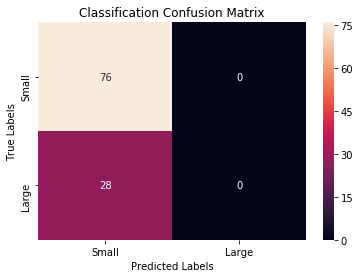

In [255]:
from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.50)
cm = confusion_matrix(y_test, y_pred)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax);
ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels'); 
ax.set_title('Classification Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Small','Large']); ax.yaxis.set_ticklabels(['Small','Large']);

correct = 0
total = 0
for i in range(0, len(cm)):
    for j in range(0, len(cm)):
        if(i==j):
            correct = correct + cm[i][j]
        total = total + cm[i][j]
        
Accuracy = correct/total
print('Accuracy: %.2f%%' % (Accuracy*100))

In [256]:
'''
    Evaluation
'''

from keras.wrappers.scikit_learn import KerasClassifier
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from keras.models import Sequential #For Initializing ANN
from keras.layers import Dense #For Layers of ANN

def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = 4))
    classifier.add(Dropout(rate=0.25))
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dropout(rate=0.25))
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dropout(rate=0.25))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

classifier = KerasClassifier(build_fn = build_classifier, batch_size = 5, epochs = 100)

accuracies_class = cross_val_score(estimator = classifier, X = X_train, y=y_train, cv = 10, n_jobs = -1)
mean_class = accuracies_class.mean()
variance_class = accuracies_class.std()

print('Mean: %s' % mean_class)
print('Variance: %s' % variance_class)

Mean: 0.6752032644752495
Variance: 0.04830952543139409


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


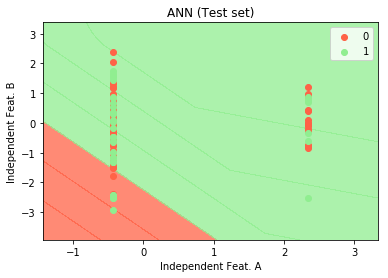

In [100]:
# Visualising the Test set results

from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('tomato', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('tomato', 'lightgreen'))(i), label = j)
plt.title('ANN (Test set)')
plt.xlabel('Independent Feat. A')
plt.ylabel('Independent Feat. B')
plt.legend()
plt.show()

In [264]:
'''REGRESSION'''
dataset = pd.read_csv('forestfires.csv')
y = dataset.iloc[:, 12].values # dependent variable

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_Modeled, y, test_size = 0.2)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Tuning For Epochs, Batch Size, Optimizer
def build_regressor(optimizer):
    regressor = Sequential()
    regressor.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu', input_dim = 4))
    regressor.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
    regressor.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
    regressor.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'linear'))
    regressor.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])
    return regressor

In [266]:
regressor = KerasRegressor(build_fn = build_regressor)
parameters = {'batch_size': [1, 16, 32],
              'epochs': [100, 500],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'r2',
                           cv = 10)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

print('Best Parameters: %s' % best_parameters)
print('Best Accuracy: %s' % best_accuracy)

In [267]:
#BUILD NEW MODEL

# Importing the Keras libraries and packages to use Tensor Flow Backend
from keras.models import Sequential #For Initializing ANN
from keras.layers import Dense #For Layers of ANN
from keras.layers import Dropout #For Layers of ANN

regressor = Sequential()

regressor.add(Dense(units = 14, kernel_initializer = 'uniform', activation = 'relu', input_dim = 4))
regressor.add(Dropout(rate=0.25))
regressor.add(Dense(units = 14, kernel_initializer = 'uniform', activation = 'relu'))
regressor.add(Dropout(rate=0.25))
regressor.add(Dense(units = 14, kernel_initializer = 'uniform', activation = 'relu'))
regressor.add(Dropout(rate=0.25))
regressor.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'linear'))
regressor.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])

regressor.fit(X_train, y_train, batch_size = 5, epochs = 100)

Epoch 1/100
413/413 [==============================] - 12s 29ms/step - loss: 5198.9615 - mean_squared_error: 5198.9615 - mean_absolute_error: 14.3347
Epoch 2/100
413/413 [==============================] - 1s 2ms/step - loss: 5192.4344 - mean_squared_error: 5192.4344 - mean_absolute_error: 14.3063
Epoch 3/100
413/413 [==============================] - 1s 2ms/step - loss: 5149.2641 - mean_squared_error: 5149.2641 - mean_absolute_error: 14.5978
Epoch 4/100
413/413 [==============================] - 1s 2ms/step - loss: 5097.9584 - mean_squared_error: 5097.9584 - mean_absolute_error: 15.3157
Epoch 5/100
413/413 [==============================] - 1s 2ms/step - loss: 5052.0775 - mean_squared_error: 5052.0775 - mean_absolute_error: 16.9730
Epoch 6/100
413/413 [==============================] - 1s 2ms/step - loss: 5037.6787 - mean_squared_error: 5037.6787 - mean_absolute_error: 18.0093
Epoch 7/100
413/413 [==============================] - 1s 2ms/step - loss: 4979.4327 - mean_squared_error: 497

413/413 [==============================] - 1s 2ms/step - loss: 4978.0000 - mean_squared_error: 4978.0000 - mean_absolute_error: 20.7866
Epoch 57/100
413/413 [==============================] - 1s 2ms/step - loss: 4986.6200 - mean_squared_error: 4986.6200 - mean_absolute_error: 20.6241
Epoch 58/100
413/413 [==============================] - 1s 2ms/step - loss: 4878.8848 - mean_squared_error: 4878.8848 - mean_absolute_error: 20.9463
Epoch 59/100
413/413 [==============================] - 1s 2ms/step - loss: 4907.2656 - mean_squared_error: 4907.2656 - mean_absolute_error: 20.2468
Epoch 60/100
413/413 [==============================] - 1s 2ms/step - loss: 4832.1618 - mean_squared_error: 4832.1618 - mean_absolute_error: 20.2689
Epoch 61/100
413/413 [==============================] - 1s 2ms/step - loss: 4865.3305 - mean_squared_error: 4865.3305 - mean_absolute_error: 21.0308
Epoch 62/100
413/413 [==============================] - 1s 2ms/step - loss: 4906.3804 - mean_squared_error: 4906.3804 -

Predicted: [[ 6.2445474]
 [ 4.9299803]
 [ 9.965387 ]
 [ 9.759627 ]
 [21.033241 ]]
Real: [ 7.3   2.13  8.71  0.   24.23]


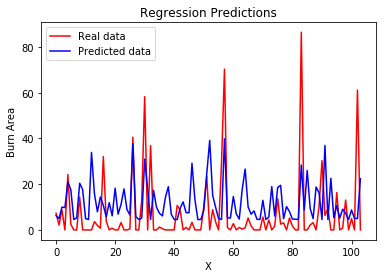

In [268]:
'''
    Making predictions and evaluating the model
'''
# Predicting the Test set results
y_pred = regressor.predict(X_test)

print('Predicted: %s' % y_pred[:5, ])
print('Real: %s' % y_test[:5, ])

plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Regression Predictions')
plt.legend()
plt.xlabel('X')
plt.ylabel('Burn Area'); 
plt.show()